# Import packages

In [1]:
import snowflake.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to server and loading the labeled dataset (flat file)

The data is on a cloud in the service of
Snowflake.
In order to connect to the data through Python, I installed a dedicated package and entered the code in the following cells, which includes, among other things, data access to the database. As you can see, in retrospect I deleted the details. This way you can understand the process of connecting to the data, without leaving details that I was forbidden to pass on.

In [2]:
ctx = snowflake.connector.connect(
    user='??',
    password='??',
    account='??',
    warehouse='??',
    role='??',
    database='??',
    schema='??',
    protocol='??')

    
cs = ctx.cursor()


Loading the data is done by writing an SQL query. The query  connects the 3 relevant tables, creating a labeled data set ("flat file") with which to work.

In [3]:
ff = "select labels.SESSION_INFO_ID, labels.INTERVAL_IN_FILE , Value, SN, ACCL_X, ACCL_Y, ACCL_Z, BAND_ARR_1, BAND_ARR_2, BAND_ARR_3, BAND_ARR_4, BAND_ARR_5, BAND_ARR_6, BAND_ARR_7, BAND_ARR_8, BAND_ARR_9, BAND_ARR_10, BAND_ARR_11, BAND_ARR_12, BAND_ARR_13, BAND_ARR_14, BAND_ARR_15, BAND_ARR_16, BAND_ARR_17, BAND_ARR_18, BAND_ARR_19, BAND_ARR_20, BAND_ARR_21, BAND_ARR_22, BAND_ARR_23, BAND_ARR_24, BAND_ARR_25, BAND_ARR_26, BAND_ARR_27, BAND_ARR_28, BAND_ARR_29, BAND_ARR_30, BAND_ARR_31, BAND_ARR_32, BATTERY, BIT_FLAG, MAX_VALUE, MIC_TD_RAW, MIN_VALUE, NTC, PACKET_RETRANSMIT, TRANSMITTED_DEBUG_INDX, VAA, _PARTITION, ADVERTISE_TS, ANOMALY_POSITION, BATT_LEVEL, CONNECTION_TIME, CONSECUTIVELY_LOST_PACKET, DATE, FIRST_PACKET_TS, GW_MAC, GW_NAME, INSERT_REPLACEMENT_REPORTED, MATCH_FACTOR, OPERATION_NUM, OPERATION_VALID, RSSI, TOOL_MAC, TOOL_NAME, TOOL_TYPE, TOTAL_LOST_PACKET_NUM, WEAR_LEVEL, SESSION_INFO.CREATED_AT as s_i_created_at, LABELS.CREATED_AT as labels_created_at from labels inner  join SESSION_DATA on labels.SESSION_INFO_ID = SESSION_DATA.SESSION_INFO_ID and labels.INTERVAL_IN_FILE = SESSION_DATA.INTERVAL_IN_FILE inner join SESSION_INFO on labels.SESSION_INFO_ID = SESSION_INFO._ID where trial_id = 10 and label_name = 'touch'"

cs.execute(ff)



In [4]:
ff = cs.fetch_pandas_all()


# General look on the dataset

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
ff.head()

SESSION_INFO_ID  INTERVAL_IN_FILE  VALUE  SN  ACCL_X  \
0  ce9b7631df5846eeb7dbc1bc3271dc6a                 1    0.0   4   32767   
1  ce9b7631df5846eeb7dbc1bc3271dc6a                 9    0.0  12   32767   
2  ce9b7631df5846eeb7dbc1bc3271dc6a                27    1.0  30   32767   
3  ce9b7631df5846eeb7dbc1bc3271dc6a                53    1.0  56   32767   
4  ce9b7631df5846eeb7dbc1bc3271dc6a                62    1.0  65   32767   

   ACCL_Y  ACCL_Z  BAND_ARR_1  BAND_ARR_2  BAND_ARR_3  BAND_ARR_4  BAND_ARR_5  \
0   -3380   32767    3.991567    1.312966    1.209943    3.510792    2.308856   
1   -3779   32767    3.244165    1.254104    0.638133    1.269899    1.617370   
2  -10672   32767    8.473649    7.602677    7.167191    7.384933    9.780108   
3   -6305   32767   10.500007    4.848277    6.851422    9.212271   18.798750   
4     234   32767   10.810238    6.514476    6.430245   10.557547   16.453691   

   BAND_ARR_6  BAND_ARR_7  BAND_ARR_8  BAND_ARR_9  BAND_ARR_10  BAND_ARR_11  \
0    5.056139    4.025907    1.072579    1.244284     3.476451     2.343197   
1    4.112843    1.175134    0.559163    1.190928     0.859251     0.969810   
2   28.506021   16.203531    6.840576   11.848669    11.739797     5.207502   
3   17.582554    7.638371   11.215416   18.083342    14.434755     4.776736   
4   12.326389    6.430245   12.663312   22.097143    11.568314     5.166785   

   BAND_ARR_12  BAND_ARR_13  BAND_ARR_14  BAND_ARR_15  BAND_ARR_16  \
0     1.896764     8.936675     1.931105     0.523122     0.317076   
1     0.938222     2.549223     0.527574     0.148515     0.101133   
2     7.058319     7.711548     2.159097     1.505868     2.376841   
3     4.919818     8.997648     3.846705     1.915101     1.843560   
4     6.093322    10.641777     3.482173     1.713329     1.966021   

   BAND_ARR_17  BAND_ARR_18  BAND_ARR_19  BAND_ARR_20  BAND_ARR_21  \
0     0.214053     0.214053     0.214053     0.385758     0.214053   
1     0.085339     0.101133     0.101133     0.132721     0.085339   
2     1.832483     1.396996     1.505868     1.505868     0.961510   
3     1.700478     1.199692     1.128151     1.128151     0.770447   
4     1.376407     1.460637     1.039484     1.207945     0.786792   

   BAND_ARR_22  BAND_ARR_23  BAND_ARR_24  BAND_ARR_25  BAND_ARR_26  \
0     0.179712     0.248394     0.214053     0.488781     0.317076   
1     0.085339     0.101133     0.116927     0.322251     0.180103   
2     1.070382     0.961510     0.961510     0.852638     0.961510   
3     0.770447     0.555824     0.555824     0.627365     0.985069   
4     0.618331     0.702562     0.618331     1.039484     1.039484   

   BAND_ARR_27  BAND_ARR_28  BAND_ARR_29  BAND_ARR_30  BAND_ARR_31  \
0     0.179712     0.179712     0.179712     0.282735     0.317076   
1     0.101133     0.116927     0.116927     0.195898     0.180103   
2     0.743767     0.852638     0.743767     0.743767     0.961510   
3     0.698906     0.555824     0.555824     0.841987     1.128151   
4     0.618331     0.618331     0.618331     0.955253     1.376407   

   BAND_ARR_32  BATTERY  BIT_FLAG  MAX_VALUE  MIC_TD_RAW  MIN_VALUE   NTC  \
0     0.179712     3389        65   8.936675    0.004337   0.145371  1444   
1     0.148515     3391        65   4.112843    0.002212   0.069545  1446   
2     0.852638     3395        67  28.506021    0.015292   0.634895  1446   
3     0.627365     3394        69  18.798750    0.015376   0.484283  1447   
4     0.618331     3408        69  22.097143    0.014505   0.534100  1446   

   PACKET_RETRANSMIT  TRANSMITTED_DEBUG_INDX   VAA _PARTITION  ADVERTISE_TS  \
0                  0                       1  2859       None             0   
1                  0                       1  2864       None             0   
2                  0                       1  2847       None             0   
3                  0                       1  2866       None             0   
4                  0                       1  2860       No

In [7]:
ff.shape

(114271, 70)

In [8]:
ff.describe()

INTERVAL_IN_FILE          VALUE             SN         ACCL_X  \
count     114271.000000  114271.000000  114271.000000  114271.000000   
mean         682.594438       0.341136     121.625093   17713.637633   
std          747.196493       0.474093      72.421511   16353.340804   
min            0.000000       0.000000       0.000000  -21216.000000   
25%          190.000000       0.000000      59.000000    2002.000000   
50%          388.000000       0.000000     120.000000   32767.000000   
75%          914.000000       1.000000     183.000000   32767.000000   
max         3718.000000       1.000000     255.000000   32767.000000   

              ACCL_Y         ACCL_Z     BAND_ARR_1     BAND_ARR_2  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean    -3704.330268   26847.334984       5.775896       2.375036   
std      4568.340266   12539.801441      10.411432       3.928014   
min    -32179.000000   -4975.000000       0.042818       0.031508   
25%     -5431.000000   32767.000000       0.320196       0.150773   
50%     -3879.000000   32767.000000       1.689604       0.427428   
75%      -659.000000   32767.000000       9.429254       3.957298   
max      9384.000000   32767.000000     169.922790      79.847410   

          BAND_ARR_3     BAND_ARR_4     BAND_ARR_5     BAND_ARR_6  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        1.751379       3.302103       6.351407       4.183729   
std         2.908131       5.470527      11.449154       6.535230   
min         0.032369       0.028363       0.030796       0.028553   
25%         0.084152       0.074155       0.079392       0.082950   
50%         0.189187       0.173996       0.257407       0.444832   
75%         2.698801       4.320839       4.414946       7.862051   
max        44.615986      37.534440      48.895668      44.967293   

          BAND_ARR_7     BAND_ARR_8     BAND_ARR_9    BAND_ARR_10  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        2.532964       2.700431       4.020513       2.756367   
std         4.194724       4.530769       7.020760       4.648945   
min         0.030019       0.029530       0.031984       0.028856   
25%         0.077442       0.065304       0.066969       0.066711   
50%         0.259631       0.129257       0.190275       0.164674   
75%         5.144412       2.273587       1.873446       2.285423   
max        44.704636      39.601864      26.159714      23.024904   

         BAND_ARR_11    BAND_ARR_12    BAND_ARR_13    BAND_ARR_14  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        1.326560       1.225044       2.067779       0.951150   
std         2.128166       1.963250       3.310196       1.443580   
min         0.031526       0.030229       0.025959       0.031324   
25%         0.064193       0.063161       0.065401       0.061870   
50%         0.128316       0.126636       0.166715       0.116489   
75%         1.886690       1.666886       3.220182       1.301941   
max        13.560520      12.398444      19.269680      12.331042   

         BAND_ARR_15    BAND_ARR_16    BAND_ARR_17    BAND_ARR_18  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.581519       0.505480       0.450491       0.396669   
std         0.869644       0.745934       0.670538       0.567857   
min         0.029845       0.032336       0.028443       0.029652   
25%         0.060468       0.063758       0.059886       0.059222   
50%         0.089683       0.085329       0.071917       0.070485   
75%         0.823265       0.897815       0.635834       0.576897   
max         7.984955       5.963469       4.644756       3.787138   

         BAND_ARR_19    BAND_ARR_20    BAND_ARR_21    BAND_ARR_22  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.352040       0.318143       0.274533       0.277632   
std         0.483240       0.420474      

# Checking for missing information on each feature


In [9]:
ff.isnull().sum()


SESSION_INFO_ID                     0
INTERVAL_IN_FILE                    0
VALUE                               0
SN                                  0
ACCL_X                              0
ACCL_Y                              0
ACCL_Z                              0
BAND_ARR_1                          0
BAND_ARR_2                          0
BAND_ARR_3                          0
BAND_ARR_4                          0
BAND_ARR_5                          0
BAND_ARR_6                          0
BAND_ARR_7                          0
BAND_ARR_8                          0
BAND_ARR_9                          0
BAND_ARR_10                         0
BAND_ARR_11                         0
BAND_ARR_12                         0
BAND_ARR_13                         0
BAND_ARR_14                         0
BAND_ARR_15                         0
BAND_ARR_16                         0
BAND_ARR_17                         0
BAND_ARR_18                         0
BAND_ARR_19                         0
BAND_ARR_20 

In [10]:
for column_name in ff.columns:
    column = ff[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)


Count of zeros in column  SESSION_INFO_ID  is :  0
Count of zeros in column  INTERVAL_IN_FILE  is :  281
Count of zeros in column  VALUE  is :  75289
Count of zeros in column  SN  is :  341
Count of zeros in column  ACCL_X  is :  26
Count of zeros in column  ACCL_Y  is :  20
Count of zeros in column  ACCL_Z  is :  2
Count of zeros in column  BAND_ARR_1  is :  0
Count of zeros in column  BAND_ARR_2  is :  0
Count of zeros in column  BAND_ARR_3  is :  0
Count of zeros in column  BAND_ARR_4  is :  0
Count of zeros in column  BAND_ARR_5  is :  0
Count of zeros in column  BAND_ARR_6  is :  0
Count of zeros in column  BAND_ARR_7  is :  0
Count of zeros in column  BAND_ARR_8  is :  0
Count of zeros in column  BAND_ARR_9  is :  0
Count of zeros in column  BAND_ARR_10  is :  0
Count of zeros in column  BAND_ARR_11  is :  0
Count of zeros in column  BAND_ARR_12  is :  0
Count of zeros in column  BAND_ARR_13  is :  0
Count of zeros in column  BAND_ARR_14  is :  0
Count of zeros in column  BAND_AR

It can be seen that there are columns that include only missing values, and in all other columns there are no missing values. In terms of zeros - there are columns that include only zeros, and in other columns the zeros seem to be organic in the data and do not constitute a hint of missing values. Through the automatic reports it will be possible to see more irrelevant columns.
In the next cell we produce one automatic report. An additional report is created in a separate notebook. Both reports are in this folder.

# Creating automatic reports


In [11]:
from pandas_profiling import ProfileReport
report = ProfileReport(ff, minimal=True)
report.to_file("pandas tool part report.html")


# General look on the target variable

In [12]:
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


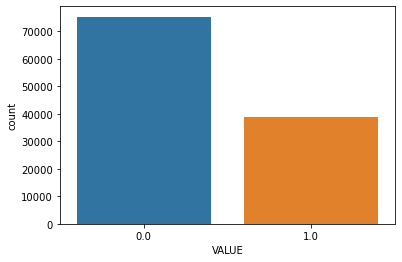

In [13]:
sns.countplot(ff['VALUE'])

plt.show()



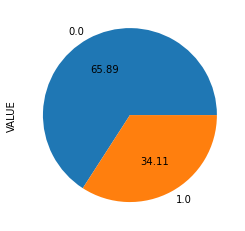

In [14]:
ff['VALUE'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()




The target variable is Boolean, and is divided by a rate of two-thirds versus one-third, approximately. For us, this means that the data is relatively balanced.

# Value vs Session_Info_Id

The following tests will ultimately be irrelevant to the model - since by definition the "session info id" should not be a feature for the model training. However, it was important for the client to understand the division of the target variable versus this category. It can be seen that the division is far from balanced.

In [15]:
id_value_tab = pd.crosstab(ff['SESSION_INFO_ID'], ff['VALUE'])
id_value_tab['touch rate'] = id_value_tab[1.0]/(id_value_tab[1.0] + id_value_tab[0.0])
id_value_tab = id_value_tab.sort_values(by = 'touch rate', ascending=False)
id_value_tab





VALUE                              0.0   1.0  touch rate
SESSION_INFO_ID                                         
93b014542b7f426394ad0565b4dd72b3    99  1825    0.948545
50057e85e6bd48d98cc2b07fa10c5886   449  1627    0.783719
0c748aceb67b475499b349ab7aa3241f   191   278    0.592751
4461aafa091c4b23b93a139544ef85c0   194   281    0.591579
89759fd6302c4c61a09be63ec73f2bc7   192   278    0.591489
4a761002d37c4428a9ea65adf941f33d   194   279    0.589852
ce20e41a51dd4cc6b4fc0e035ec5079d   194   278    0.588983
bee94fdb39e2487481231fc97ece92ce   196   280    0.588235
a8e62837adf0462c981524094a66215a   192   273    0.587097
ac898147c741406fa352251c4a911cd6   197   280    0.587002
23e61690544f458783d5cde98a781db8   195   276    0.585987
c1b24b35c969405594386ded2940699e   195   276    0.585987
b7e2e34b598c4e24be73487d67bc1f69   199   281    0.585417
e6602a27157f435a803576082c9629c1   197   278    0.585263
3fc9f39cf8d5420b996a50013fdb99e7   197   277    0.584388
ce9b7631df5846eeb7dbc1bc3271dc6a   198   278    0.584034
b15013b59de84573bffc72e466247ad0   199   278    0.582809
fe1a9f34769d499196438d2f9c09765e   199   278    0.582809
e7cd598fde834ce7b73a146598b6f768   199   278    0.582809
306513a1f03541c6b74e90453f43c878   200   279    0.582463
9195ec9a3acb463bbf29dfd981718e64   200   279    0.582463
a067a505377a431b97d0d6325162e96e   200   279    0.582463
ffe7d512018242e28df76cce0cc036de   200   279    0.582463
2633f27f7cd8434a975d1137ff1c03ab   198   276    0.582278
1f9e3c25ddbe4e4b870da6c932081c56   199   277    0.581933
ecb61756dbd14a7cb678d79c0c691c10   199   277    0.581933
0fafaa30e2d34398b8a14e566c73591d   199   277    0.581933
b660d177d6a84d2dba1e23b92301279c   199   276    0.581053
b47d61c56d9e4bc7860992167cf76ef7   199   276    0.581053
3c74c2a63dac481097b86b373ef47c60   198   274    0.580508
bab4d43dcbc44df4b4ff6a62419f30c6   201   278    0.580376
ecbfec1cda2342adba29c06ec09f5560   201   278    0.580376
4d6d95787f2b4dacb99efda11430f135   201   278    0.580376
d4a812f356fc41ecbe98dde417d54a40   201   278    0.580376
d505825721104ed7a624d2d20aaa40df   199   275    0.580169
33df3b0ebdbf468dbc473c0930e8bc03   202   279    0.580042
13f7093b71054ddaa00b8dc32bc5c14a   200   276    0.579832
15c50a1059a9409aadecaea7c4b2d6c3   201   277    0.579498
c45c3bcd5e8542c48f9ec4c4fee3c074   201   277    0.579498
c233539ce22d4c1693a6ebe389cd499a   199   274    0.579281
b1b73e70bfca4cb2926e5a0538773b97   199   274    0.579281
78706db3677b4054a86a53213e69c188   200   275    0.578947
647b3d941d13445c8b0b7c8346d55954   200   275    0.578947
a1a916f55354450899185d74a25c872c   203   279    0.578838
f2c023bf838d480b9648832a66c72196   201   276    0.578616
6933e306784d4bfa809307744e12c82a   199   273    0.578390
4317049dce9347e0be140564a5bed832   197   270    0.578158
cedbdd9d9e24409c9704a11ca0470a74   200   274    0.578059
30786e152e60477db9a6c0de5c8816a8   200   274    0.578059
95e44eef0e4e4a85b5afc492d5a371fe   201   275    0.577731
40434e7ae7804d3794cf6069bf4fb7f5   201   275    0.577731
1509358e6dda4f7ebaa35521b6811beb   204   279    0.577640
9549963fd74645f3bab4d788109c514a   204   279    0.577640
842fd1c6a33f4a9480effef7aebfcd78   204   279    0.577640
9bd9c2293fdf4698b1f3ee83122f887c   204   279    0.577640
a7b88ba73323469ca79292edf20e823b   204   279    0.577640
23b90502773d497b87a2dfff69872b08   202   276    0.577406
3532a27187254df9a6561e484b9ace74   202   276    0.577406
17062a3d350f44339a402a8bc3d07d3d   201   274    0.576842
2a1a43ad7a30460dbc8fea4f5fc07ade   201   274    0.576842
e61522088c6c4b7295c886cbe81b298c   201   273    0.575949
c0b4e6e8dd7b4f6b924b60f5196df539   203   275    0.575314
9170712a51e944dcb877b3c425791e17   201   272    0.575053
7c7b5ca9eef84b45b30914d568860775   204   276    0.575000
7e705a09f79d4c789c6f434f672589a7   204   276    0.575000
fba643b92532440ea9776c33c35b6ace   204   276    0.575000
494263c4869d4480a8b54154d1ab2319   204   276    0.575000
243446a2f339479289485abf72b752c5   204   276    0.575000
b1d0ca7a39

In [16]:
id_value_tab['cnt'] = id_value_tab[1.0] + id_value_tab[0.0]
id_value_tab = id_value_tab.sort_values(by = 'cnt', ascending=False)
id_value_tab

VALUE                              0.0   1.0  touch rate   cnt
SESSION_INFO_ID                                               
47684cb9488a4f04bdef6e1b4f8c8dab  2930   789    0.212154  3719
1e3d61b7cac24c62a010f116710b9703  2930   789    0.212154  3719
31ab3a9817674a9aa33dc0412b8940cf  2851   676    0.191664  3527
c0a5655477844e37b8fcdf0448199abc  2851   676    0.191664  3527
6c58ca7a64e44ef793b82be58d24d44f  2101   503    0.193164  2604
ec56919c2a5b4acd959d5d361731588f  2101   503    0.193164  2604
01f1616f1d05450188aab06aec94e657  2134   288    0.118910  2422
95556f1d3124427f90893eabe0bb48dc  2140   280    0.115702  2420
97b01b4a4a334195a9af38e1b0907315  2206     0    0.000000  2206
50057e85e6bd48d98cc2b07fa10c5886   449  1627    0.783719  2076
93b014542b7f426394ad0565b4dd72b3    99  1825    0.948545  1924
cff1585ffc1a43f28085855ee2e66a40  1888    27    0.014099  1915
9a46404aae3b406693885256d3232df3  1888    27    0.014099  1915
64a081bd61724b9391390b677af376c9  1449   276    0.160000  1725
0f3ecc21cca044f889e17541eff51a88  1445   274    0.159395  1719
e5f34d61e0b94f3e801bd3d63c821820  1440   278    0.161816  1718
73f68ff2dc2049ce96f172fbffb84bae  1608    76    0.045131  1684
fb050ff8daa441398410292684bc9583  1648    10    0.006031  1658
8990921171bc46f89e882a46f06b43cb   628   801    0.560532  1429
f7215673af734314a9e5798074c2a8c2  1070   276    0.205052  1346
96da762b2e084b5187af78a77a53beea  1059   279    0.208520  1338
334bb190b0fc438d9876b087b95329b9   989   116    0.104977  1105
5c0decab30c540d290f3db54b61e62bc   800   304    0.275362  1104
99a7b013570c4d5c80cdb1890192fca3   800   304    0.275362  1104
faf5fbaf0e0a49fc96fa5ed1cd7b8ce2   637   274    0.300768   911
6a39aff16c954755887e275fdfbcf82e   616   279    0.311732   895
f96905f611dc42338449fa984a6755f6   612   277    0.311586   889
4de6c5b3659d4912ac45edc5db557523   604   271    0.309714   875
2b5cf6cb8580456398ebd0ef64a897d7   550   316    0.364896   866
cd6cd64e20544dccaf20cca2d80ec6c6   550   316    0.364896   866
3464d8cb09234b278f2f6cbac06a250b   575   276    0.324324   851
e9acd14a218c4fa4b8a07345022a3f17   668    77    0.103356   745
f41c2f1312d345d9bc102054b53a72c7   651    86    0.116689   737
4804c35d92a54e39b220a725d716bb3d   651    86    0.116689   737
b643285a4f98496a85ff98c4e1851b1b   573   144    0.200837   717
96e36a49d2864d979ca84a85175ed971   506   199    0.282270   705
13fb7d91a5434be3acdc6650136c4528   591   106    0.152080   697
25ecd11110054862a461b23a0d33412f   582    95    0.140325   677
39c817b15c8a4b9780387e7639be6829   478   188    0.282282   666
a0856f98a2324d5ca7cd7da624984e03   649    16    0.024060   665
4fe8d5a9bbee4a84be2cf1a85988253b   604    16    0.025806   620
7e6892fc4bfd4914b92017f5942b8699   339   276    0.448780   615
a38a4696919744baa937f841a320ec86   503    90    0.151771   593
e0825defcdb543aa89c0964da84ae2e0   587     0    0.000000   587
33e0d8d0c5d04b55891144fdeced6b60   587     0    0.000000   587
cf90efff3f2c4b3388a450029f15d01d   266   317    0.543739   583
7df435f7674340028c1383bca234af09   466    83    0.151184   549
222495f0d4144d35a811bed17717e446   254   278    0.522556   532
82d1e36041244fdea5cc356679e7e926   250   281    0.529190   531
ee3761b64bfc4d6e8486404fadbecfc1   253   278    0.523540   531
93715d44d9984ff5abbb65a475a1e45f   248   282    0.532075   530
0e5ea17c192d4ce993bf172b99f357f6   251   273    0.520992   524
72be22140e814b90bd77bd83bbb971ad   245   278    0.531549   523
d68d03ba60774ef9ba8e16fa9002f1a0   246   275    0.527831   521
05c71780b43648399788edeb658889aa   213   280    0.567951   493
22ed8e22f0d0421da9b25a55cc7acf30   393    97    0.197959   490
1509358e6dda4f7ebaa35521b6811beb   204   279    0.577640   483
a7b88ba73323469ca79292edf20e823b   204   279    0.577640   483
9bd9c2293fdf4698b1f3ee83122f887c   204   279    0.577640   483
842fd1c6a33f4a9480effef7aebfcd78   204   279    0.577640   483
9549963fd74645f3bab4d788109c514a   204   279    0.577640   483
808fc1e8d91f4503a454b04c4715b47

In [17]:
session_means = ff.groupby('SESSION_INFO_ID')['VALUE'].mean()

non_touch_sessions = session_means[session_means == 0]
non_touch_sessions = non_touch_sessions.count()
print ("number of sessions with no touch at all is", non_touch_sessions)

few_touch_sessions = session_means[session_means > 0]
few_touch_sessions = few_touch_sessions[few_touch_sessions < 0.25]
few_touch_sessions = few_touch_sessions.count()
print ("number of sessions with less then 25% touch is", few_touch_sessions)

some_touch_sessions = session_means[session_means >= 0.25]
some_touch_sessions = some_touch_sessions[some_touch_sessions < 0.5]
some_touch_sessions = some_touch_sessions.count()
print ("number of sessions with 25%-50% touch is", some_touch_sessions)

more_touch_sessions = session_means[session_means >= 0.5]
more_touch_sessions = more_touch_sessions[more_touch_sessions < 0.75]
more_touch_sessions = more_touch_sessions.count()
print ("number of sessions with 50%-75% touch is",more_touch_sessions)

alot_touch_sessions = session_means[session_means >= 0.75]
alot_touch_sessions = alot_touch_sessions.count()
print ("number of sessions with more then 75% touch is",alot_touch_sessions)

common_touch_sessions = session_means[session_means >= 0.56]
common_touch_sessions = common_touch_sessions[common_touch_sessions < 0.6]
common_touch_sessions = common_touch_sessions.count()
print ("a lot of sessions have 56%-60% rate of touch : ", common_touch_sessions, "which is a lot for such a small range")


number of sessions with no touch at all is 136
number of sessions with less then 25% touch is 41
number of sessions with 25%-50% touch is 17
number of sessions with 50%-75% touch is 85
number of sessions with more then 75% touch is 2
a lot of sessions have 56%-60% rate of touch :  77 which is a lot for such a small range


In [18]:
id_value_tab[id_value_tab["cnt"] > 216].count()


VALUE
0.0           148
1.0           148
touch rate    148
cnt           148
dtype: int64

In [19]:
id_value_tab[id_value_tab["cnt"] > 2000].count()


VALUE
0.0           10
1.0           10
touch rate    10
cnt           10
dtype: int64

# # Value vs Catagories from Session Info

The info session table is our metadata table, it includes the information about each of the machines, its tools, battery and more. In the following cells we will examine how much the characteristics of the different machines are related to the probabilities of the target variable.

<AxesSubplot:xlabel='GW_MAC', ylabel='Count'>

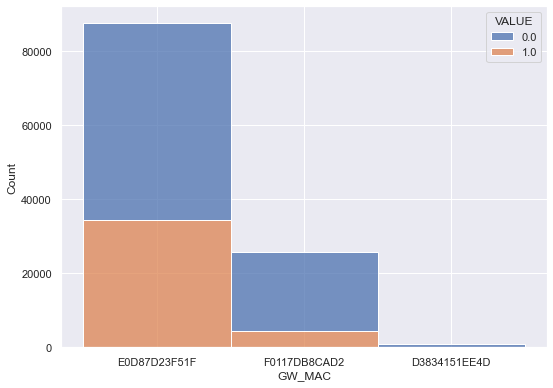

In [24]:
sns.histplot(x="GW_MAC", hue="VALUE", data=ff, stat="count", multiple="stack")


<AxesSubplot:xlabel='GW_NAME', ylabel='Count'>

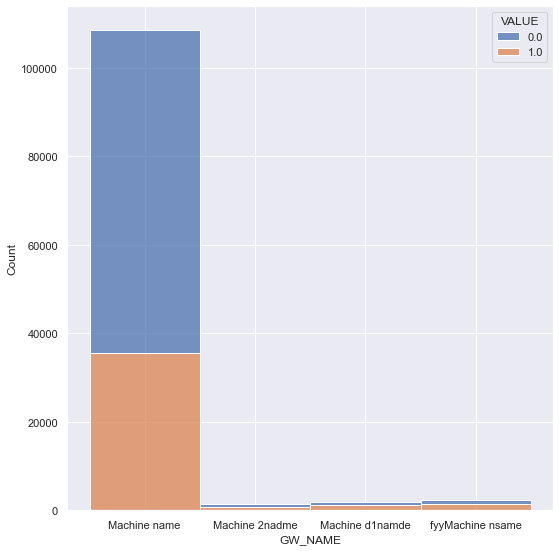

In [25]:
sns.set(rc={'figure.figsize':(8.7,9.27)})

sns.histplot(x="GW_NAME", hue="VALUE", data=ff, stat="count", multiple="stack")


<AxesSubplot:xlabel='TOOL_MAC', ylabel='Count'>

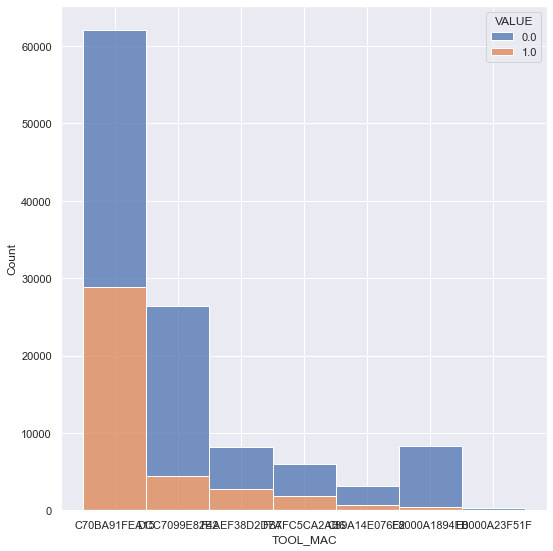

In [26]:
sns.histplot(x="TOOL_MAC", hue="VALUE", data=ff, stat="count", multiple="stack")


<AxesSubplot:xlabel='TOOL_NAME', ylabel='Count'>

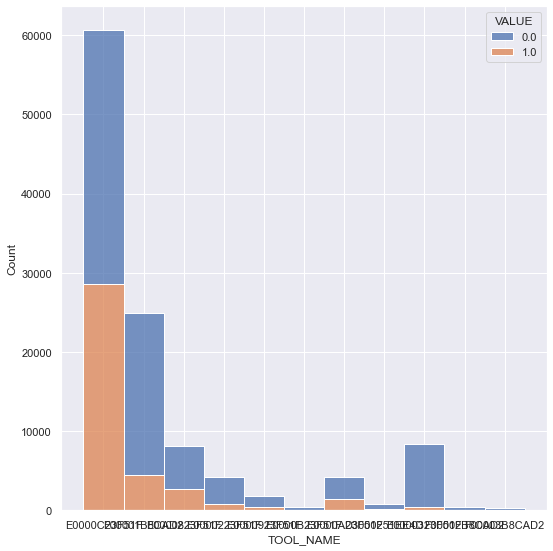

In [27]:
sns.histplot(x="TOOL_NAME", hue="VALUE", data=ff, stat="count", multiple="stack")


In [28]:
ff.dtypes

SESSION_INFO_ID                        object
INTERVAL_IN_FILE                        int16
VALUE                                 float64
SN                                      int16
ACCL_X                                  int16
ACCL_Y                                  int16
ACCL_Z                                  int16
BAND_ARR_1                            float64
BAND_ARR_2                            float64
BAND_ARR_3                            float64
BAND_ARR_4                            float64
BAND_ARR_5                            float64
BAND_ARR_6                            float64
BAND_ARR_7                            float64
BAND_ARR_8                            float64
BAND_ARR_9                            float64
BAND_ARR_10                           float64
BAND_ARR_11                           float64
BAND_ARR_12                           float64
BAND_ARR_13                           float64
BAND_ARR_14                           float64
BAND_ARR_15                       

In [29]:
ff.OPERATION_VALID = ff.OPERATION_VALID.replace({True: "True", False: "False"})


<AxesSubplot:xlabel='OPERATION_VALID', ylabel='Count'>

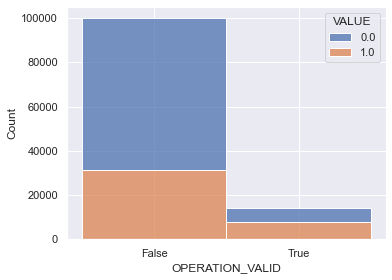

In [30]:
sns.set(rc={'figure.figsize':(5.7,4.27)})

sns.histplot(x="OPERATION_VALID", hue="VALUE", data=ff, stat="count", multiple="stack")


<AxesSubplot:xlabel='GW_MAC', ylabel='Count'>

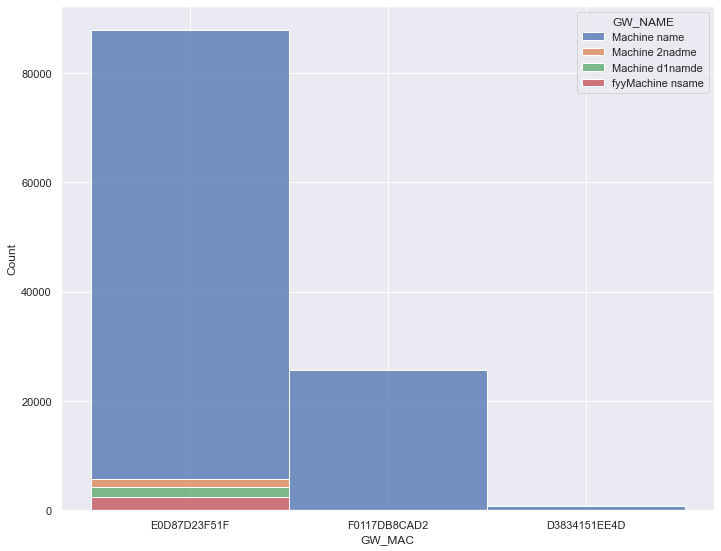

In [31]:
sns.set(rc={'figure.figsize':(11.7,9.27)})

sns.histplot(x="GW_MAC", hue="GW_NAME", data=ff, stat="count", multiple="stack")


<AxesSubplot:xlabel='TOOL_MAC', ylabel='Count'>

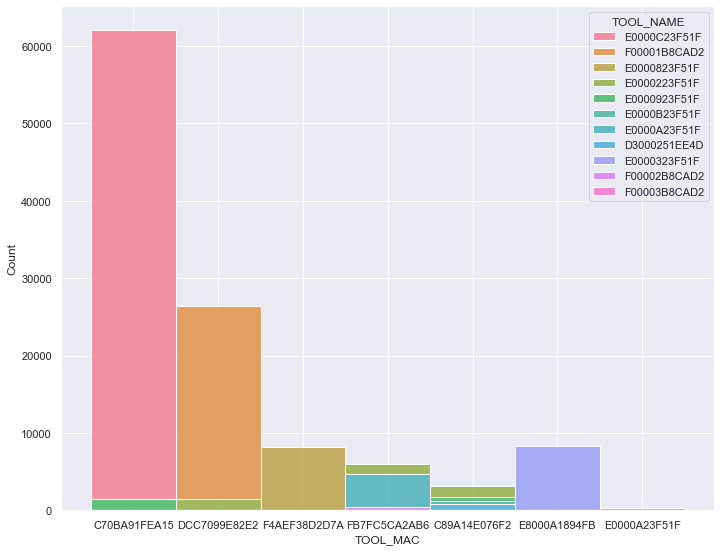

In [32]:
sns.histplot(x="TOOL_MAC", hue="TOOL_NAME", data=ff, stat="count", multiple="stack")

Bottom line - in every characteristic of the machines we tested, there is definitely a connection to the target variable.

# Correlations

In [33]:
ff_corr = ff.corr(method = 'spearman').abs()
ff_corr = ff_corr.unstack()

We will now examine correlations between the various variables of the data. We will use the "Spearman" correlation because a large part of the variables are categorical and / or non-linear.
The first view is of all the correlations, by variable. A display then appears according to the degree of correlation. A multiplicity of high correlations can be seen, for many variables. Presumably, at the stage of feature selection, this will be reflected in extensive filtering of variables.

In [34]:
print (ff_corr)

INTERVAL_IN_FILE             INTERVAL_IN_FILE               1.000000
                             VALUE                          0.346773
                             SN                             0.170532
                             ACCL_X                         0.299542
                             ACCL_Y                         0.079301
                             ACCL_Z                         0.174381
                             BAND_ARR_1                     0.252633
                             BAND_ARR_2                     0.341393
                             BAND_ARR_3                     0.359560
                             BAND_ARR_4                     0.407390
                             BAND_ARR_5                     0.384311
                             BAND_ARR_6                     0.377962
                             BAND_ARR_7                     0.354409
                             BAND_ARR_8                     0.338372
                             BAND_

In [35]:
ff_corr_sort = ff_corr.sort_values(kind="quicksort")
print (ff_corr_sort)

ADVERTISE_TS                 BAND_ARR_26                    0.000199
BAND_ARR_26                  ADVERTISE_TS                   0.000199
                             RSSI                           0.000420
RSSI                         BAND_ARR_26                    0.000420
VAA                          BAND_ARR_9                     0.000871
BAND_ARR_9                   VAA                            0.000871
VAA                          BAND_ARR_32                    0.001402
BAND_ARR_32                  VAA                            0.001402
BIT_FLAG                     BAND_ARR_32                    0.002504
BAND_ARR_32                  BIT_FLAG                       0.002504
BAND_ARR_10                  ADVERTISE_TS                   0.002754
ADVERTISE_TS                 BAND_ARR_10                    0.002754
VALUE                        RSSI                           0.002759
RSSI                         VALUE                          0.002759
SN                           ADVER

Test now: Correlations of the variables with the target variable, from high to low. Very many variables with high correlation, quite a few more with medium correlation. Few variables seemingly irrelevant.

In [36]:
ff_corr['VALUE'].sort_values(ascending=False)

VALUE                          1.000000
BAND_ARR_3                     0.784454
BAND_ARR_8                     0.779153
BAND_ARR_2                     0.773531
BAND_ARR_15                    0.764617
BAND_ARR_17                    0.763384
BAND_ARR_7                     0.762233
MIC_TD_RAW                     0.760990
BAND_ARR_4                     0.760981
BAND_ARR_5                     0.750869
MAX_VALUE                      0.748264
BAND_ARR_14                    0.747856
BAND_ARR_16                    0.747376
BAND_ARR_18                    0.745519
BAND_ARR_6                     0.743968
BAND_ARR_21                    0.736866
BAND_ARR_32                    0.735275
BAND_ARR_19                    0.733944
BAND_ARR_22                    0.733268
BAND_ARR_12                    0.717206
BAND_ARR_9                     0.716881
BAND_ARR_10                    0.715908
MIN_VALUE                      0.714510
BAND_ARR_28                    0.711605
BAND_ARR_20                    0.711553


The BAND ARR variables express frequency of sounds at different points in the machine at a certain point in time. I wanted to see how much they connected one to another. Many of them do have high correlations, which will probably be reflected in the fact that some of them will not be used for the model.

<AxesSubplot:>

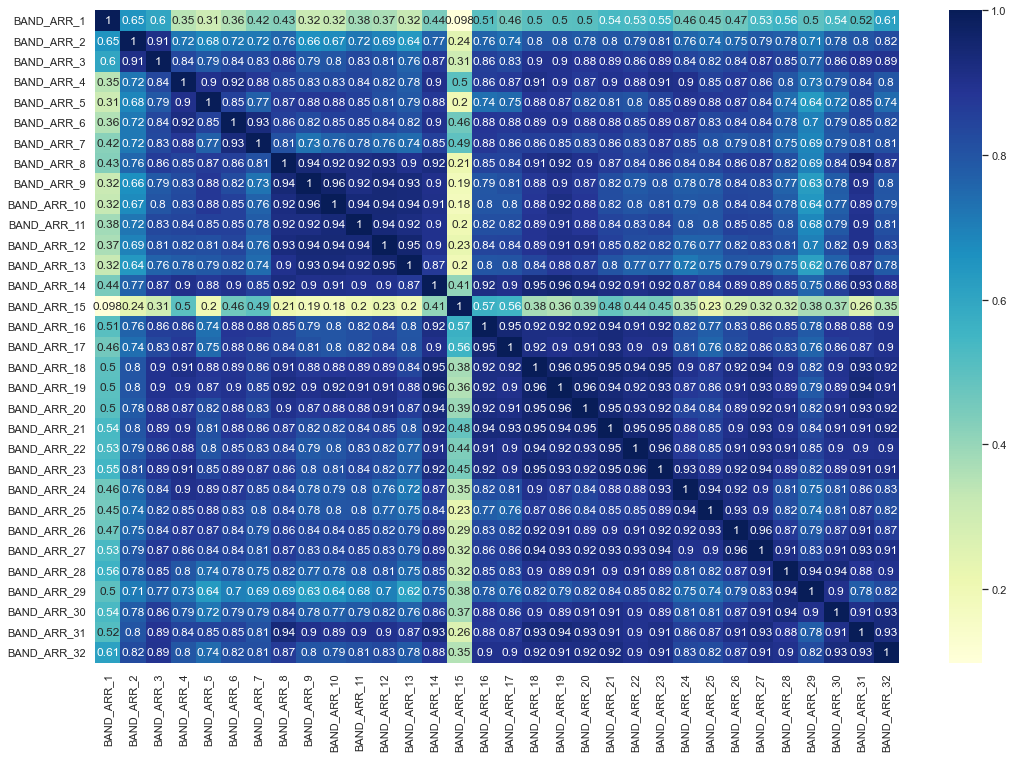

In [37]:
df_band = "select BAND_ARR_1, BAND_ARR_2, BAND_ARR_3, BAND_ARR_4, BAND_ARR_5, BAND_ARR_6, BAND_ARR_7, BAND_ARR_8, BAND_ARR_9, BAND_ARR_10, BAND_ARR_11, BAND_ARR_12, BAND_ARR_13, BAND_ARR_14, BAND_ARR_15, BAND_ARR_16, BAND_ARR_17, BAND_ARR_18, BAND_ARR_19, BAND_ARR_20, BAND_ARR_21, BAND_ARR_22, BAND_ARR_23, BAND_ARR_24, BAND_ARR_25, BAND_ARR_26, BAND_ARR_27, BAND_ARR_28, BAND_ARR_29, BAND_ARR_30, BAND_ARR_31, BAND_ARR_32 from SESSION_DATA"

cs.execute(df_band)
df_band = cs.fetch_pandas_all()

plt.figure(figsize=(18,12))
sns.heatmap(df_band.corr(method = "pearson"), annot=True, cmap="YlGnBu")


Displays correlations between different categorical variables. Does not lead to significant conclusions.

<AxesSubplot:>

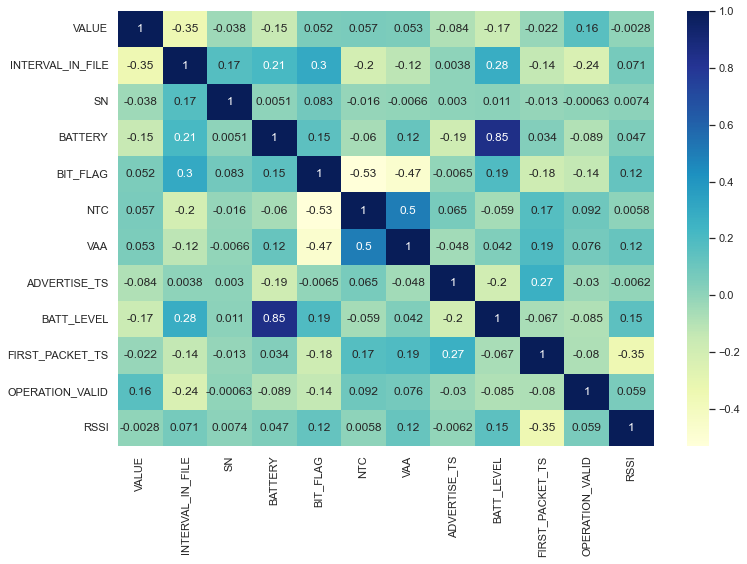

In [38]:
df_cato = "select Value, labels.SESSION_INFO_ID, labels.INTERVAL_IN_FILE,  labels.CREATED_AT as labels_created_at, SN, BATTERY, BIT_FLAG, NTC,  VAA,  ADVERTISE_TS,  BATT_LEVEL, DATE, FIRST_PACKET_TS, GW_MAC, GW_NAME,  OPERATION_VALID, RSSI, TOOL_MAC, TOOL_NAME,  SESSION_INFO.CREATED_AT as s_i_created_at from labels inner  join SESSION_DATA on labels.SESSION_INFO_ID = SESSION_DATA.SESSION_INFO_ID and labels.INTERVAL_IN_FILE = SESSION_DATA.INTERVAL_IN_FILE inner join SESSION_INFO on labels.SESSION_INFO_ID = SESSION_INFO._ID where trial_id = 10 and label_name = 'touch'"
cs.execute(df_cato)
df_cato = cs.fetch_pandas_all()

plt.figure(figsize=(12,8))
sns.heatmap(df_cato.corr(method = "spearman"), annot=True, cmap="YlGnBu")


# Continuous Variables Visualisations

The following cells will present a number of tests related to the continuous variables of the data. Some of them can be seen to have an effect on the target variable, some of them can be seen to have a limited effect on specific cases.

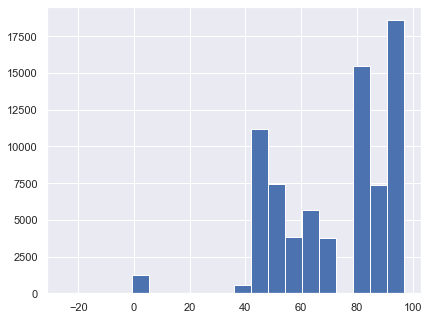

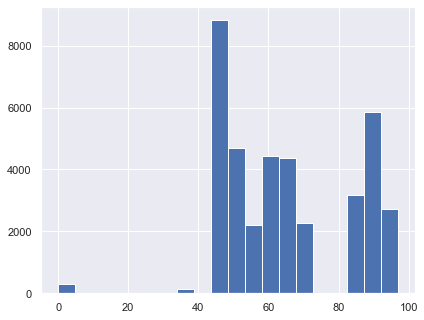

In [39]:
sns.set(rc={'figure.figsize':(6.7,5.27)})


plt.hist(ff[ff['VALUE'] == 0 ]['BATT_LEVEL'], bins=20)
plt.show()

plt.hist(ff[ff['VALUE'] == 1 ]['BATT_LEVEL'], bins=20)
plt.show()






C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


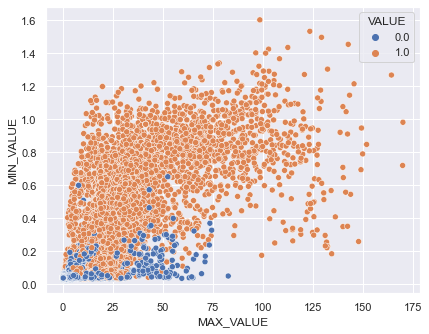

In [40]:
sns.scatterplot(ff["MAX_VALUE"], ff["MIN_VALUE"], hue=ff["VALUE"])
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


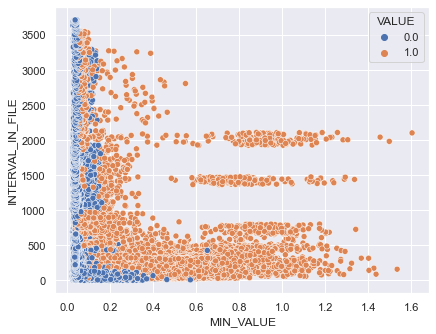

In [41]:
sns.scatterplot(ff["MIN_VALUE"], ff["INTERVAL_IN_FILE"], hue=ff["VALUE"])
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


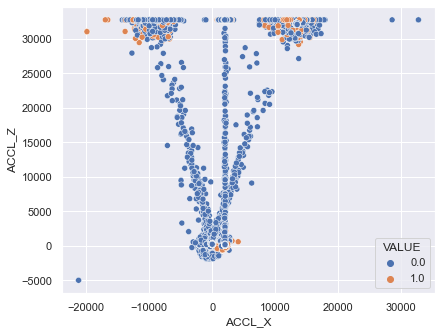

In [42]:
sns.scatterplot(ff["ACCL_X"], ff["ACCL_Z"], hue=ff["VALUE"])
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


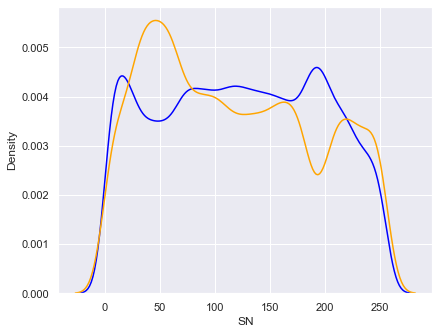

In [43]:
sns.distplot(ff[ff['VALUE'] == 0]['SN'], hist=False, color="blue") 
sns.distplot(ff[ff['VALUE'] == 1]['SN'], hist=False, color="orange")
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


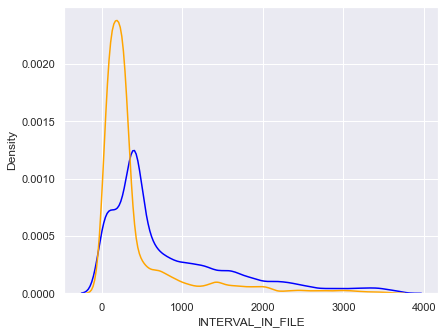

In [44]:
sns.distplot(ff[ff['VALUE'] == 0]['INTERVAL_IN_FILE'], hist=False, color="blue") 
sns.distplot(ff[ff['VALUE'] == 1]['INTERVAL_IN_FILE'], hist=False, color="orange")
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


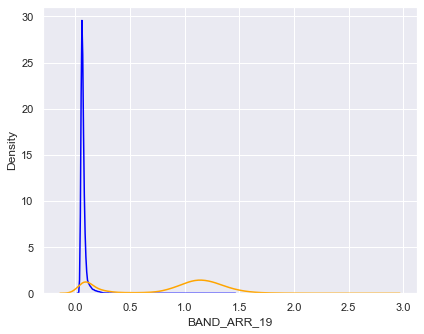

In [45]:
sns.distplot(ff[ff['VALUE'] == 0]['BAND_ARR_19'], hist=False, color="blue") 
sns.distplot(ff[ff['VALUE'] == 1]['BAND_ARR_19'], hist=False, color="orange")
plt.show()



         


# Catagoric vars connection to target var - tables

In the next two cells I returned to 2 of the categorical variables, in which I thought it would be right to test the effect on the target variable using a table. These are variables with relatively few categories (4 or 6) so that relatively simple tables can be derived from them. In both cases significant differences can be seen between the categories.

In [46]:
bitflag_value_tab = pd.crosstab(ff['BIT_FLAG'], ff['VALUE'])
bitflag_value_tab['touch rate'] = bitflag_value_tab[1.0]/(bitflag_value_tab[1.0] + bitflag_value_tab[0.0])
bitflag_value_tab = bitflag_value_tab.sort_values(by = 'touch rate', ascending=False)
bitflag_value_tab


VALUE       0.0    1.0  touch rate
BIT_FLAG                          
69        35916  30069    0.455694
71        23250   8084    0.257995
67         5329    673    0.112129
65        10794    156    0.014247

In [48]:
ts_value_tab = pd.crosstab(ff['ADVERTISE_TS'], ff['VALUE'])
ts_value_tab['touch rate'] = ts_value_tab[1.0]/(ts_value_tab[1.0] + ts_value_tab[0.0])
ts_value_tab = ts_value_tab.sort_values(by = 'touch rate', ascending=False)
ts_value_tab


VALUE           0.0    1.0  touch rate
ADVERTISE_TS                          
1026            818    552    0.402920
0             60476  33968    0.359663
3772            478    188    0.282282
1025          12655   4150    0.246950
2829            591    106    0.152080
1435            271     18    0.062284

# Outliers

Treatment of outliers:
   First, we will create a data set of only the numeric variables, which we will examine. We will define an outliers according to the statistical definition in case there is no normal distribution.

In [56]:
numeric_df = ff.loc[:,[ 'SN', 'ACCL_X', 'ACCL_Y', 'ACCL_Z', 
                       'BAND_ARR_1', 'BAND_ARR_2', 'BAND_ARR_3', 'BAND_ARR_4', 'BAND_ARR_5', 'BAND_ARR_6', 'BAND_ARR_7',
                       'BAND_ARR_8', 'BAND_ARR_9', 'BAND_ARR_10', 'BAND_ARR_11', 'BAND_ARR_12', 'BAND_ARR_13',
                       'BAND_ARR_14', 'BAND_ARR_15', 'BAND_ARR_16', 'BAND_ARR_17', 'BAND_ARR_18', 'BAND_ARR_19',
                       'BAND_ARR_20' , 'BAND_ARR_21', 'BAND_ARR_22', 'BAND_ARR_23', 'BAND_ARR_24', 'BAND_ARR_25',
                       'BAND_ARR_26' , 'BAND_ARR_27', 'BAND_ARR_28', 'BAND_ARR_29', 'BAND_ARR_30', 'BAND_ARR_31',
                       'BAND_ARR_32' , 'BATTERY', 'BIT_FLAG', 'MAX_VALUE', 'MIC_TD_RAW', 'MIN_VALUE', 'NTC',
                       'VAA', 'ADVERTISE_TS', 'BATT_LEVEL', 'FIRST_PACKET_TS', 'RSSI' ]]

In [57]:
outlier_df = pd.DataFrame()
for i in numeric_df:
    Q1 = np.nanpercentile(ff[i], 25)
    Q3 = np.nanpercentile(ff[i], 75)
    IQR = Q3 - Q1    
    outlier_df[i] = ff[i].apply(lambda x: 1 if ((x < Q1 - 1.5 * IQR) | (x > Q3 + 1.5 * IQR)) else 0)

outlier_df.describe()

SN    ACCL_X         ACCL_Y         ACCL_Z     BAND_ARR_1  \
count  114271.0  114271.0  114271.000000  114271.000000  114271.000000   
mean        0.0       0.0       0.019646       0.198449       0.031618   
std         0.0       0.0       0.138782       0.398834       0.174981   
min         0.0       0.0       0.000000       0.000000       0.000000   
25%         0.0       0.0       0.000000       0.000000       0.000000   
50%         0.0       0.0       0.000000       0.000000       0.000000   
75%         0.0       0.0       0.000000       0.000000       0.000000   
max         0.0       0.0       1.000000       1.000000       1.000000   

          BAND_ARR_2     BAND_ARR_3     BAND_ARR_4     BAND_ARR_5  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.027391       0.063831       0.152541       0.225420   
std         0.163221       0.244452       0.359546       0.417861   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          BAND_ARR_6     BAND_ARR_7     BAND_ARR_8     BAND_ARR_9  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.021265       0.021108       0.236884       0.237357   
std         0.144268       0.143744       0.425173       0.425465   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         BAND_ARR_10    BAND_ARR_11    BAND_ARR_12    BAND_ARR_13  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.234136       0.117003       0.131801       0.092919   
std         0.423460       0.321425       0.338275       0.290321   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         BAND_ARR_14    BAND_ARR_15    BAND_ARR_16    BAND_ARR_17  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.163629       0.095020       0.022175       0.124800   
std         0.369940       0.293243       0.147254       0.330493   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         BAND_ARR_18    BAND_ARR_19    BAND_ARR_20    BAND_ARR_21  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.118858       0.028642       0.022902       0.018290   
std         0.323623       0.166800       0.149591       0.133998   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         BAND_ARR_22    BAND_ARR_23    BAND_ARR_24    BAND_ARR_25  \
count  114271.000000  114271.000000  114271.000000  114271.000000   
mean        0.016653       0.024608       0.115270       0.070324   
std         0.127970       0.

The following loop shows us the differences in the distribution of each of the variables, in the case where the outliers are deleted compared to the case where they remain.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


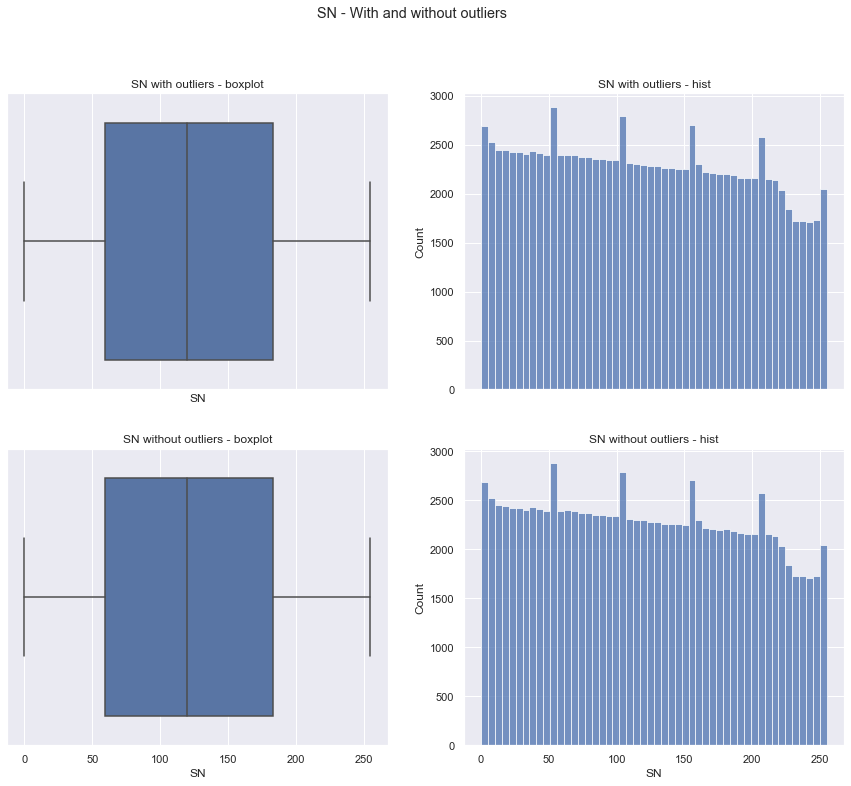

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


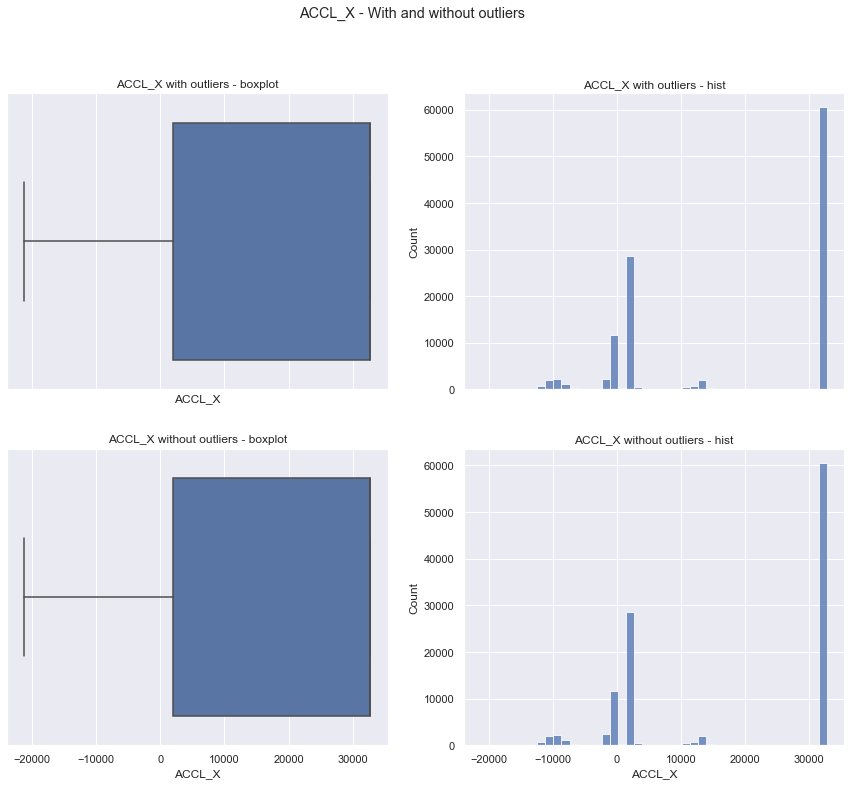

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


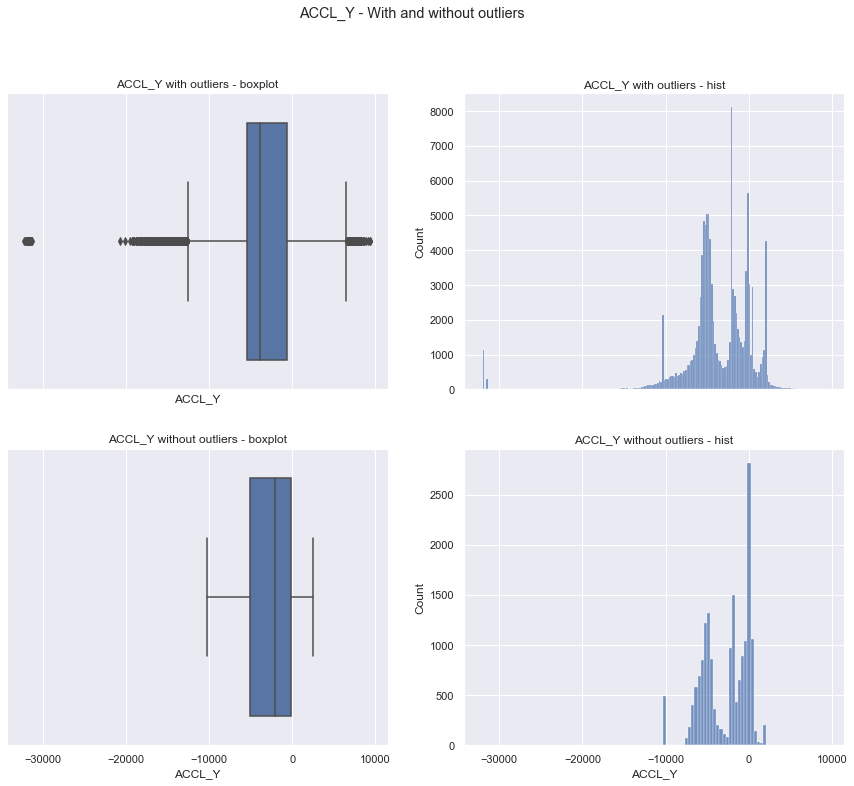

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


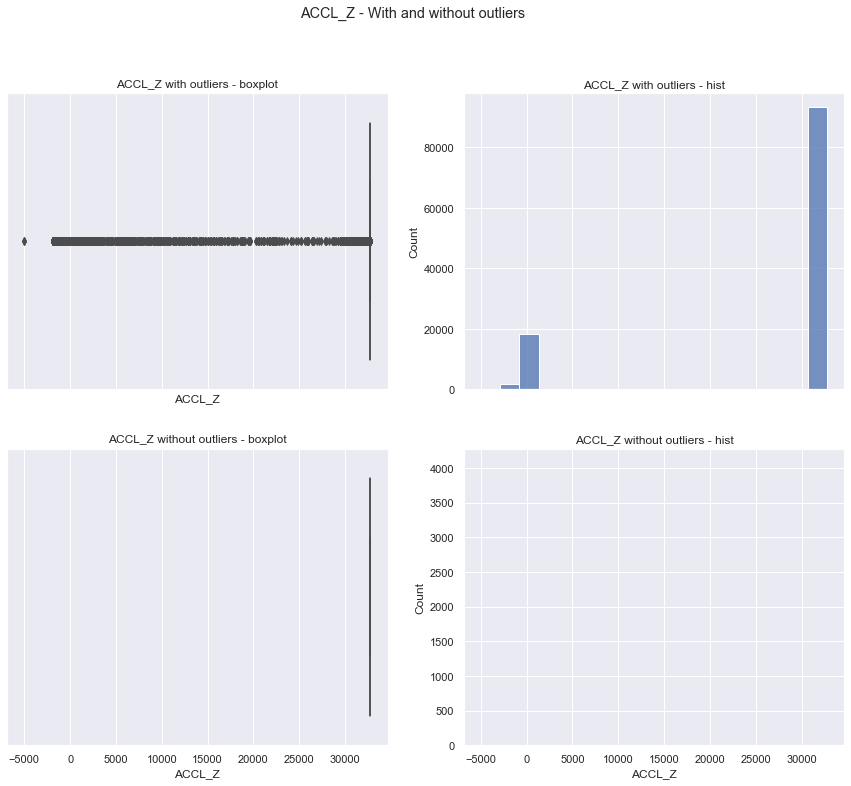

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


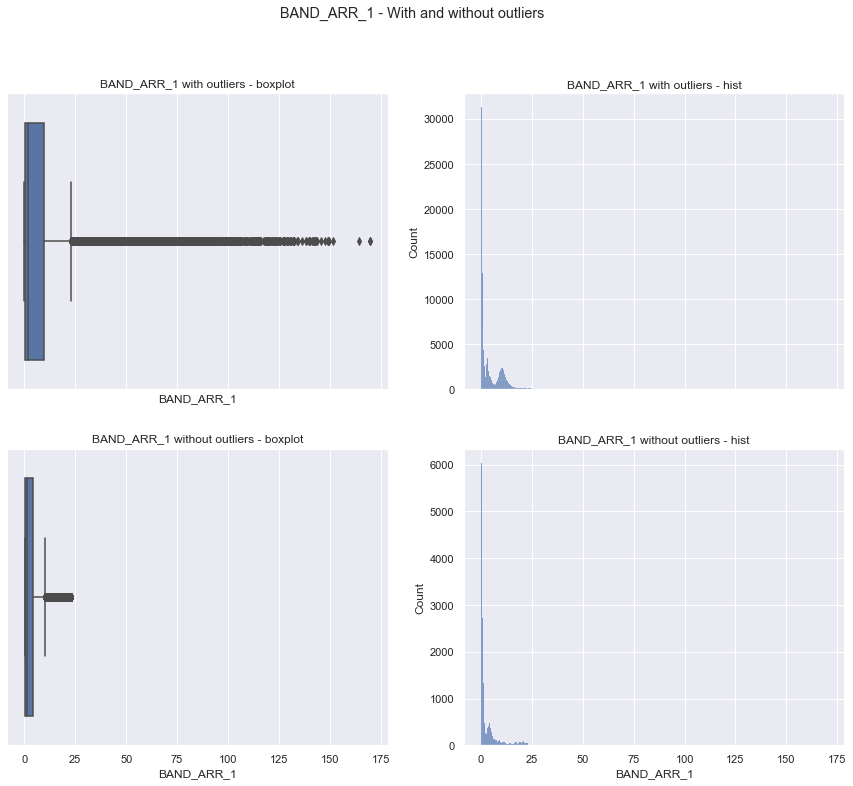

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


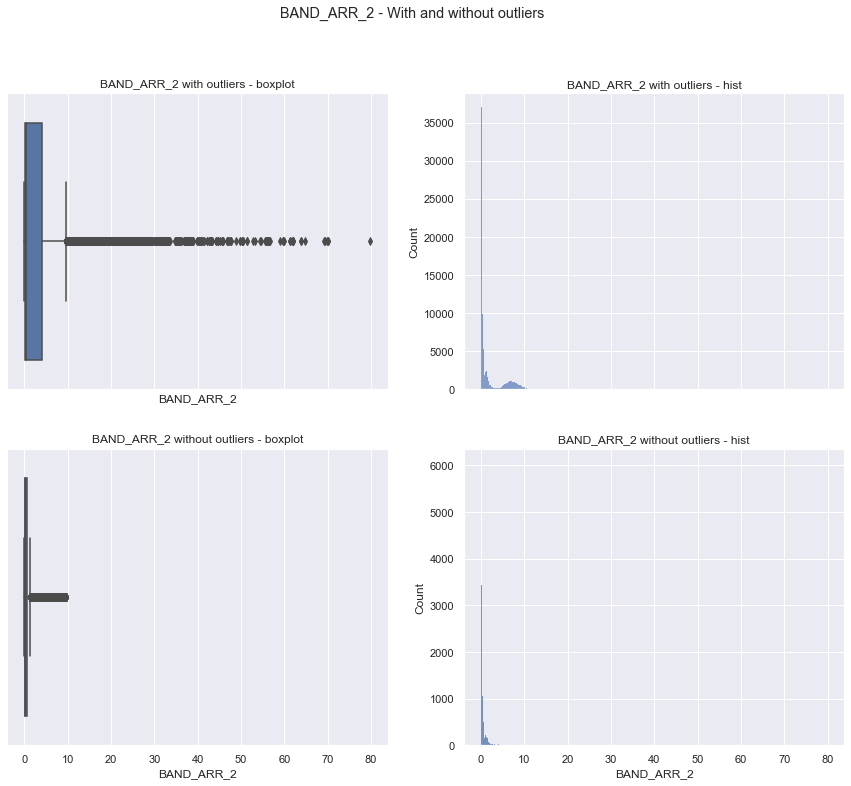

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


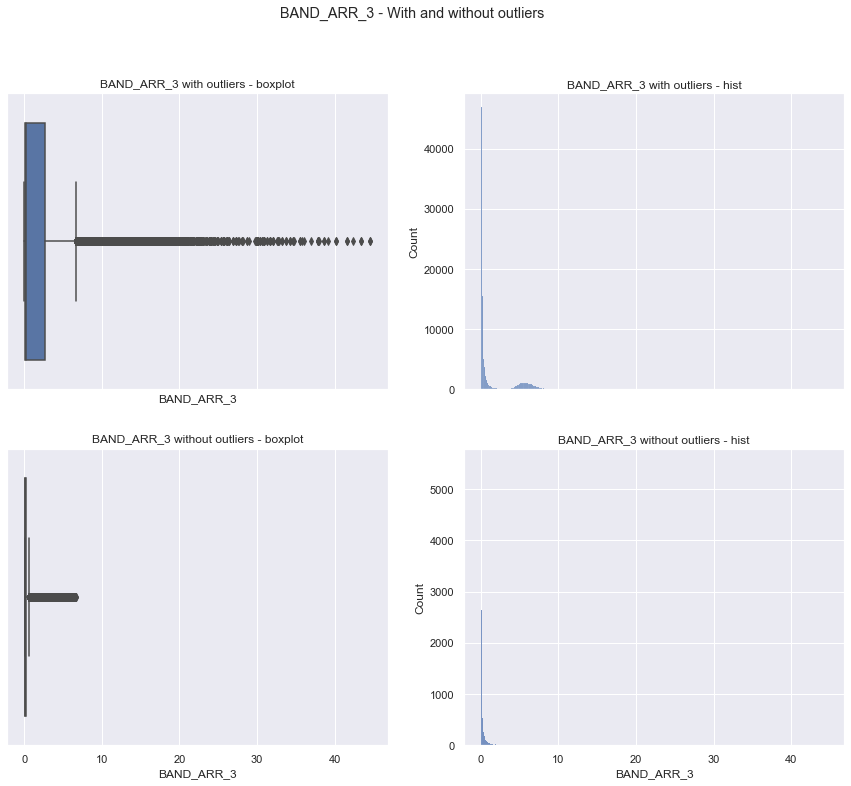

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


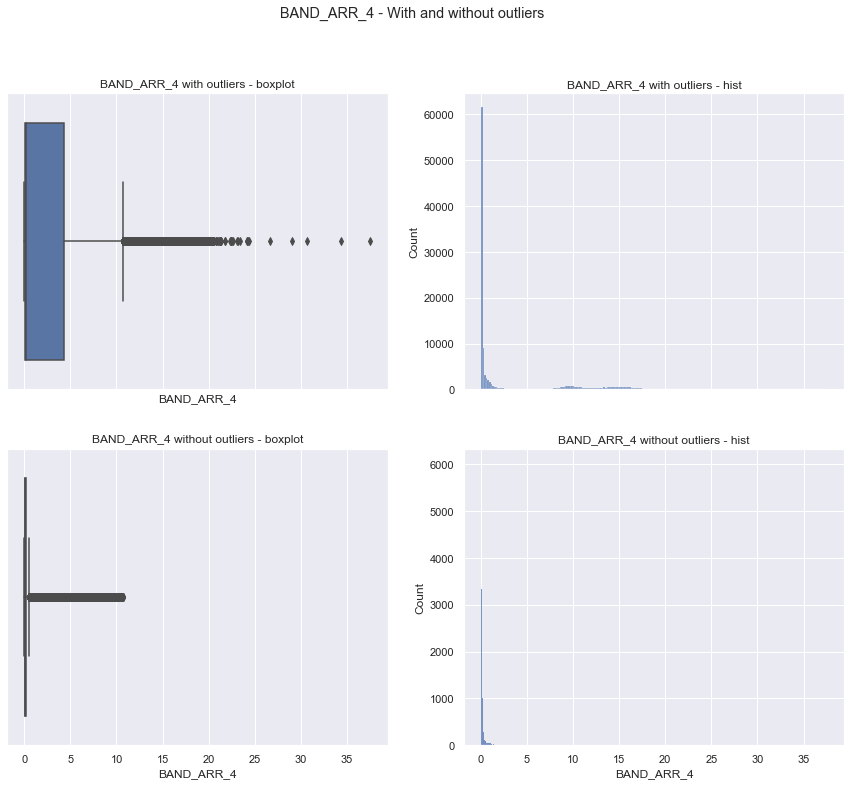

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


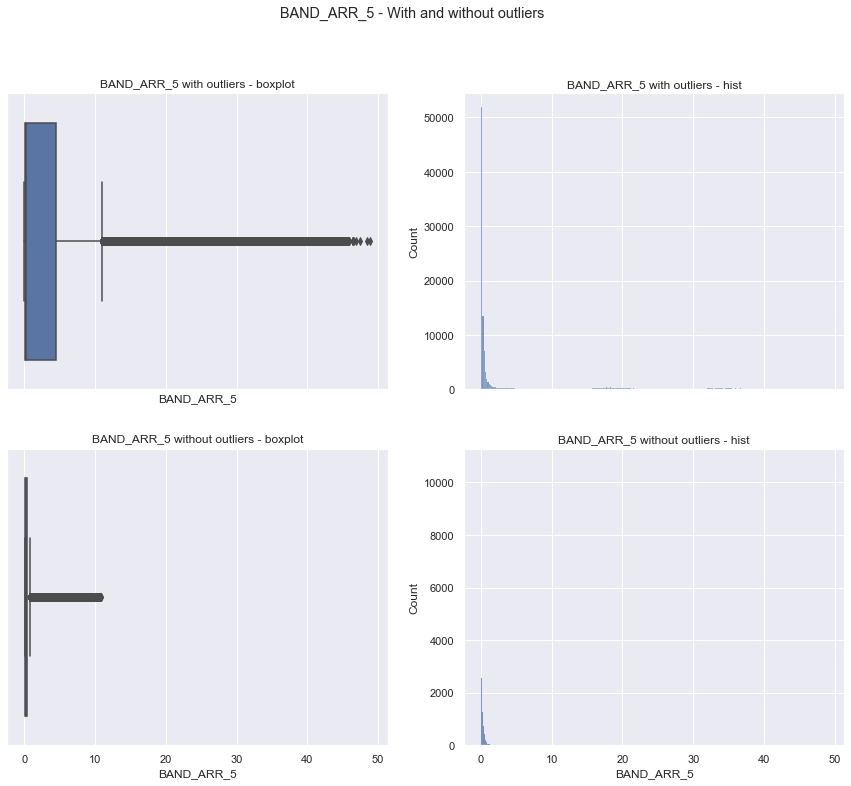

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


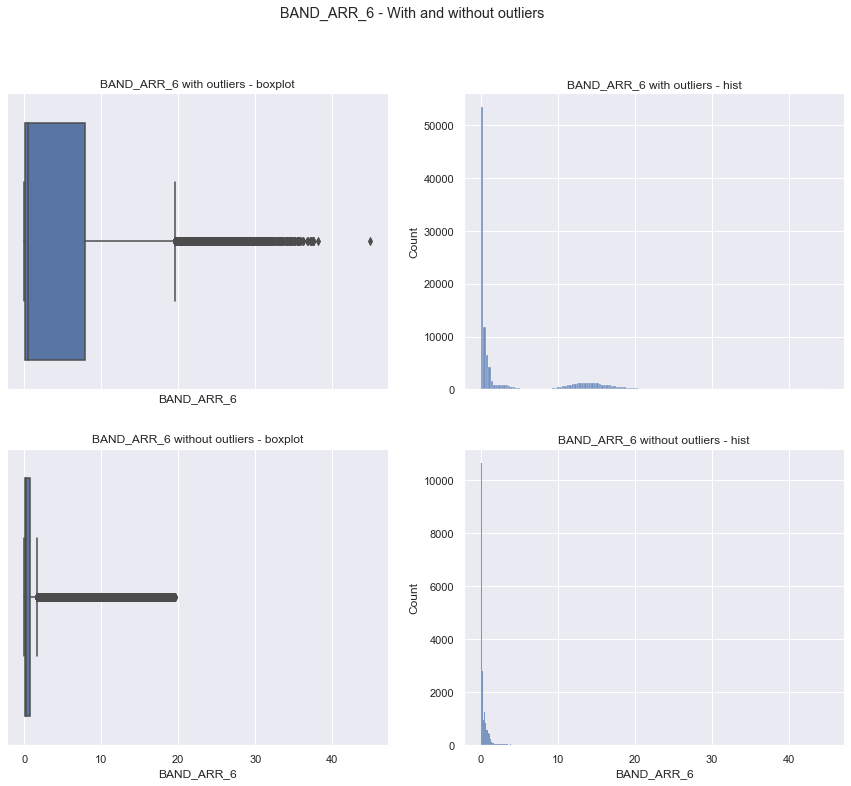

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


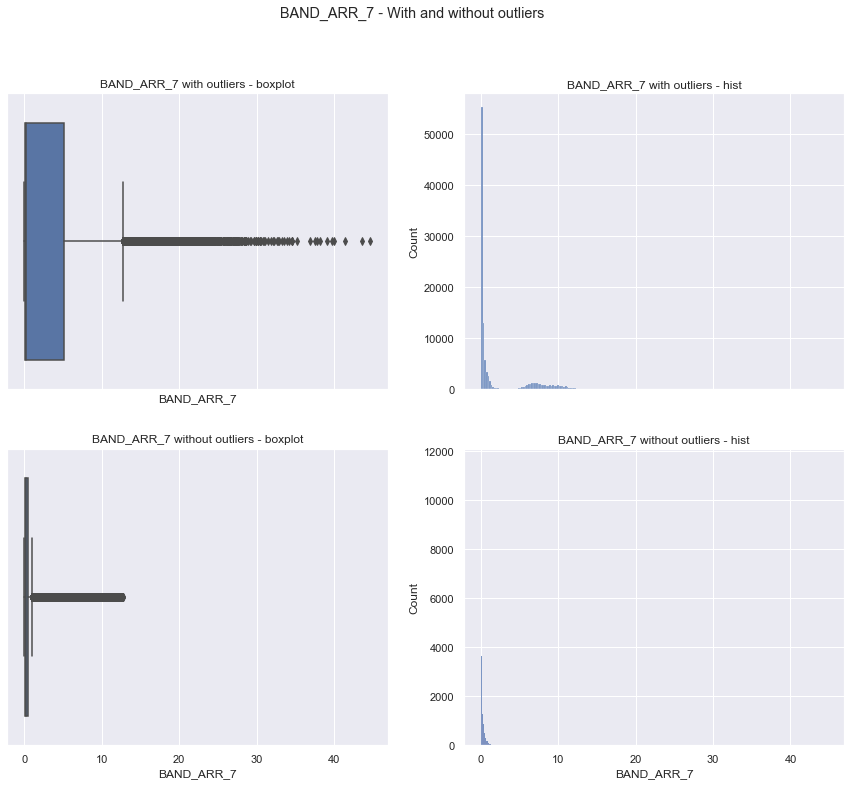

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


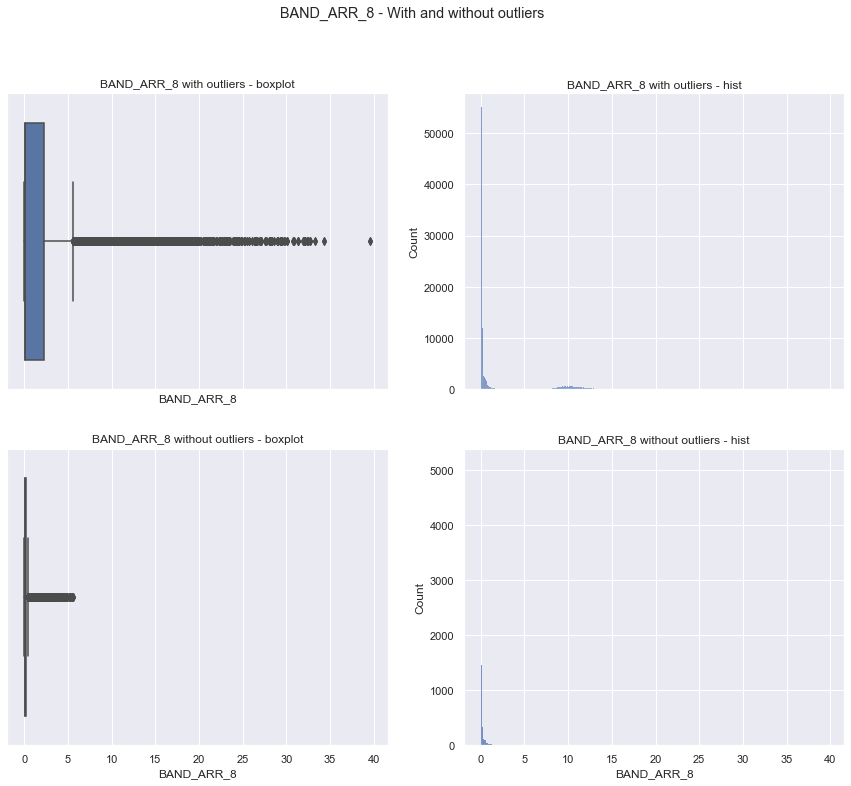

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


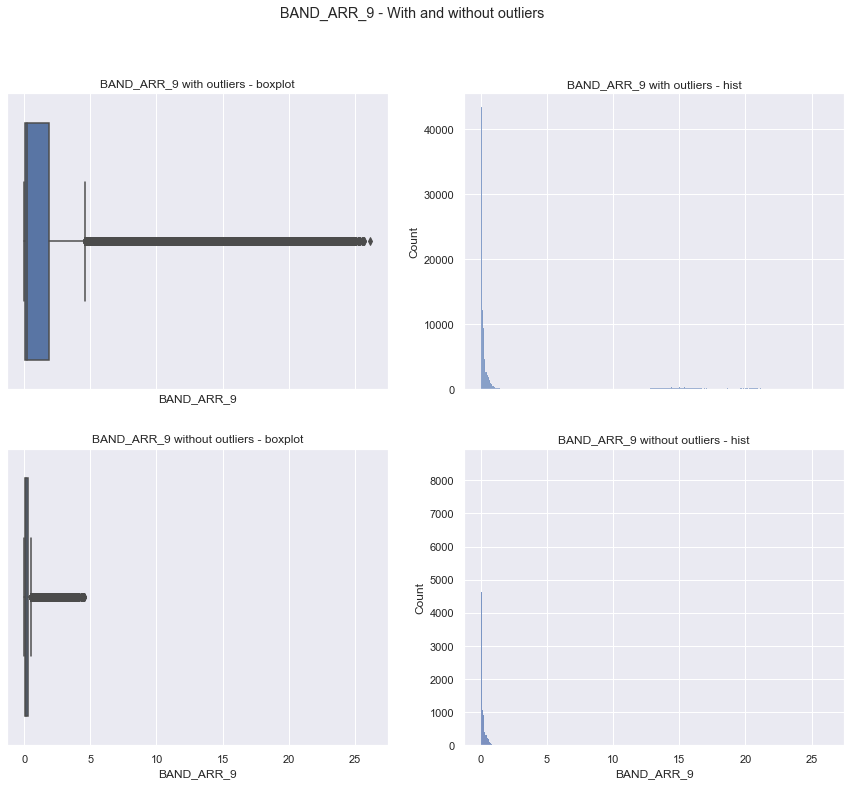

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


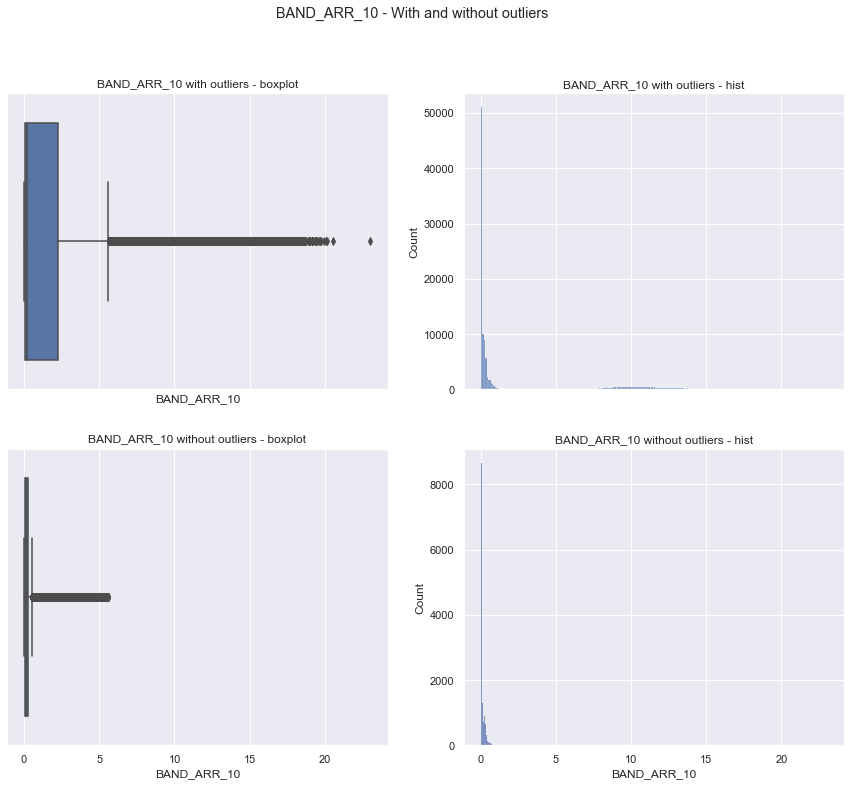

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


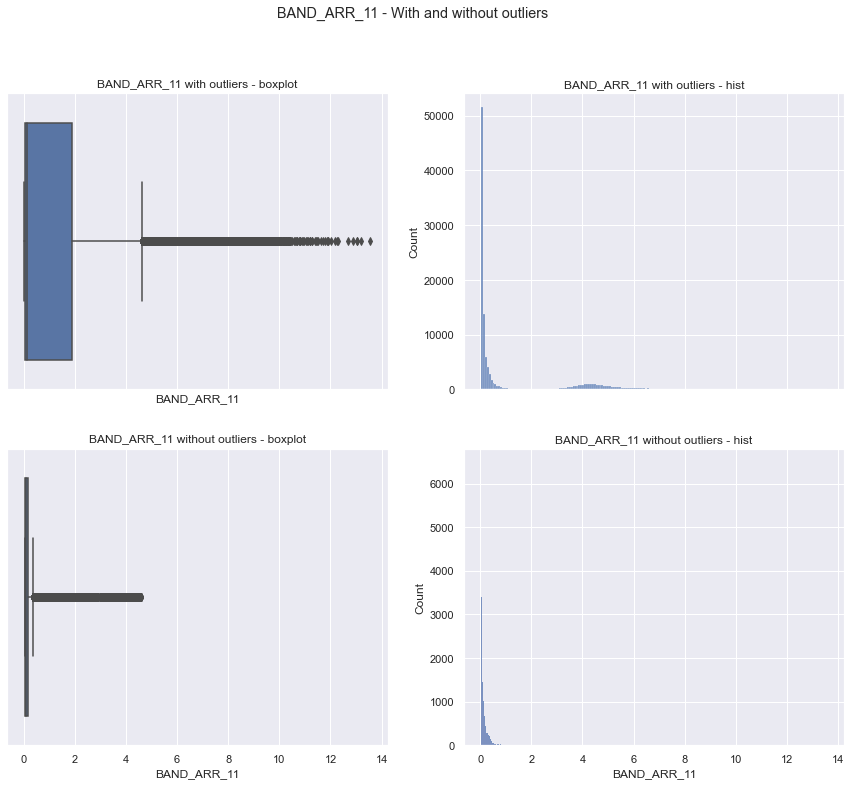

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


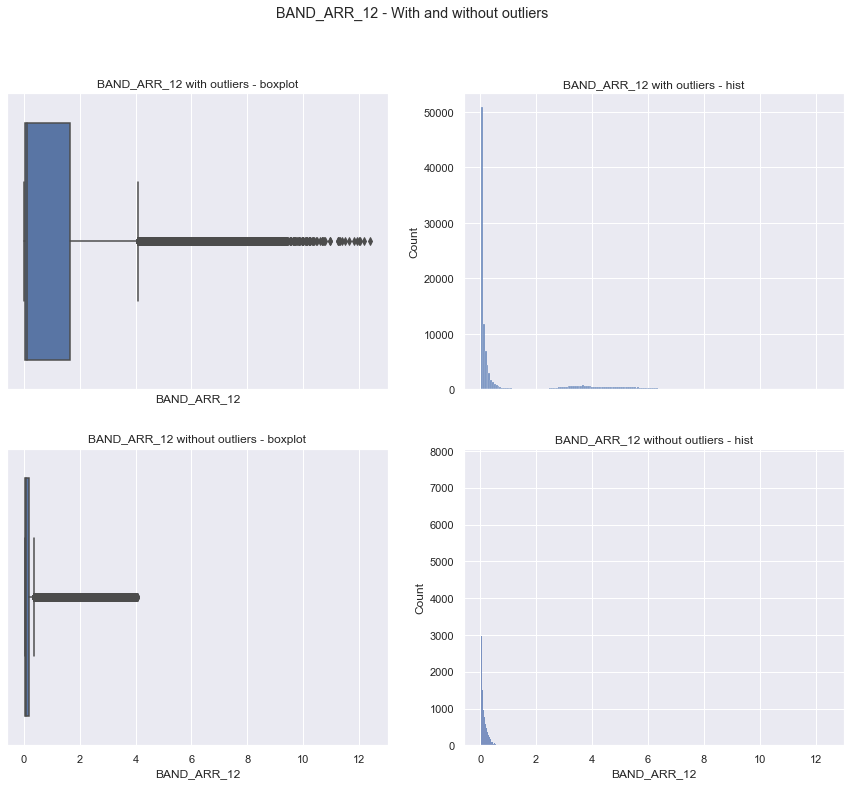

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


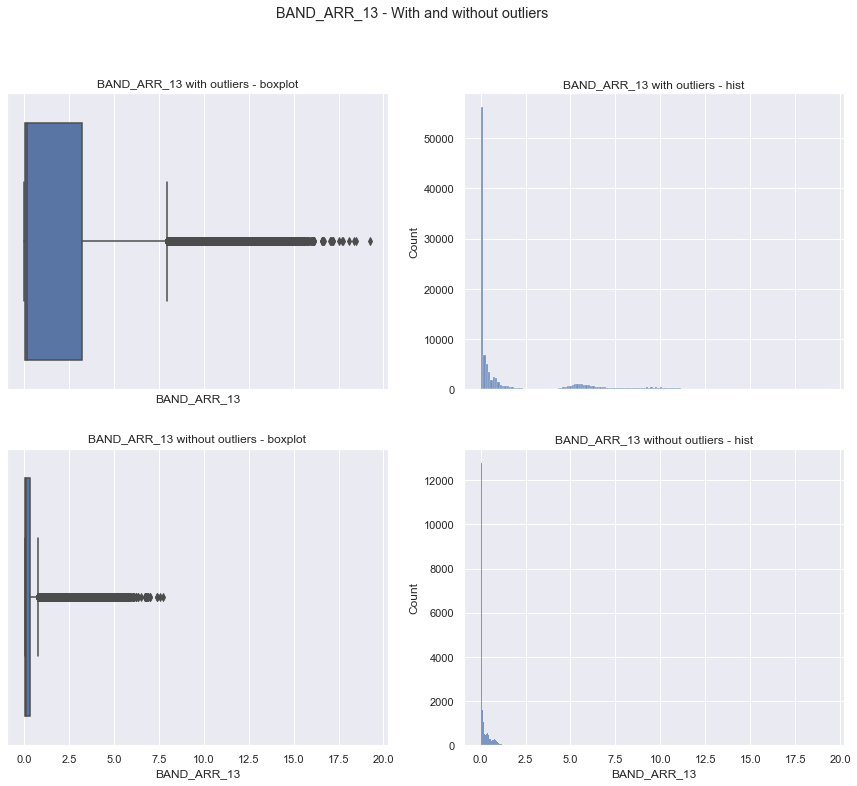

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


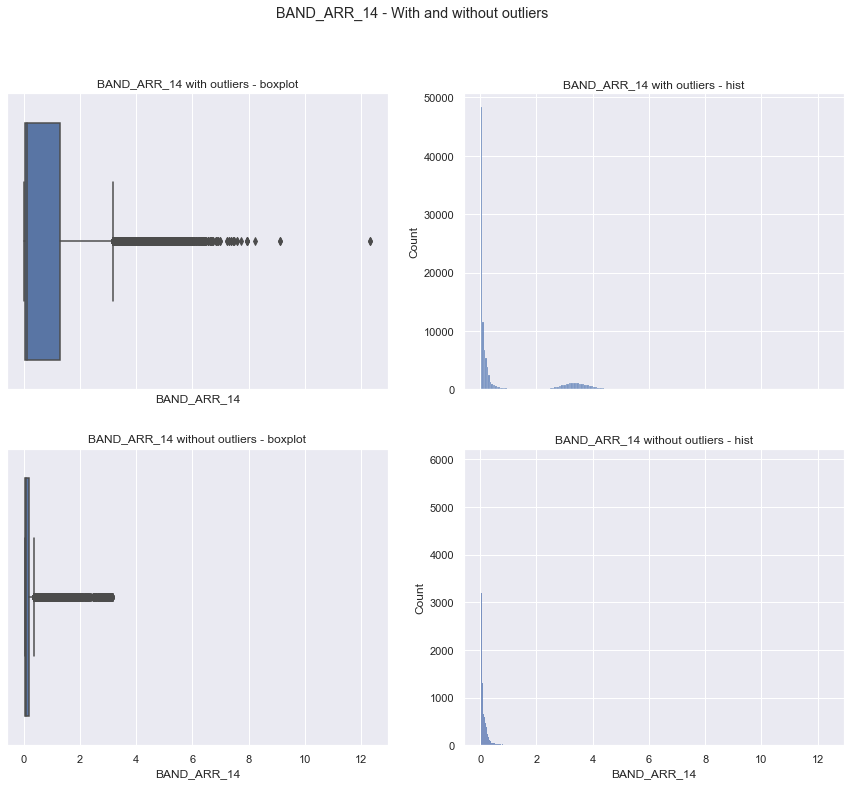

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


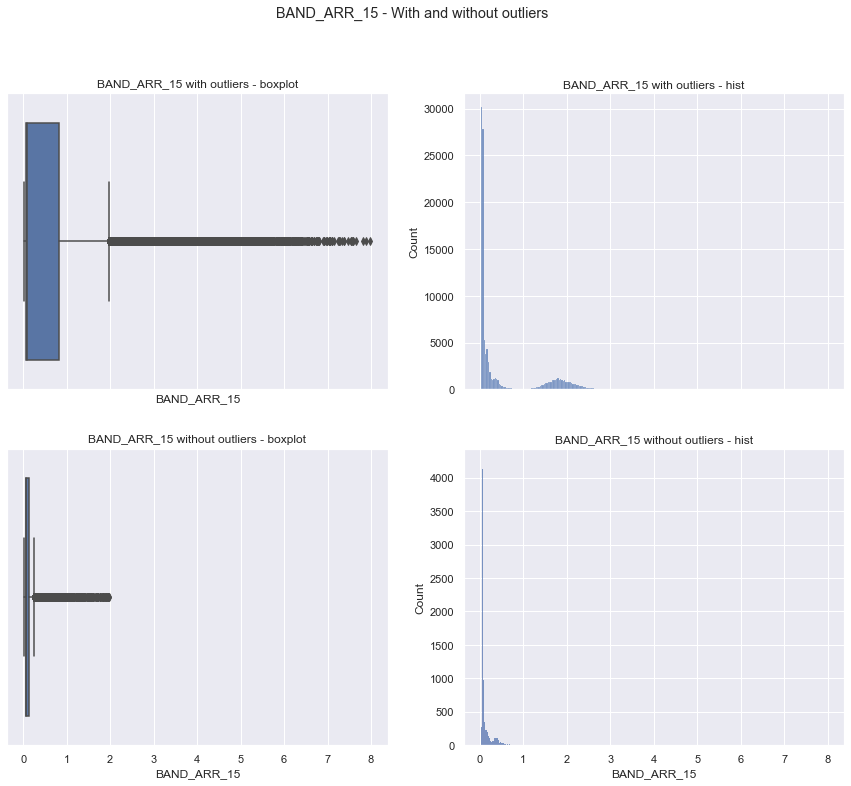

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


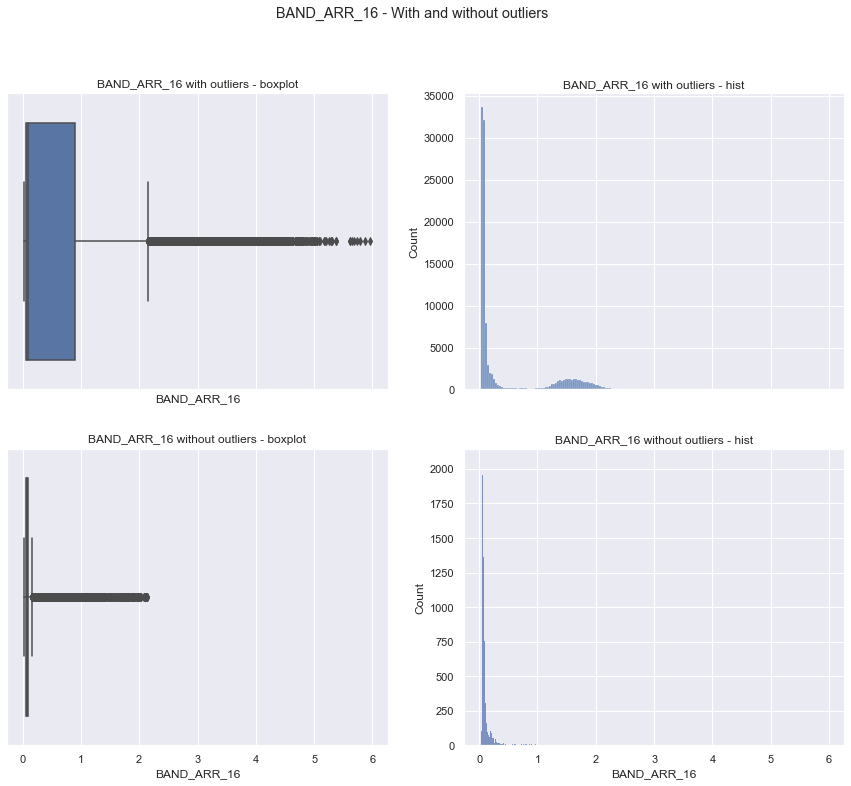

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


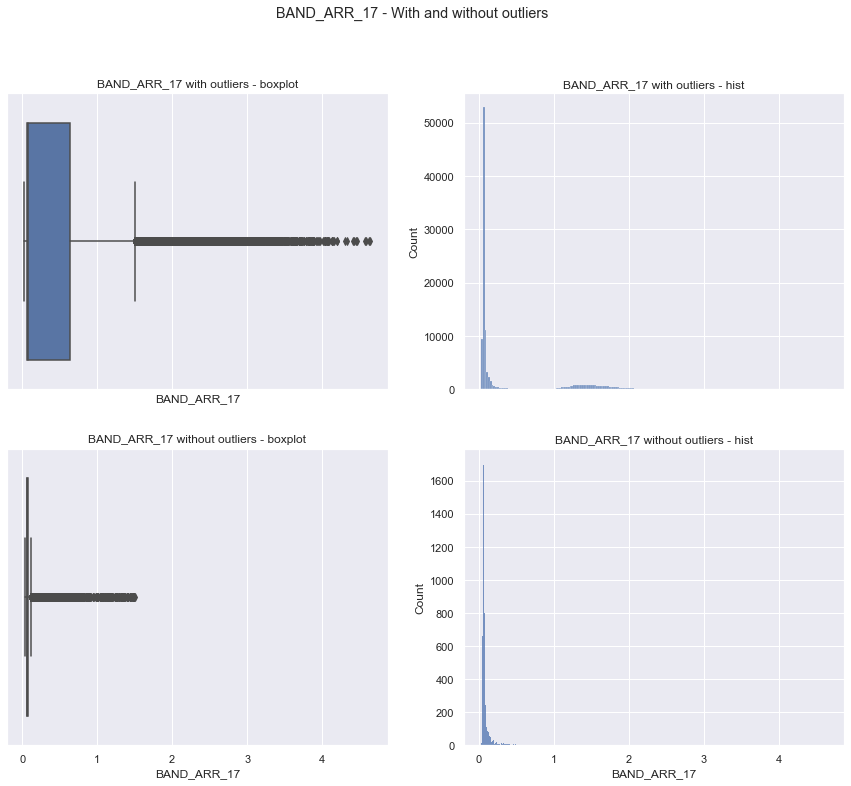

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


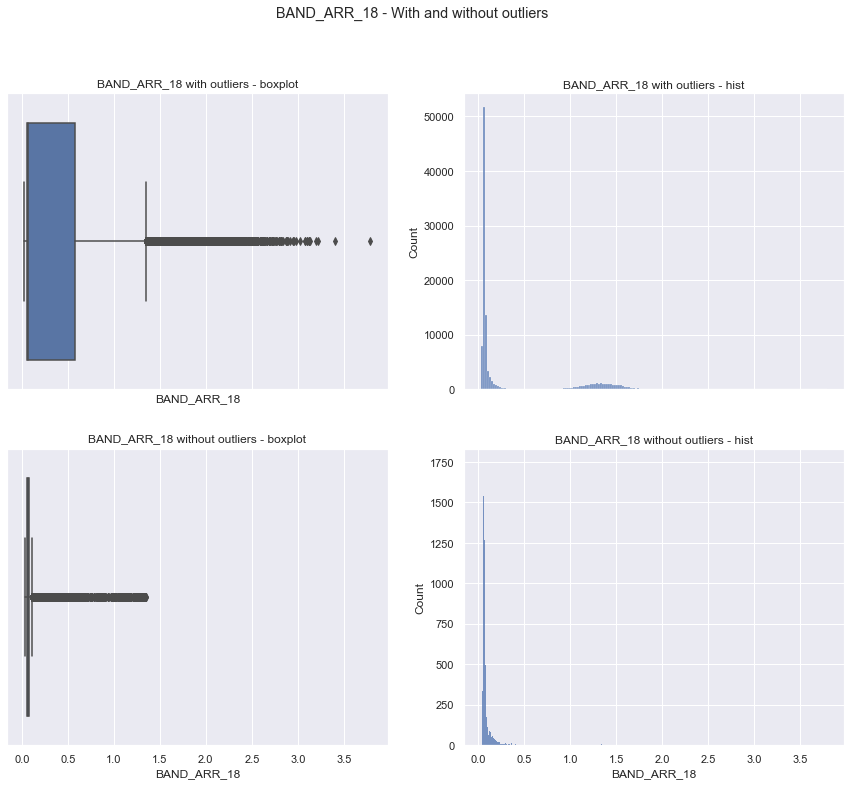

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


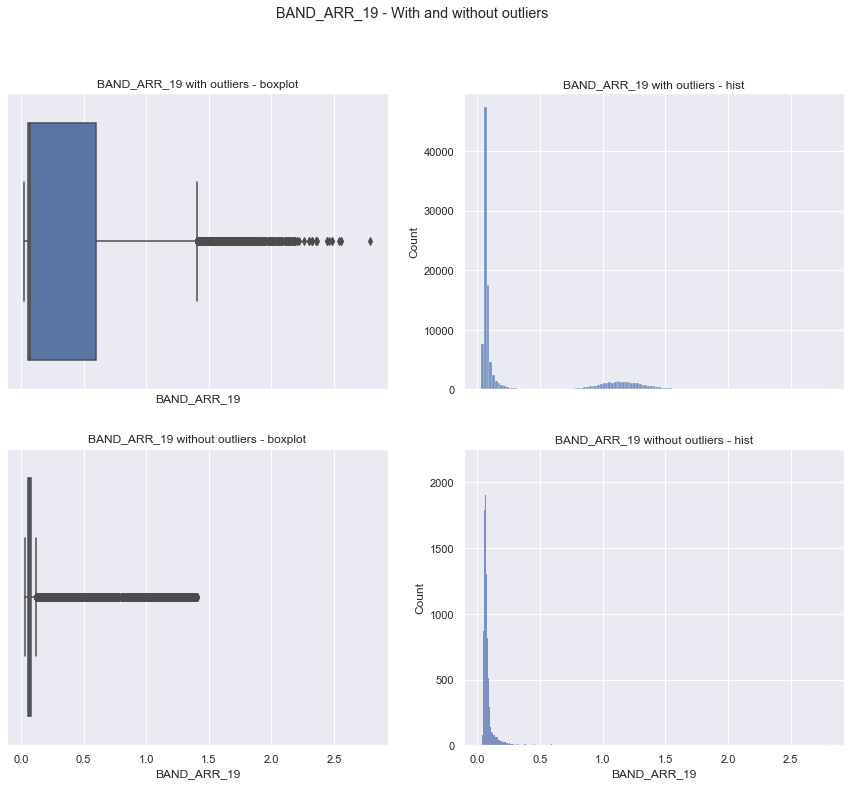

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


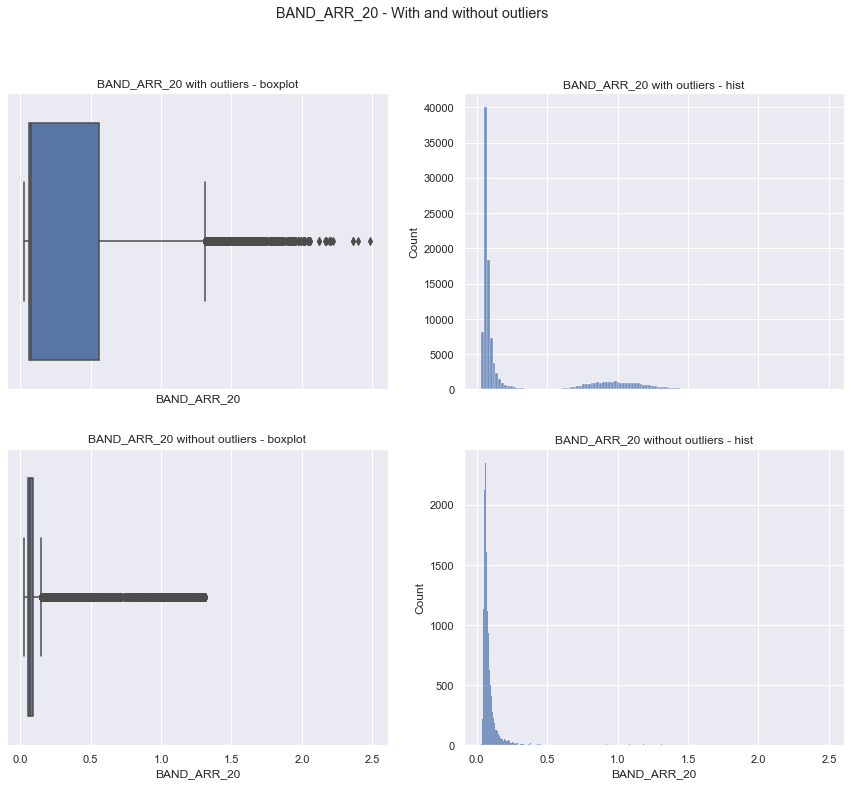

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


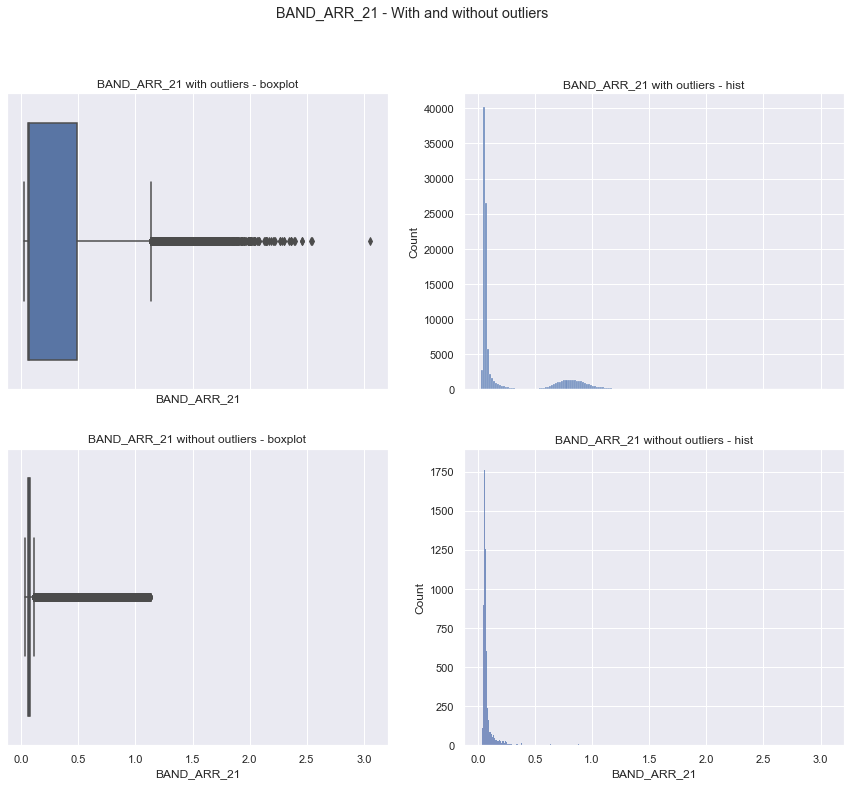

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


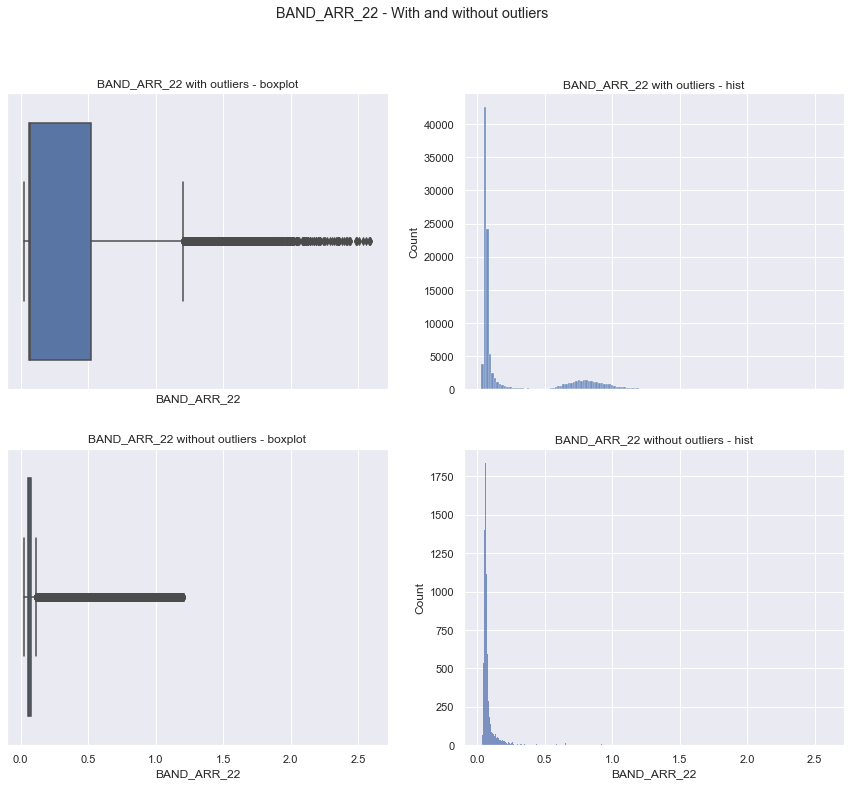

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


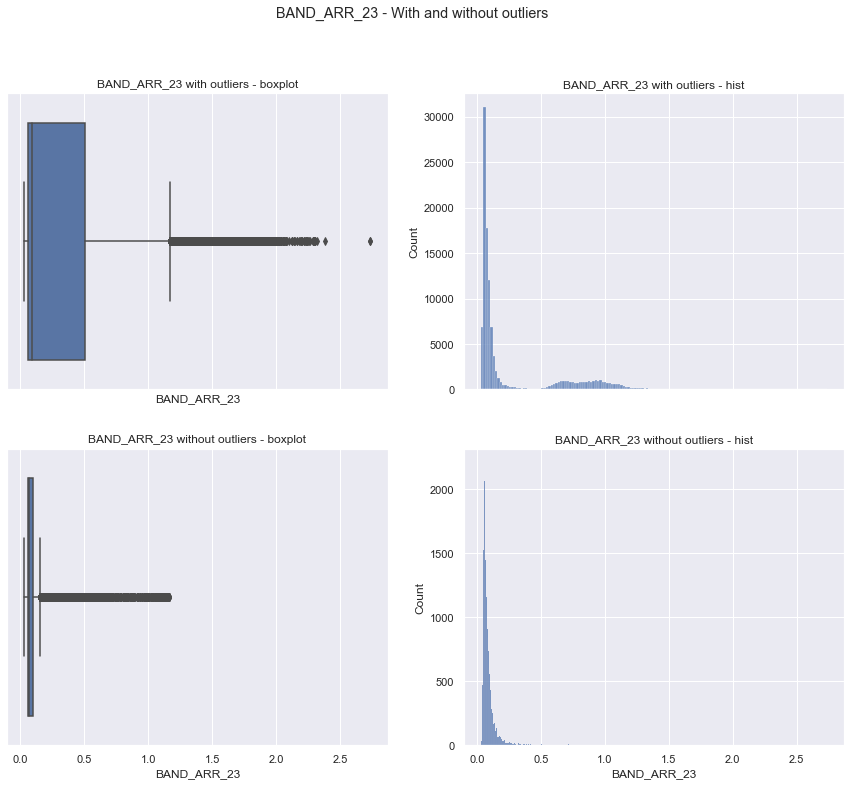

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


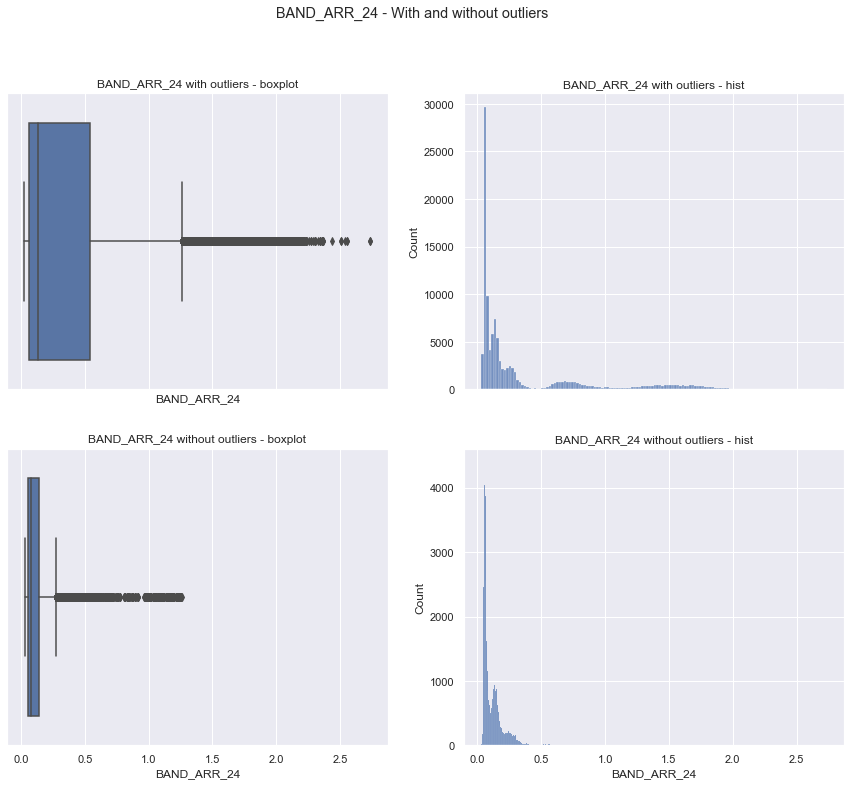

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


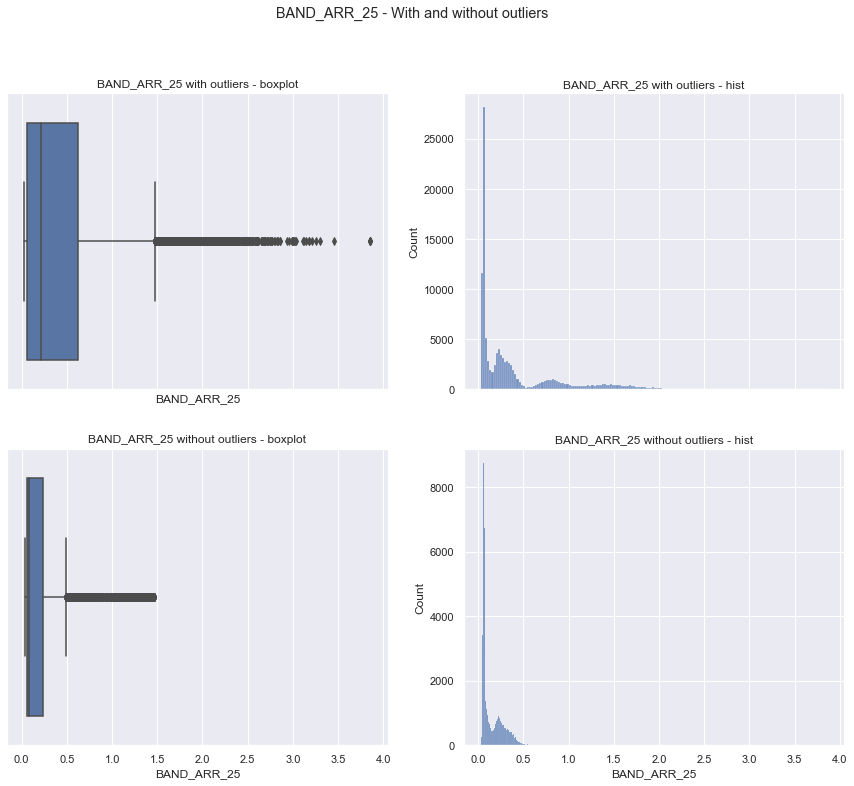

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


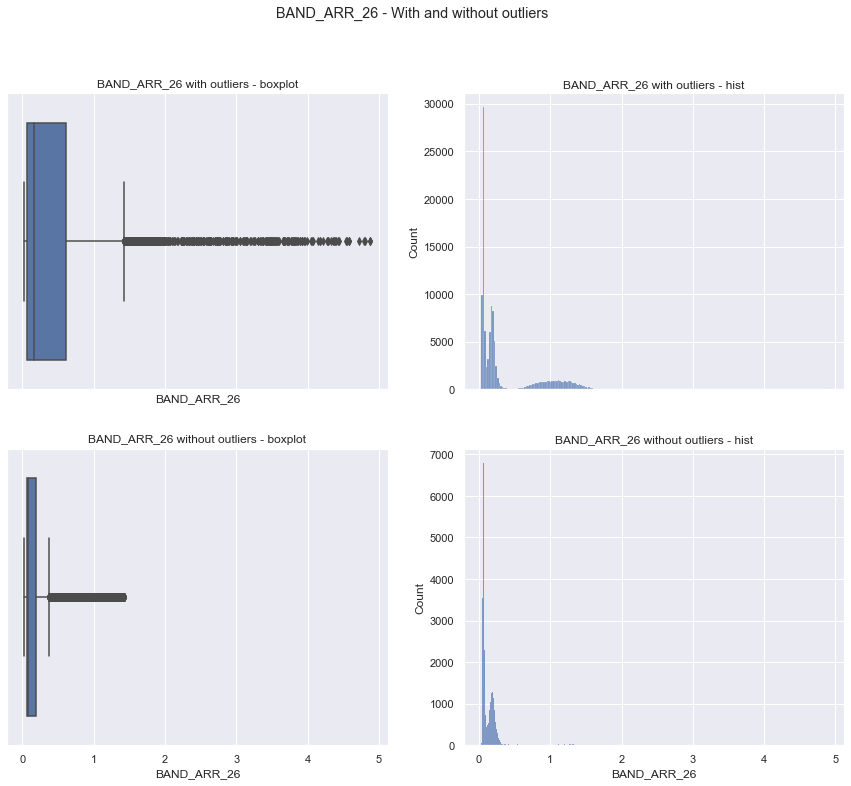

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


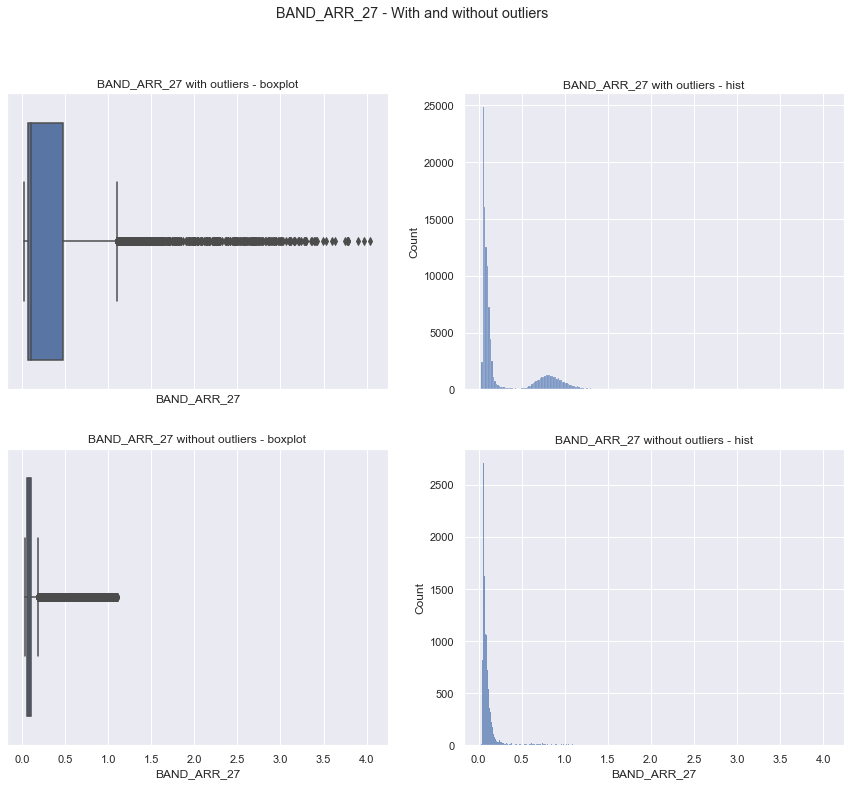

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


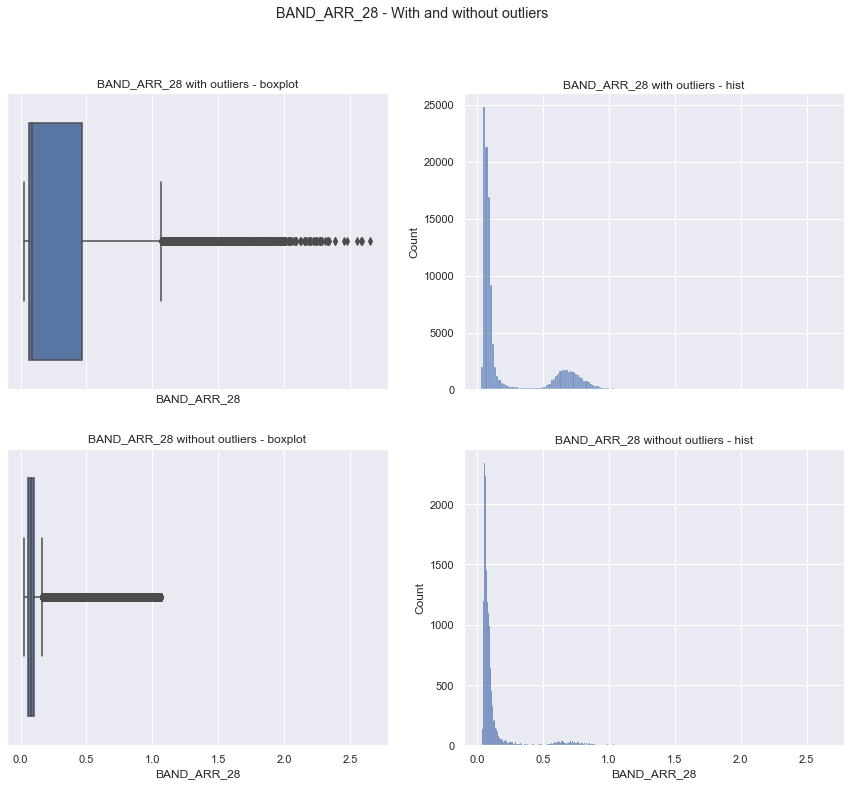

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


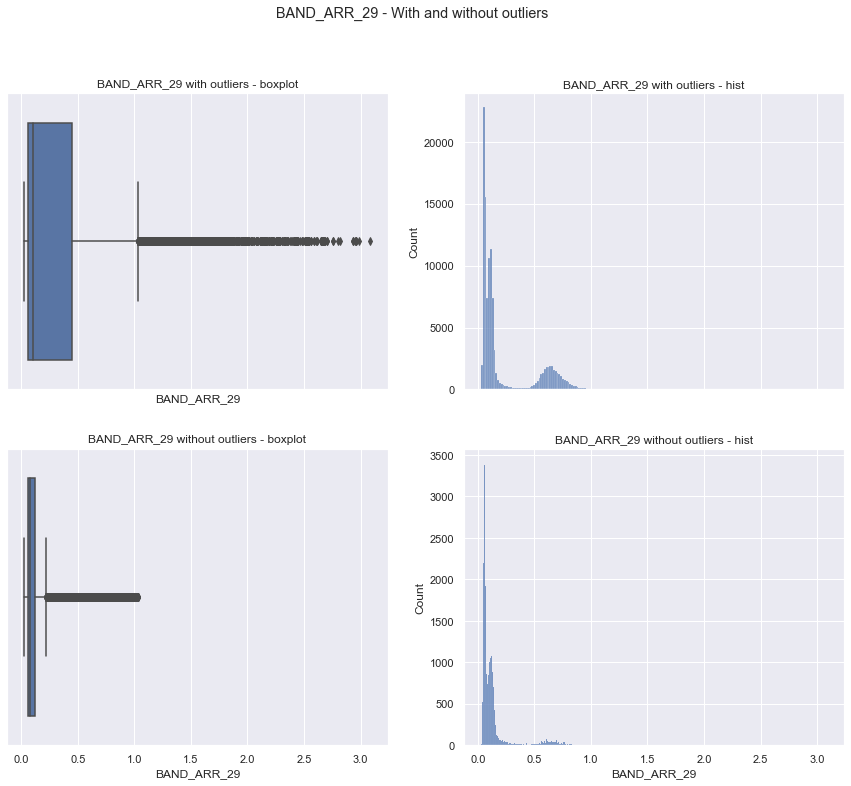

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


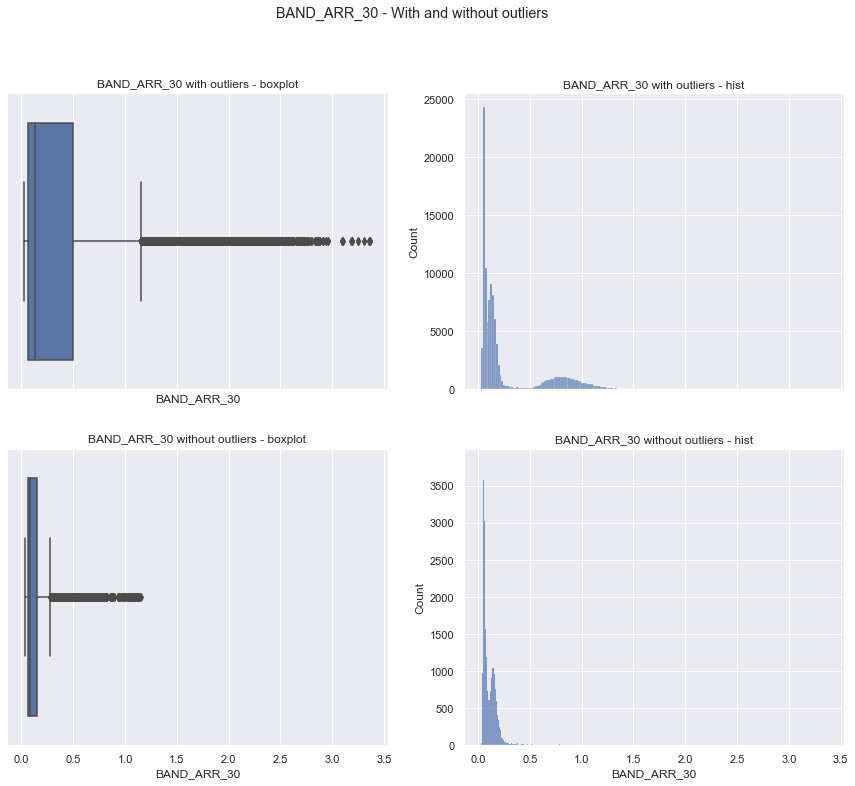

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


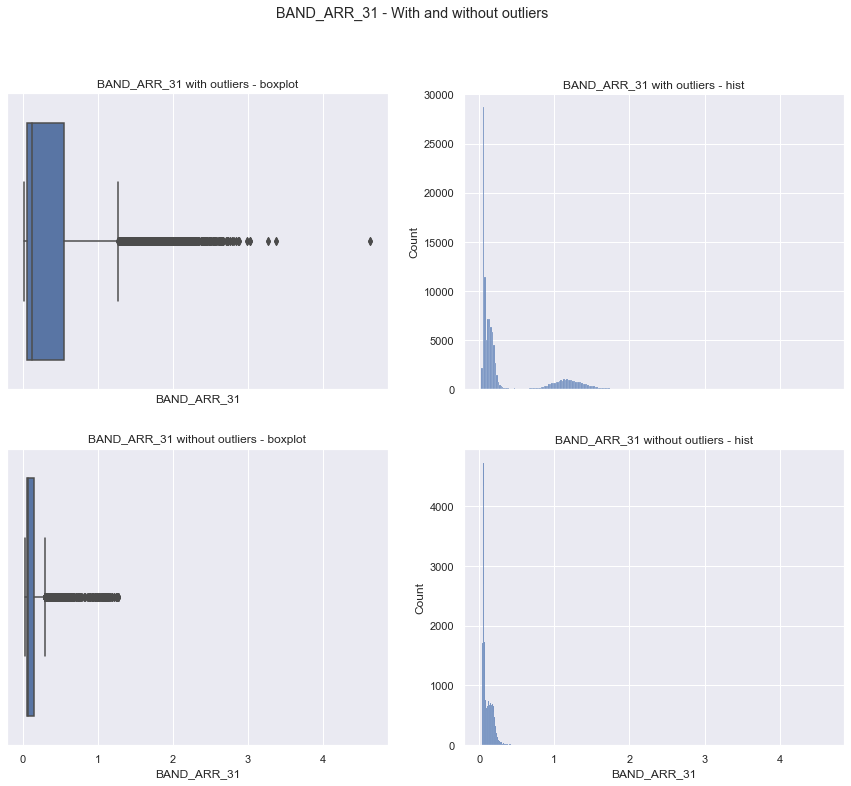

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


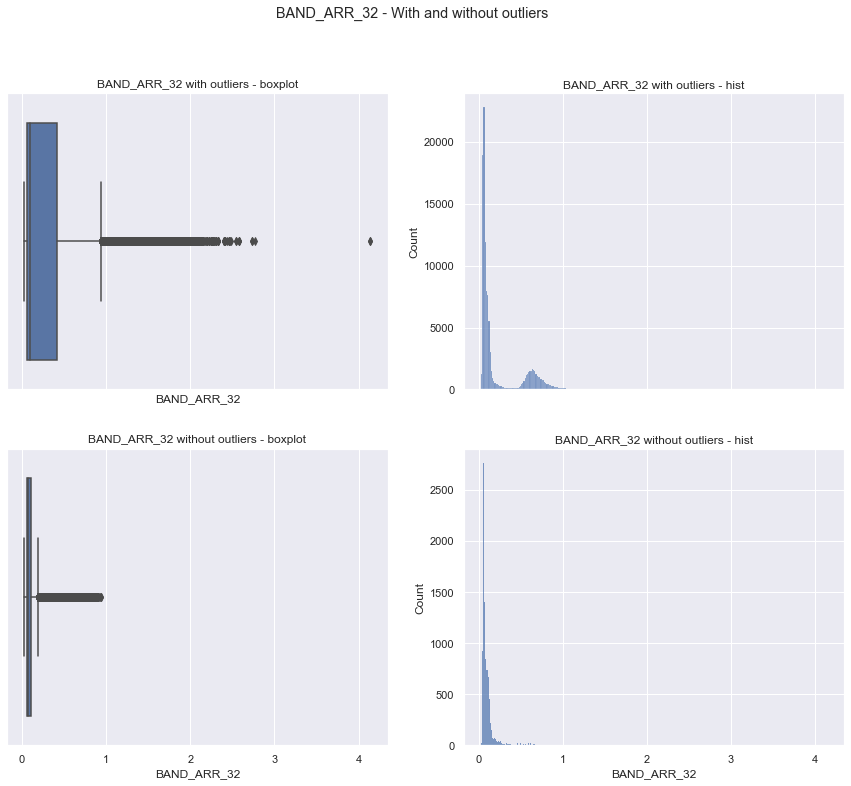

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


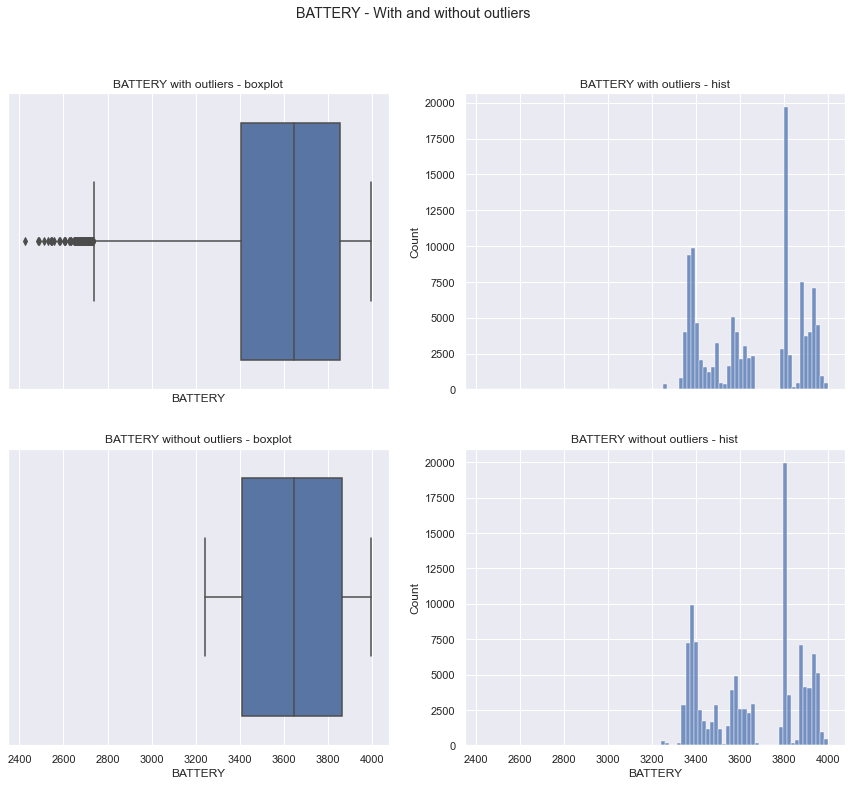

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


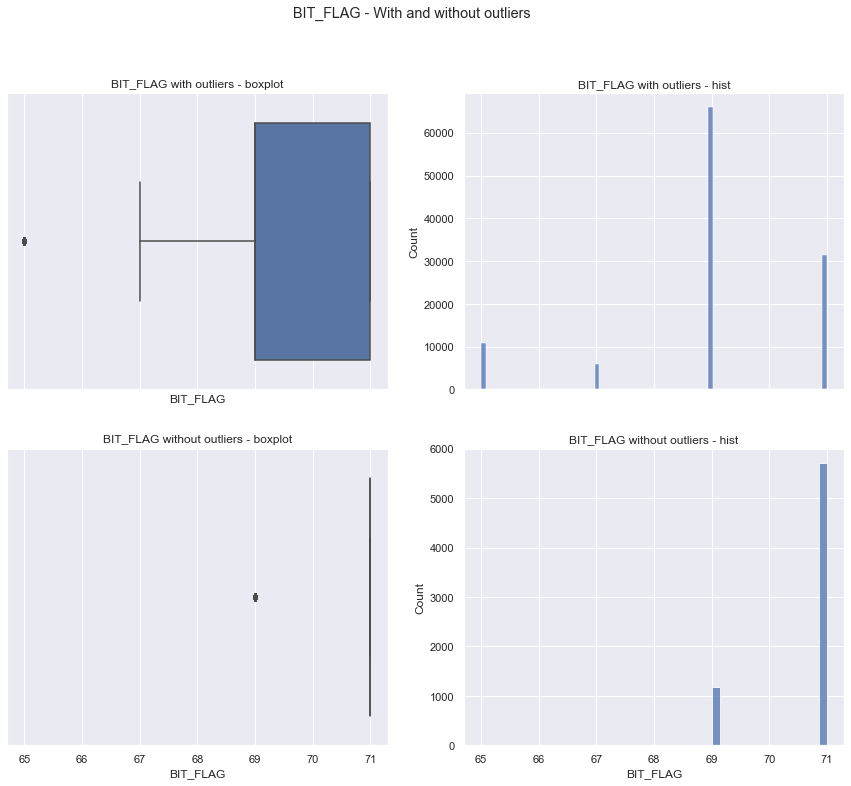

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


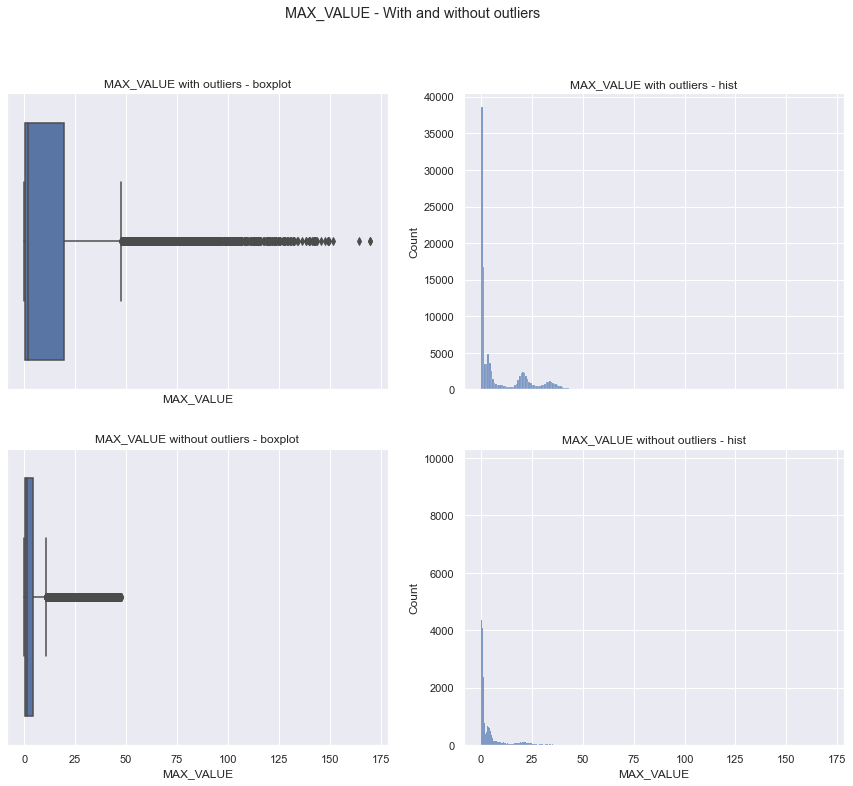

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


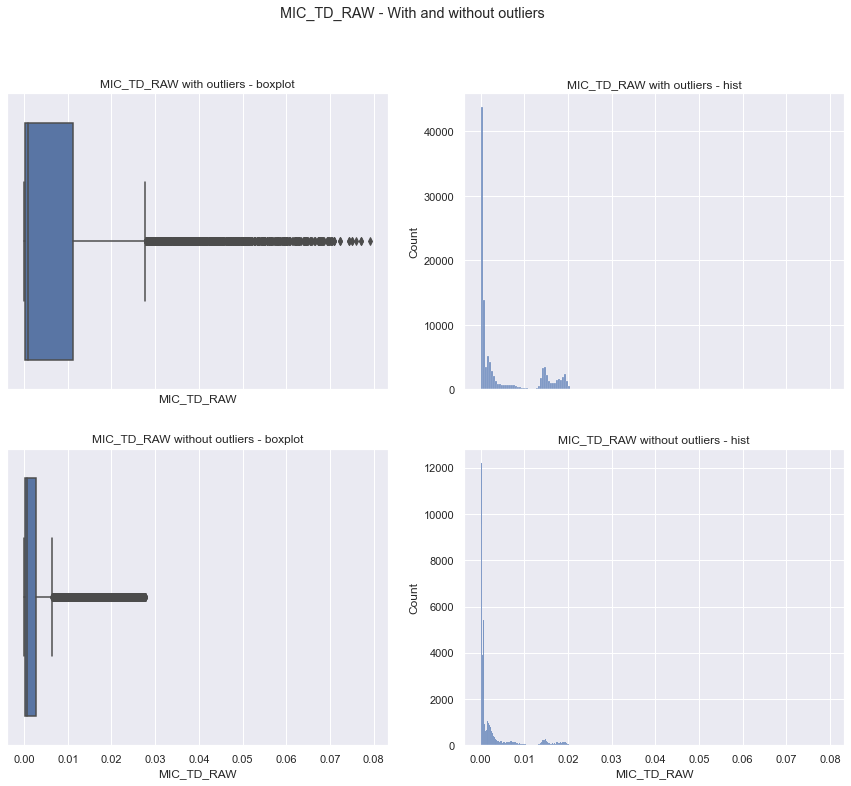

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


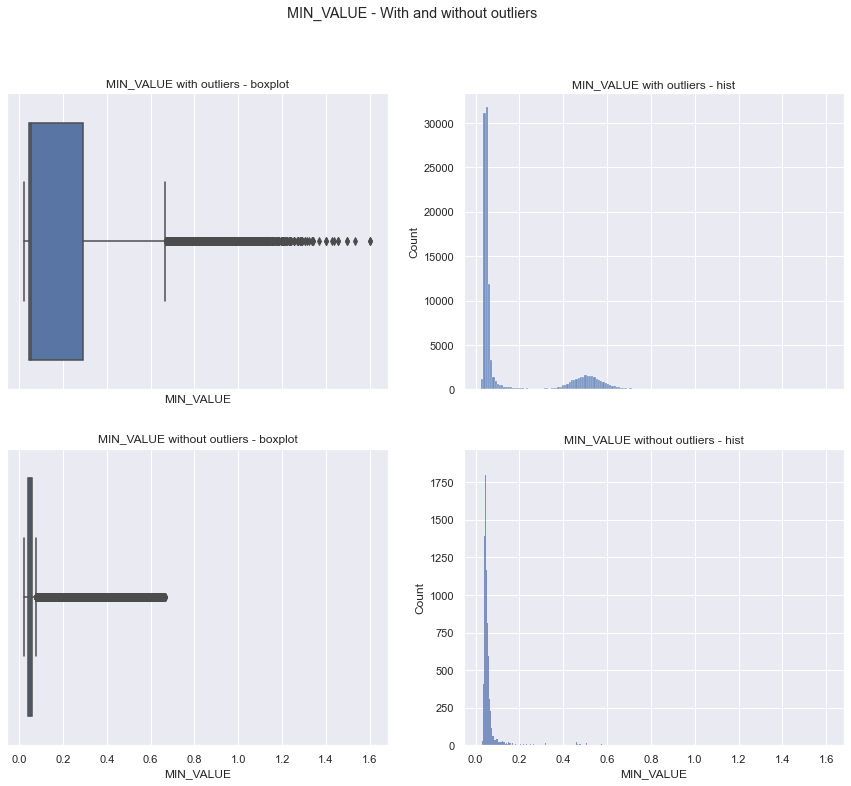

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


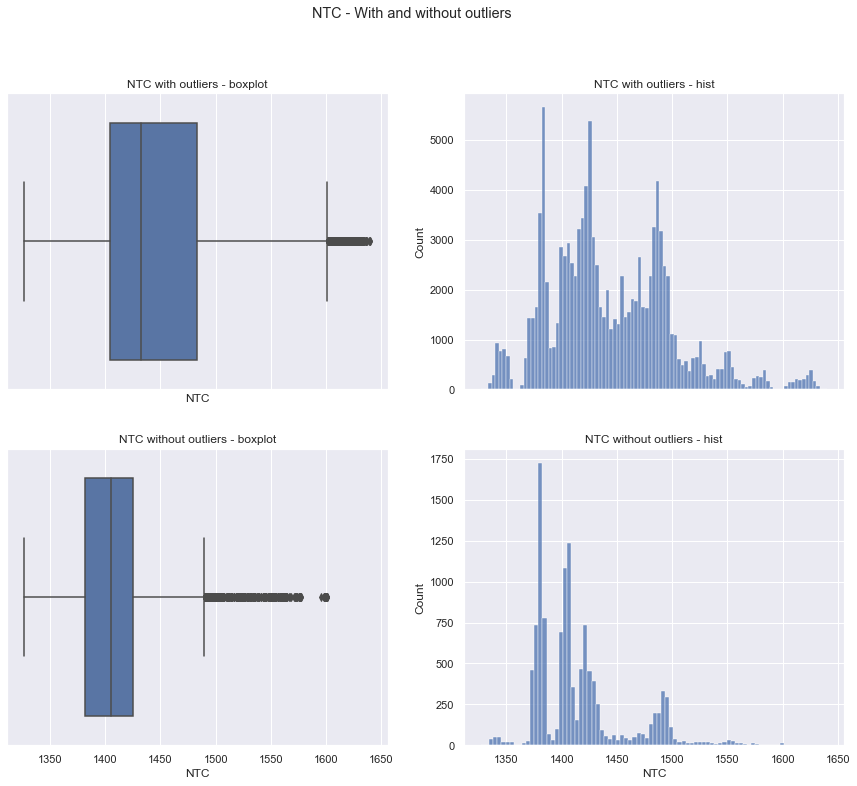

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


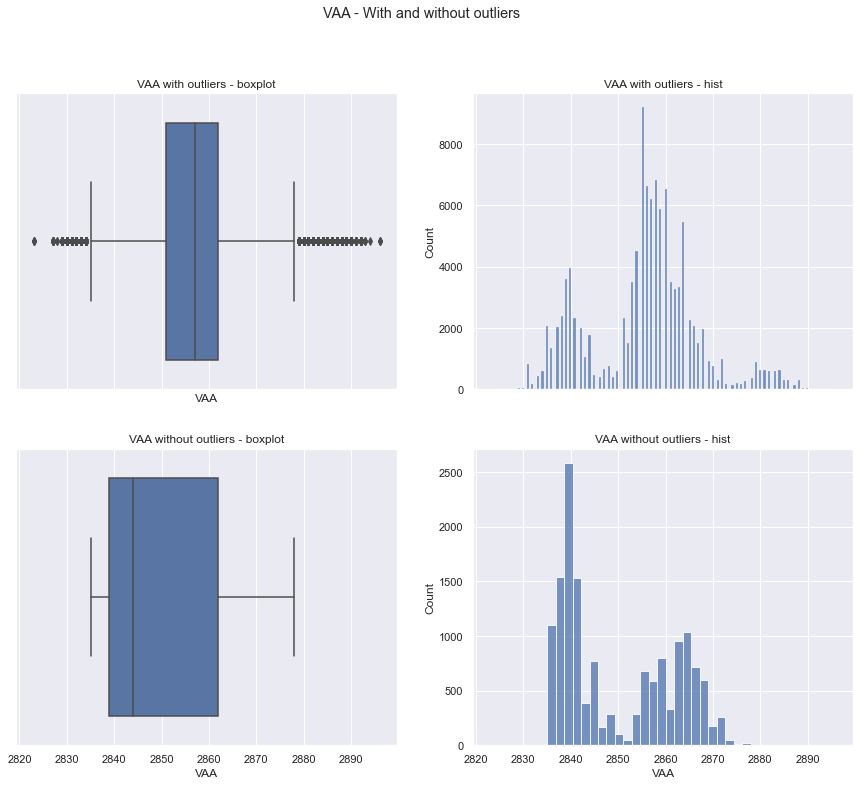

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


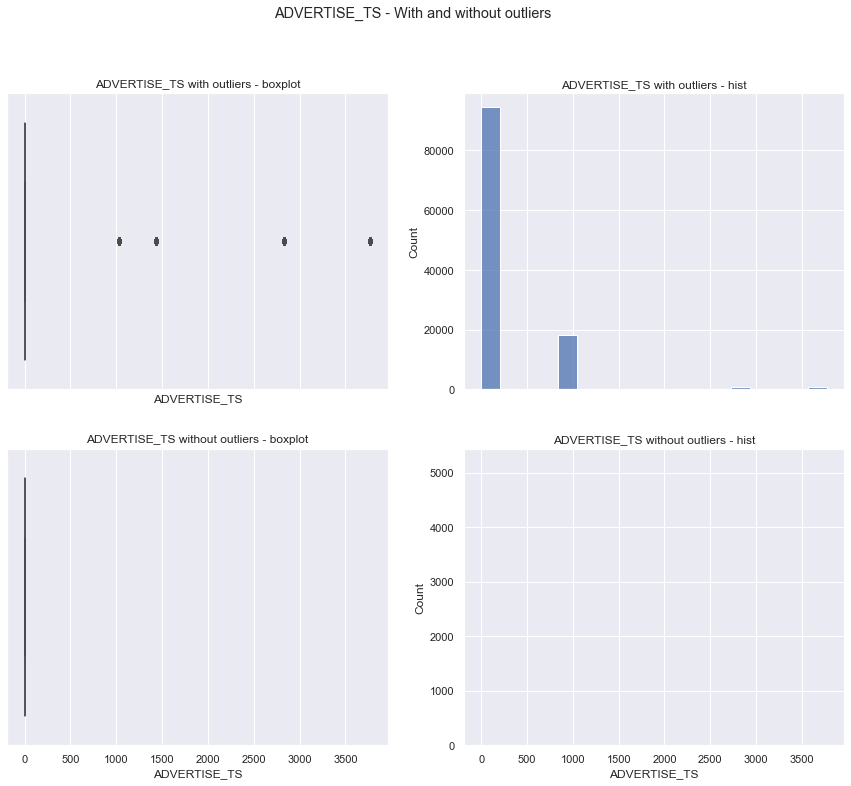

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


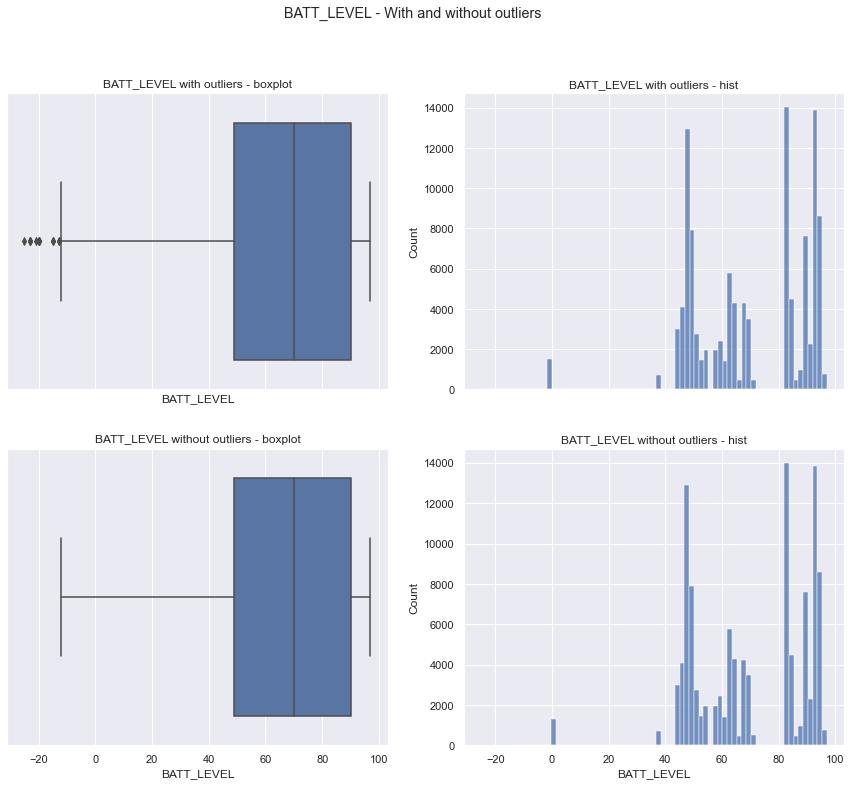

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


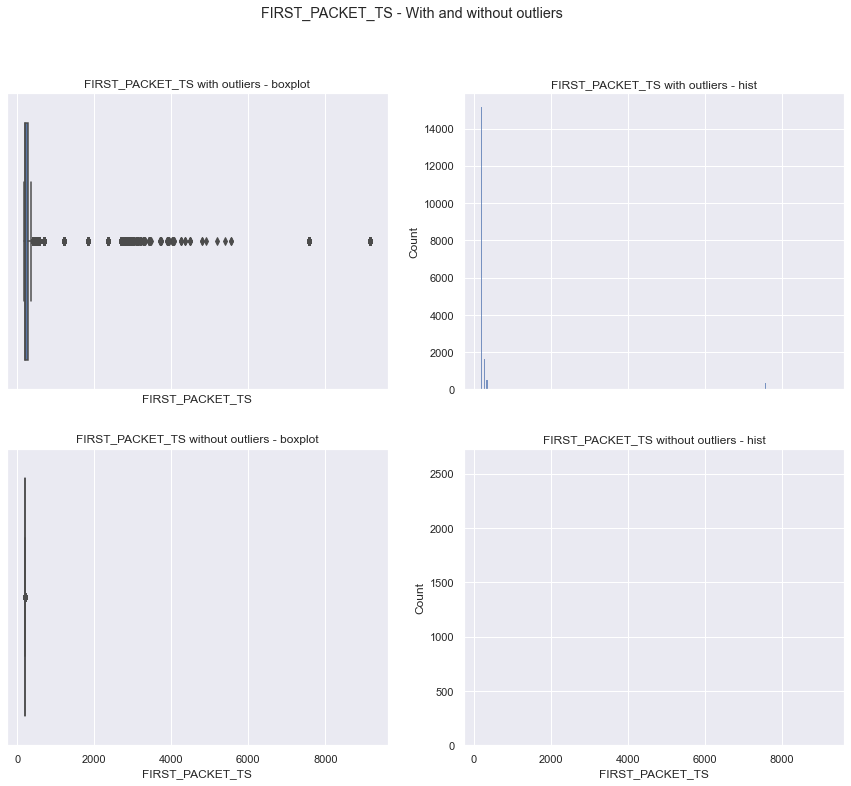

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


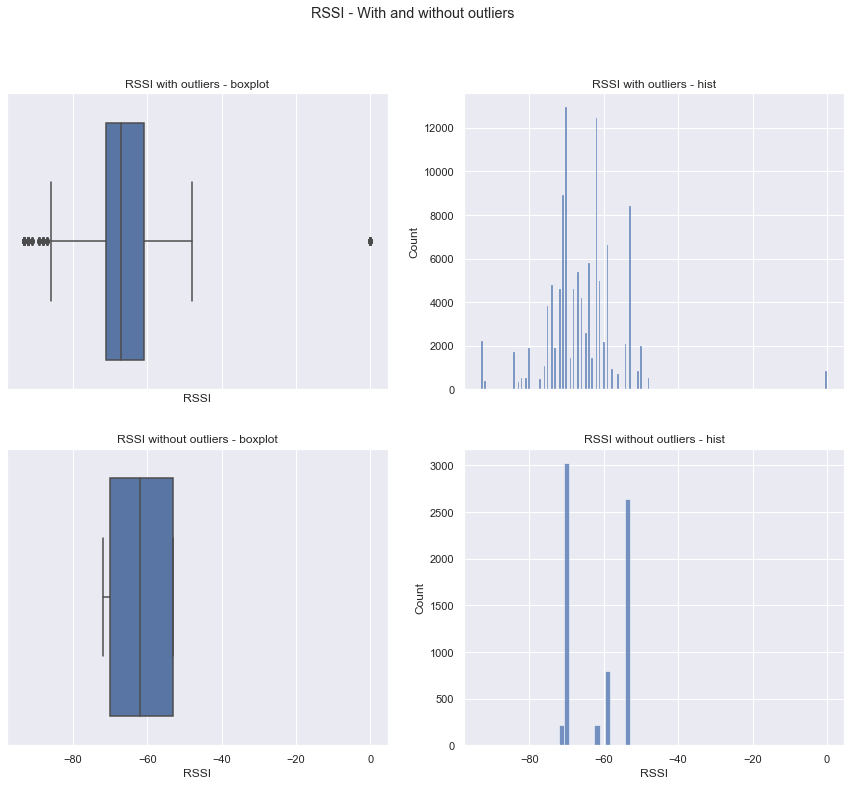

In [58]:
for i in numeric_df:
    Q1 = np.nanpercentile(ff[i], 25)
    Q3 = np.nanpercentile(ff[i], 75)
    IQR = Q3 - Q1
    var_outlier = ff[(ff[i] < Q1 - 1.5 * IQR) | (ff[i] > Q3 + 1.5 * IQR)].index
    no_outlier_column = ff[i].drop(var_outlier)
    fig, axes = plt.subplots(2, 2, sharex="all", figsize=(15,12)) #Subplotting
    fig.suptitle('{} - With and without outliers'.format(i))
    sns.boxplot(ff[i], ax=axes[0,0])
    axes[0,0].set_title("{} with outliers - boxplot".format(i))
    sns.boxplot(no_outlier_column, ax=axes[1,0])
    axes[1,0].set_title("{} without outliers - boxplot".format(i))
    sns.histplot(ff[i], ax=axes[0,1])
    axes[0,1].set_title("{} with outliers - hist".format(i))
    sns.histplot(no_outlier_column, ax=axes[1,1])
    axes[1,1].set_title("{} without outliers - hist".format(i))
    print('\n\n\n')
    plt.show()

The following loop shows the behavior of the target variable, when there are outliers and when there are not, for each of the variables.

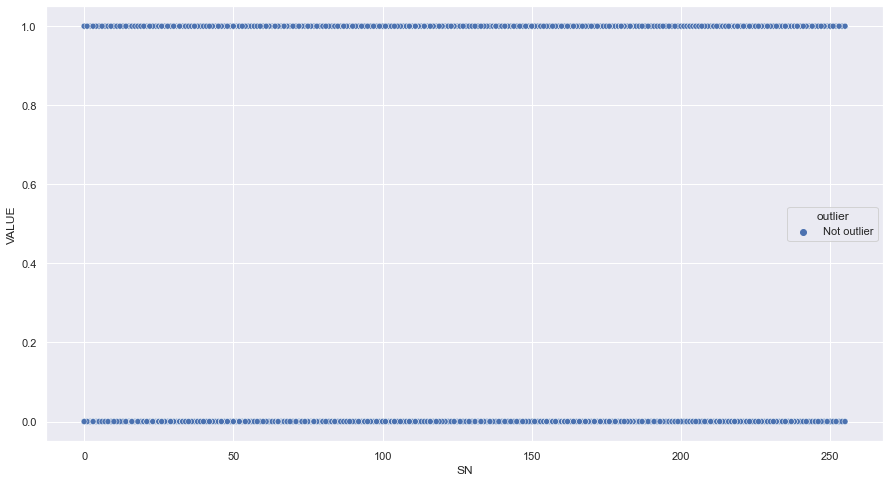

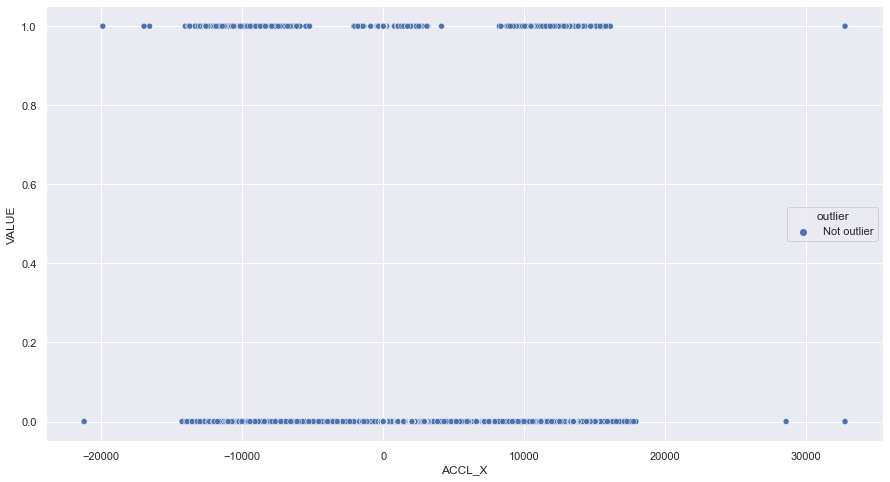

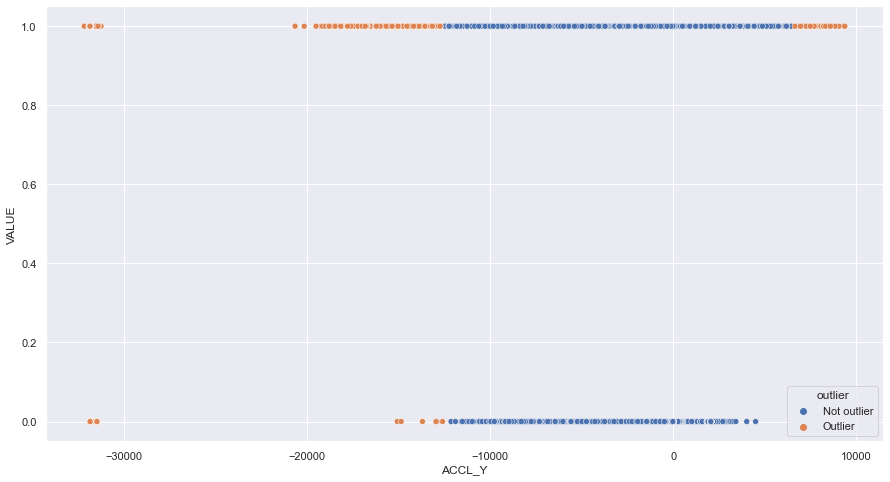

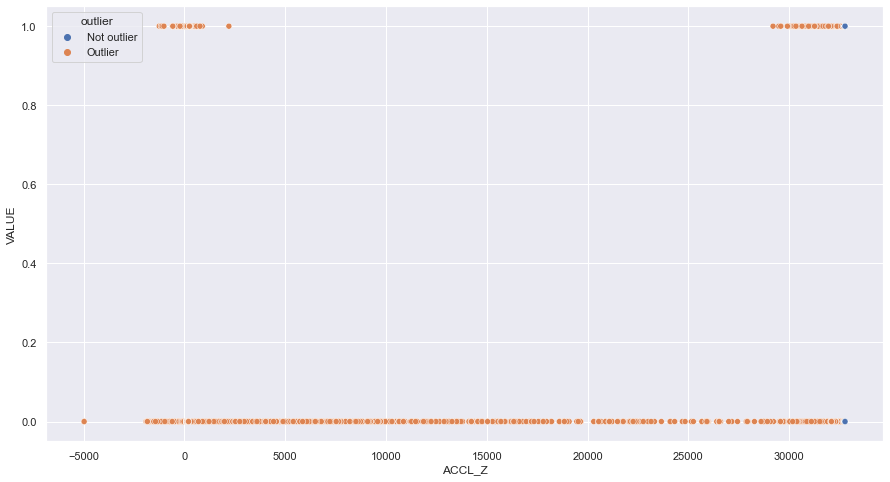

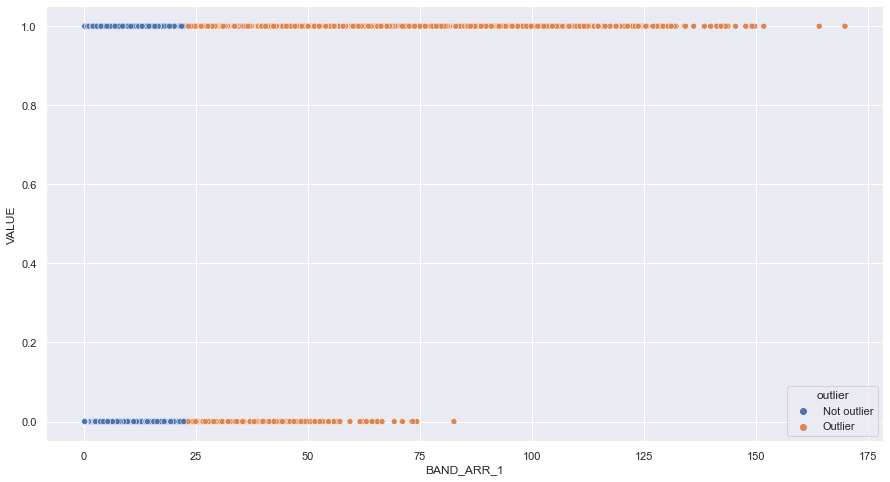

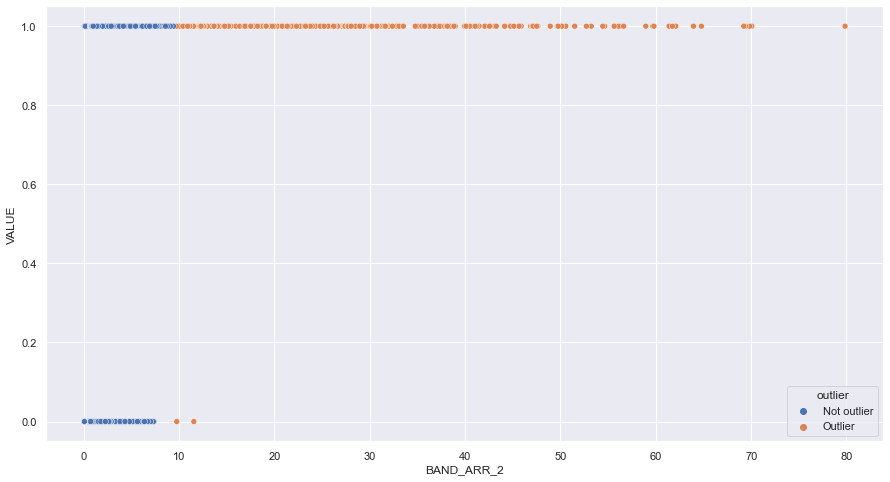

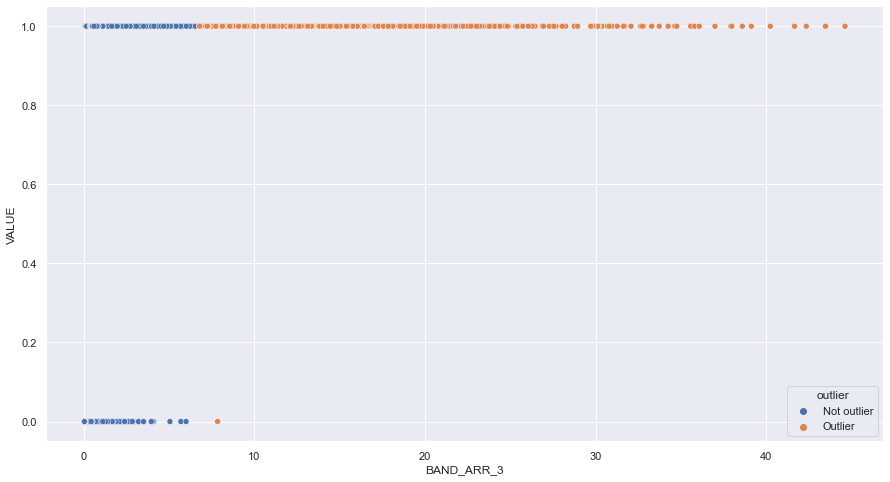

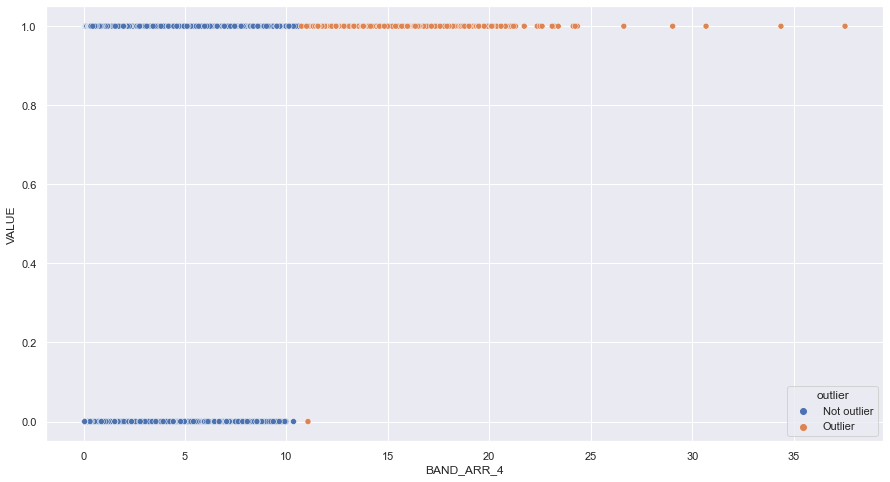

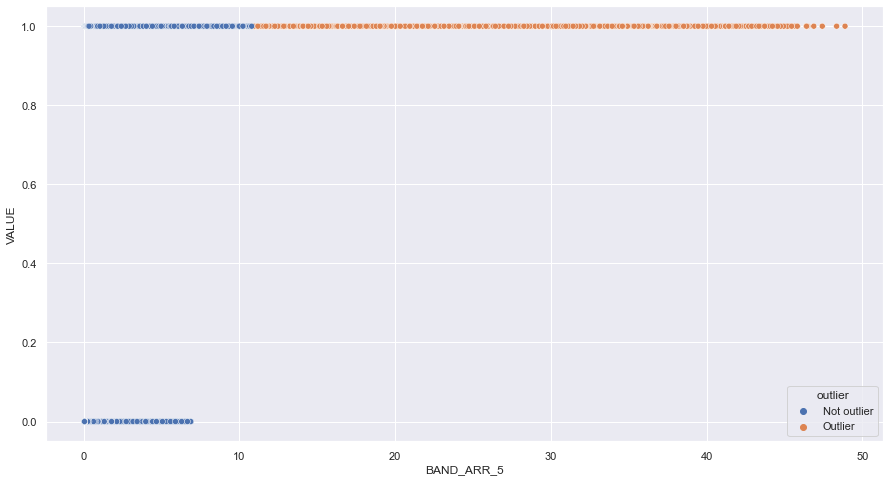

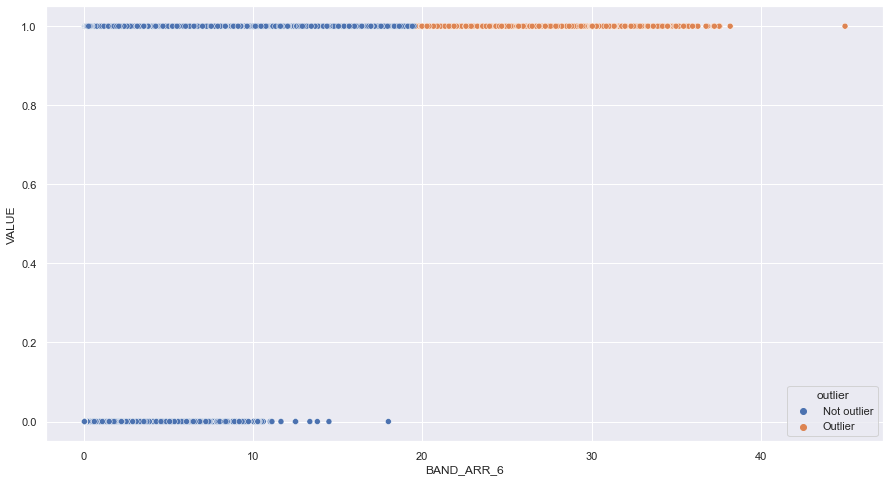

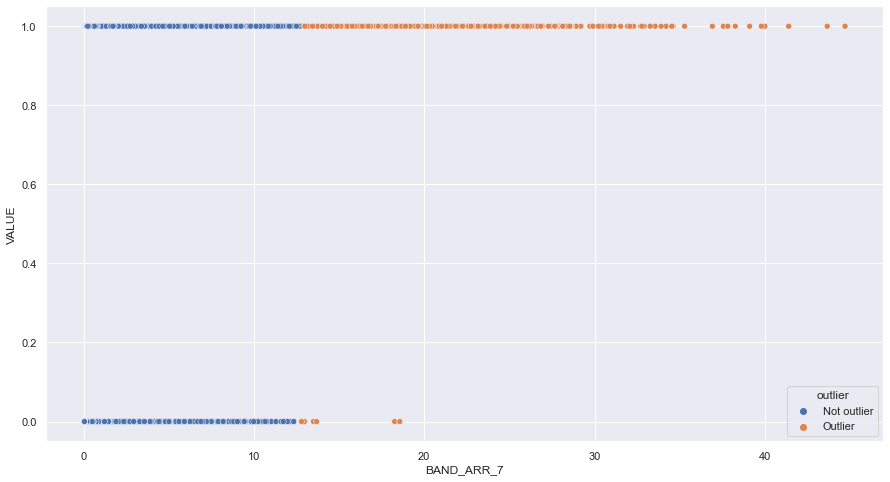

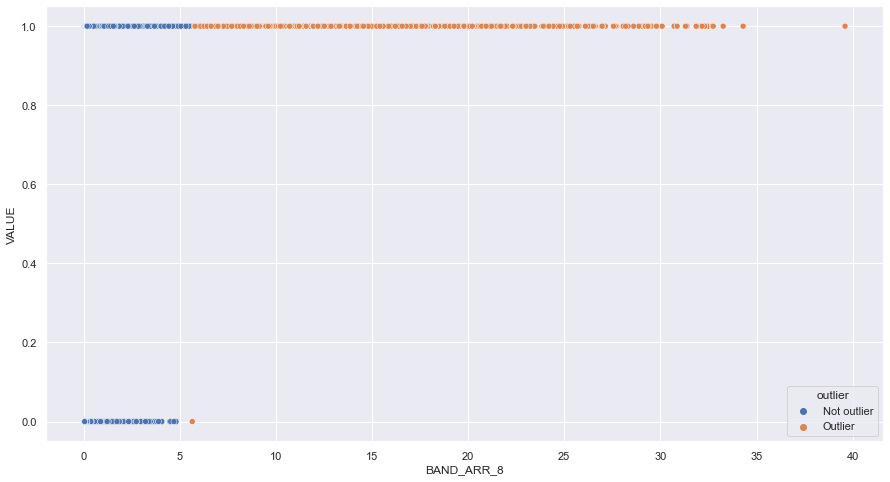

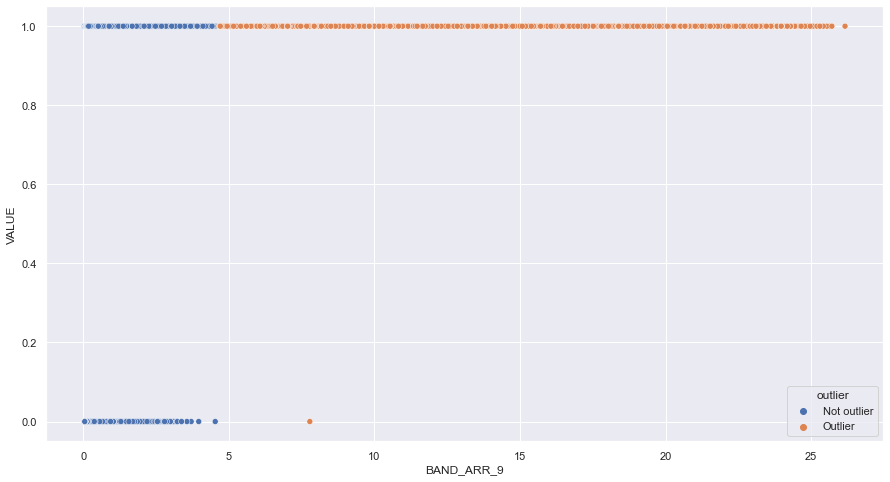

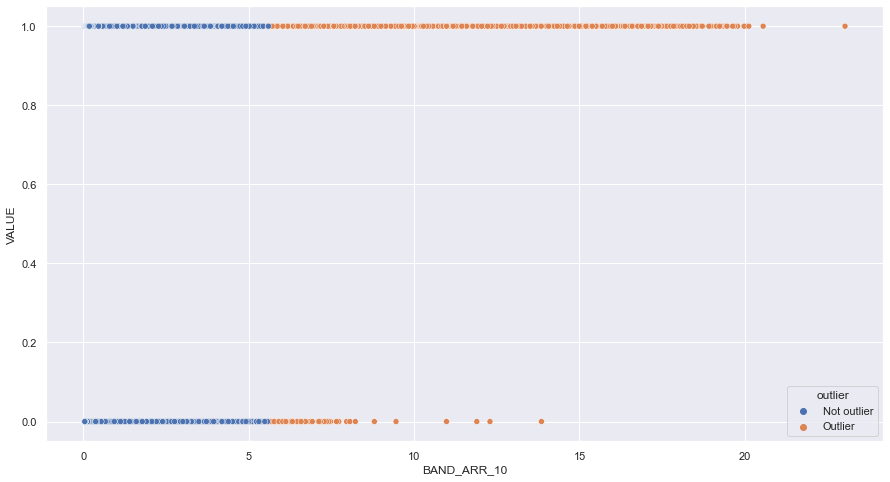

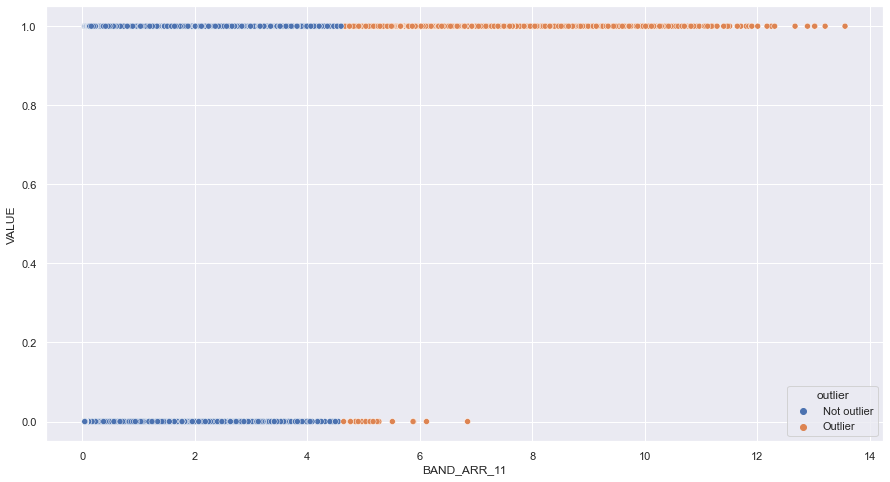

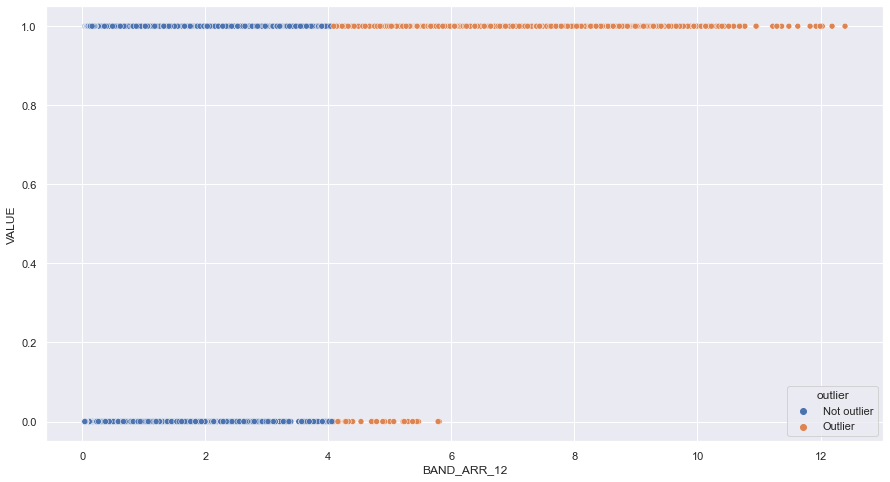

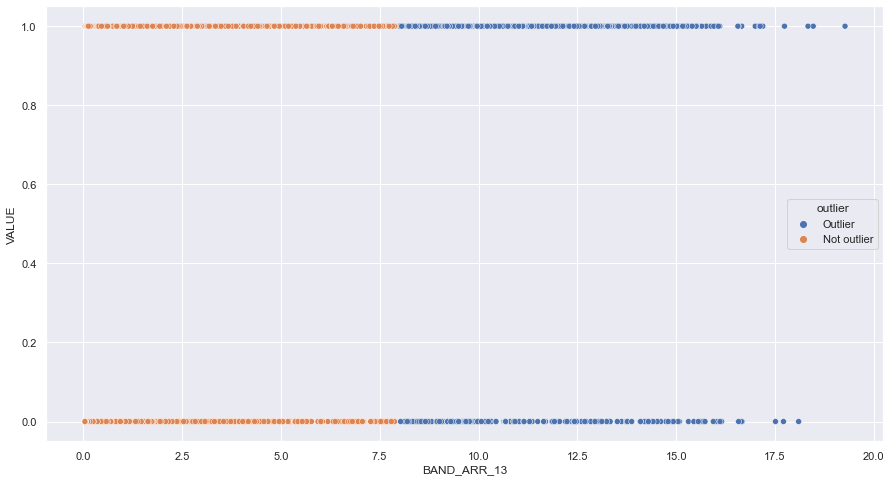

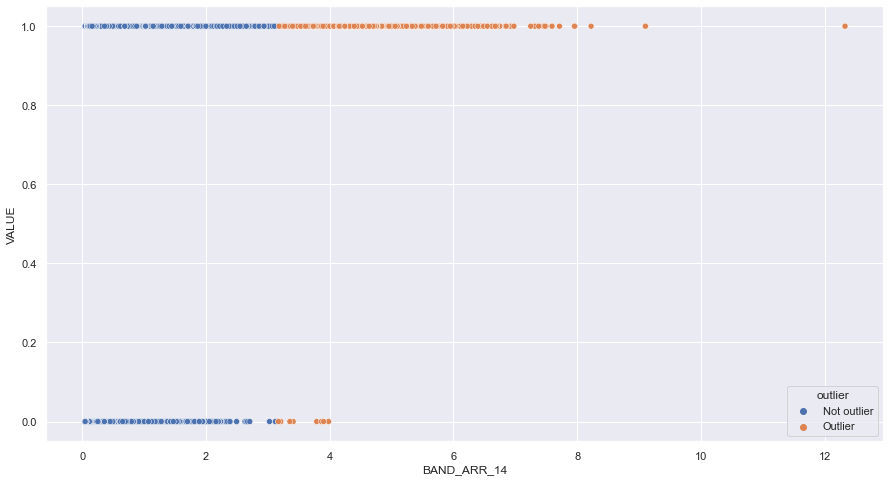

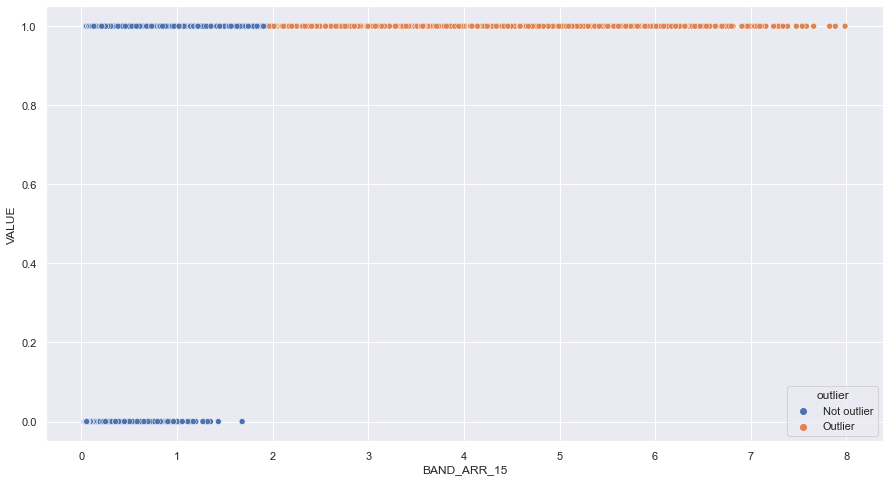

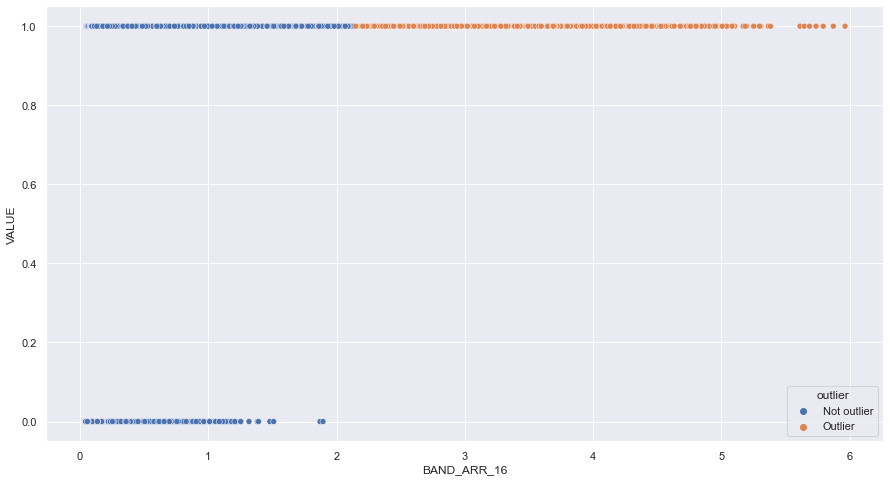

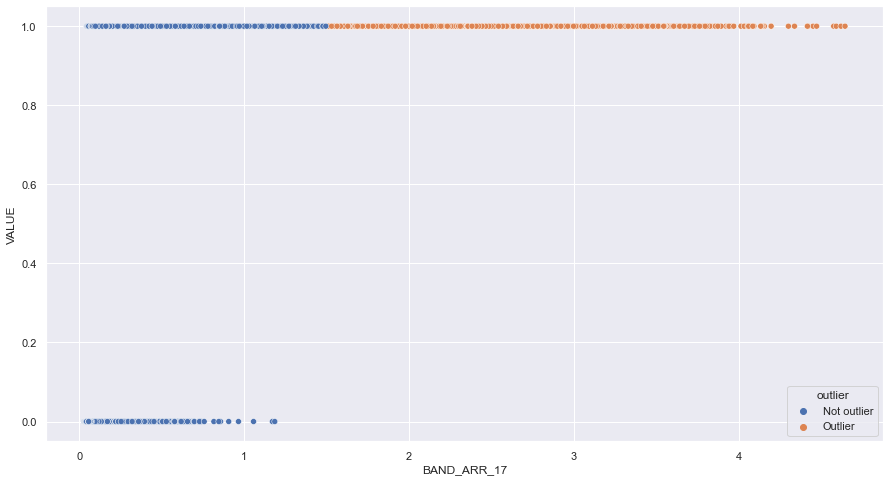

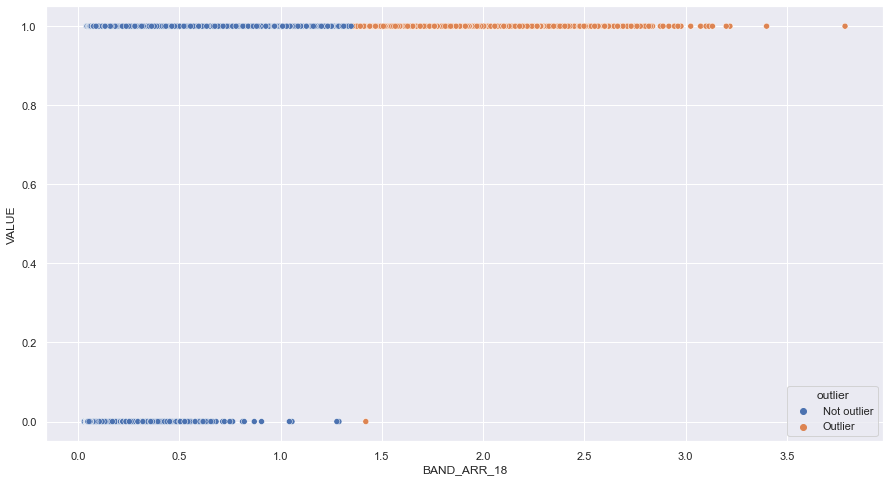

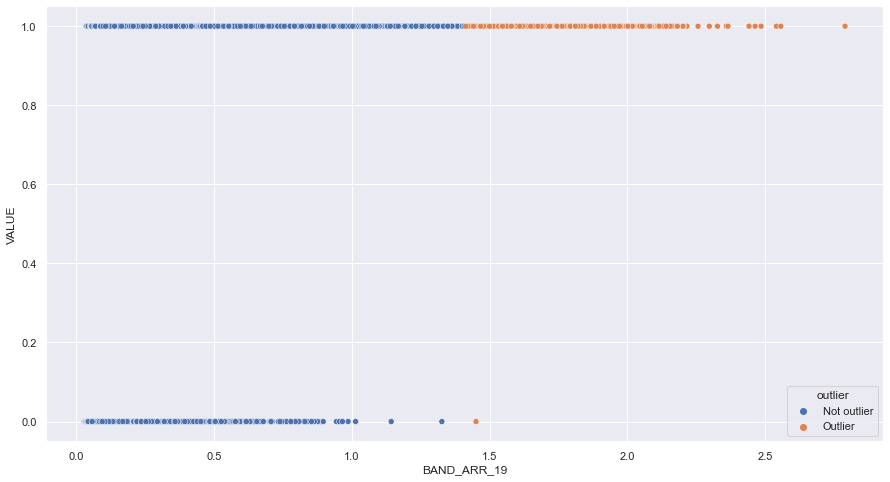

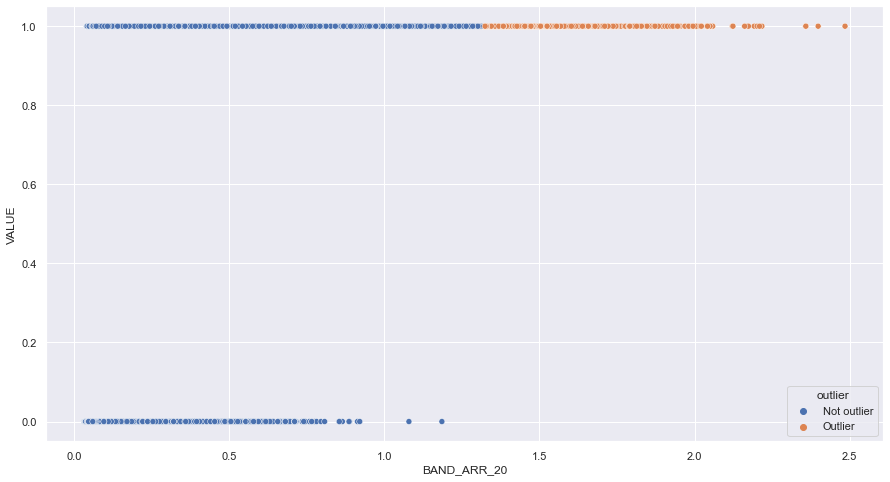

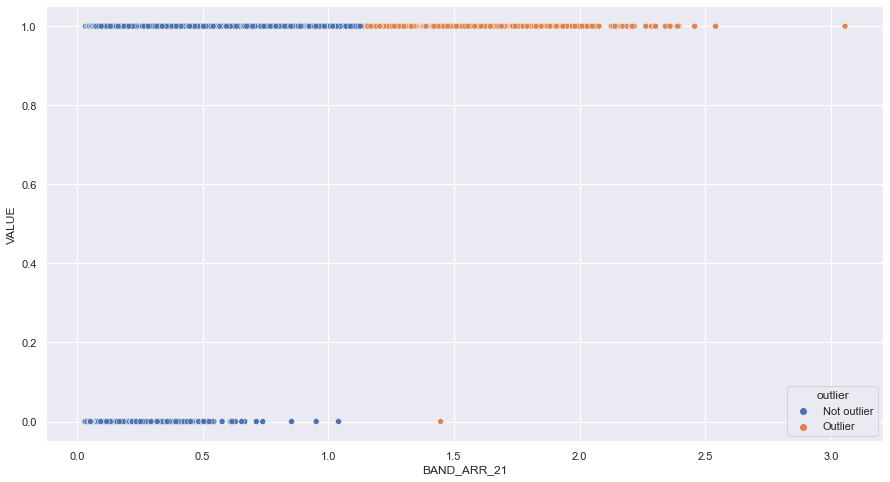

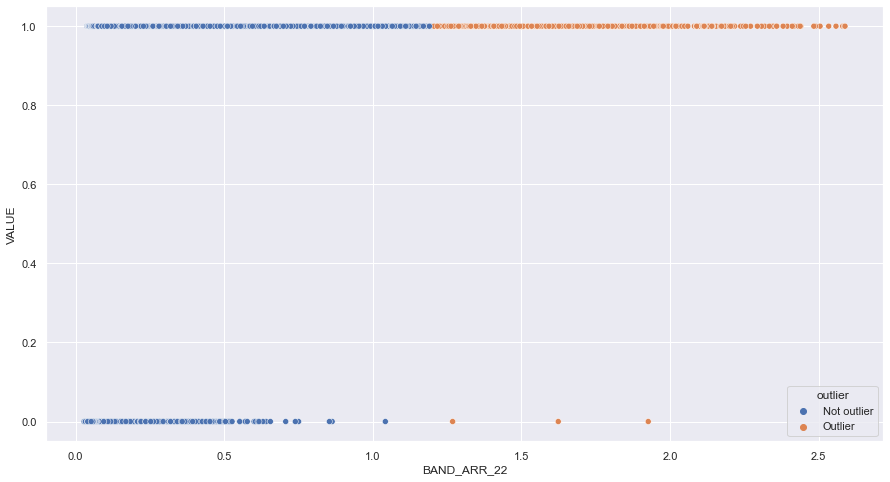

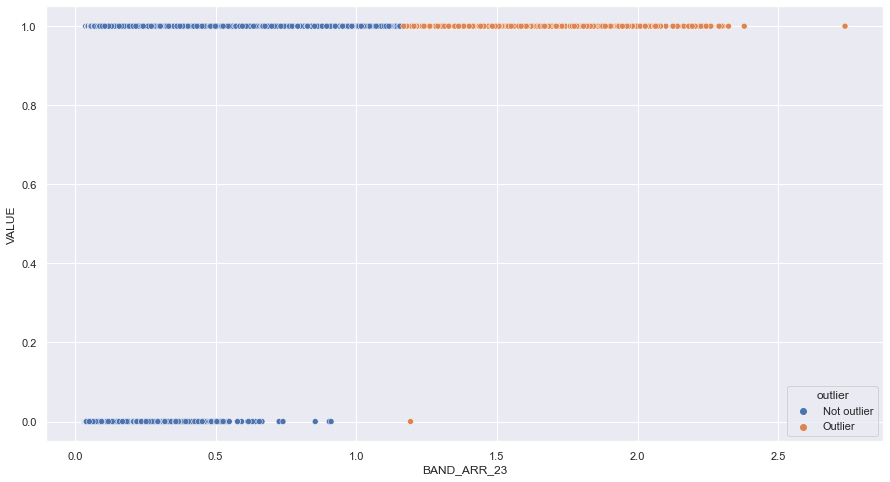

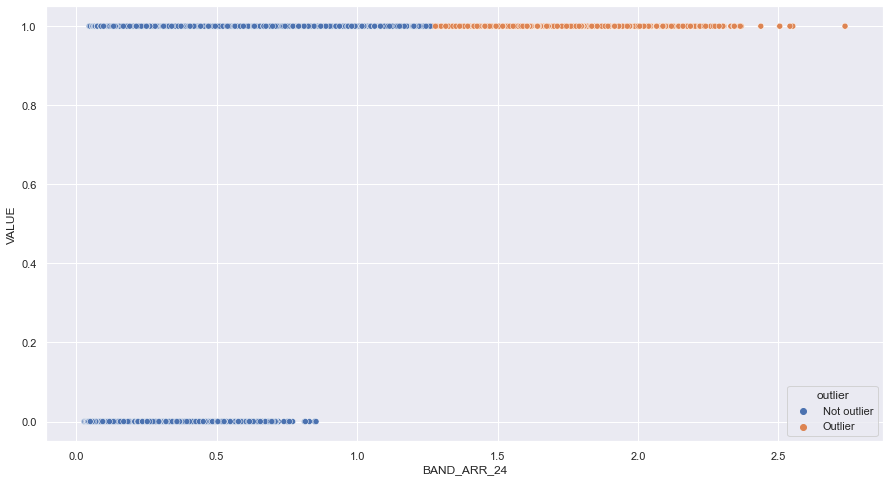

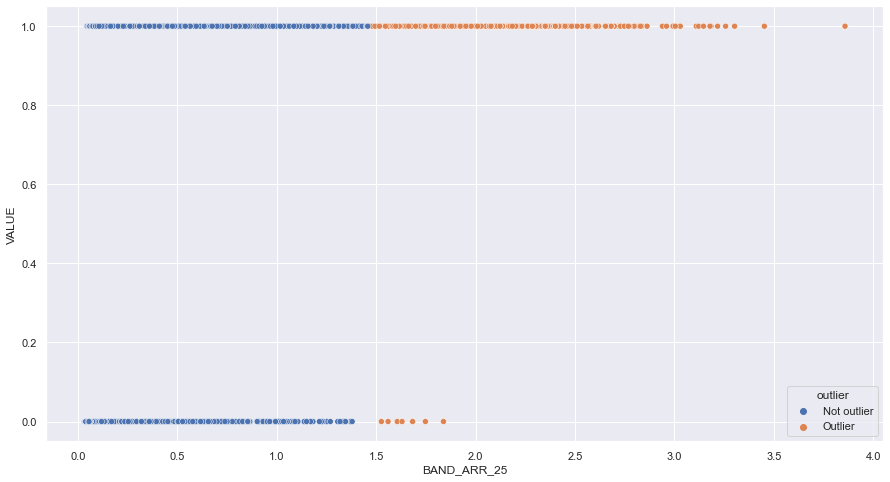

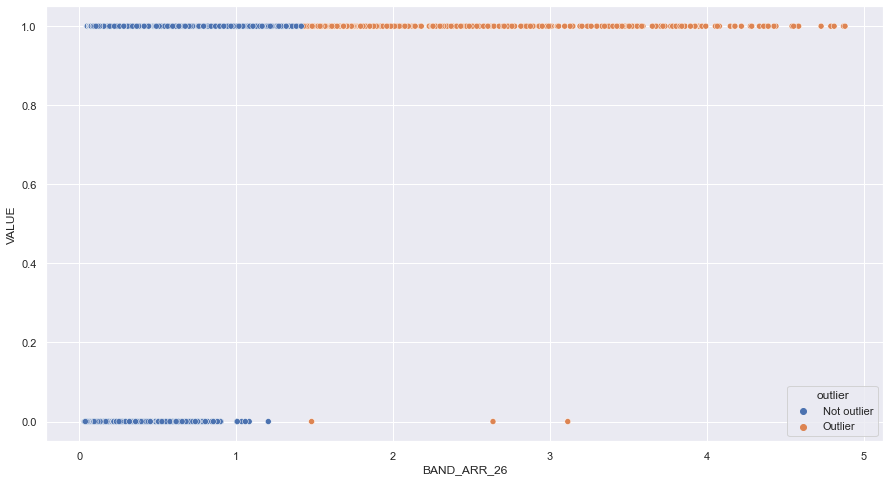

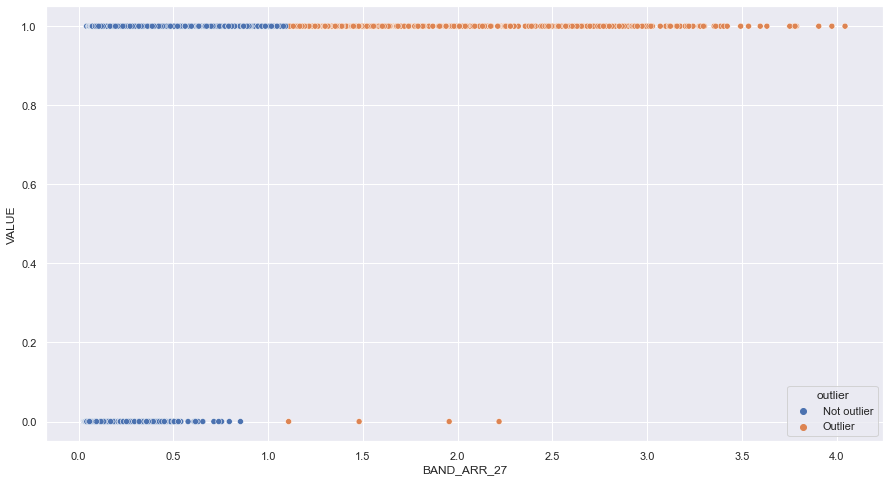

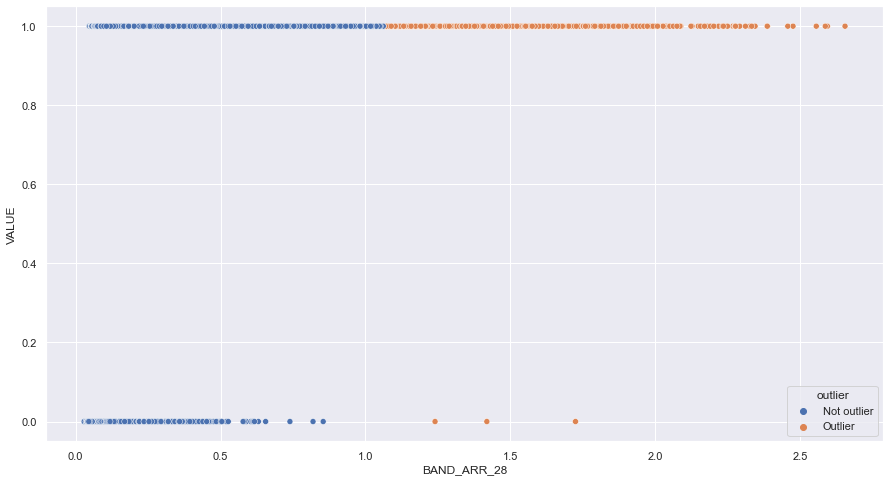

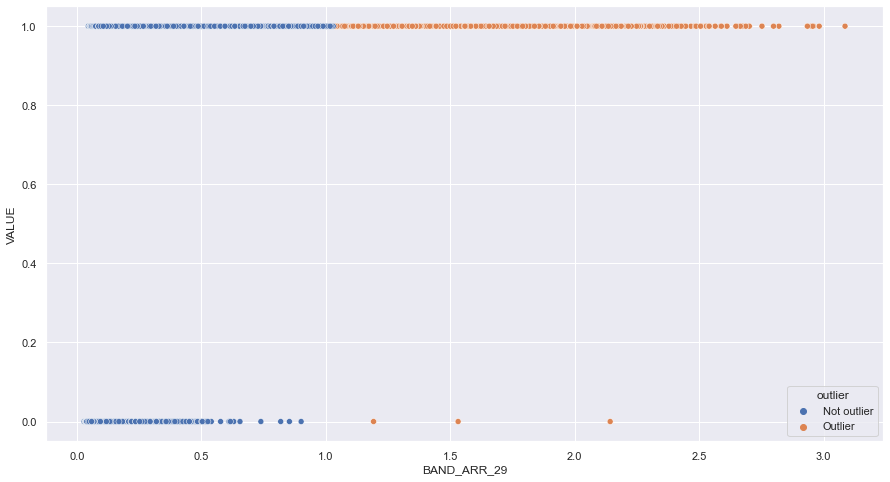

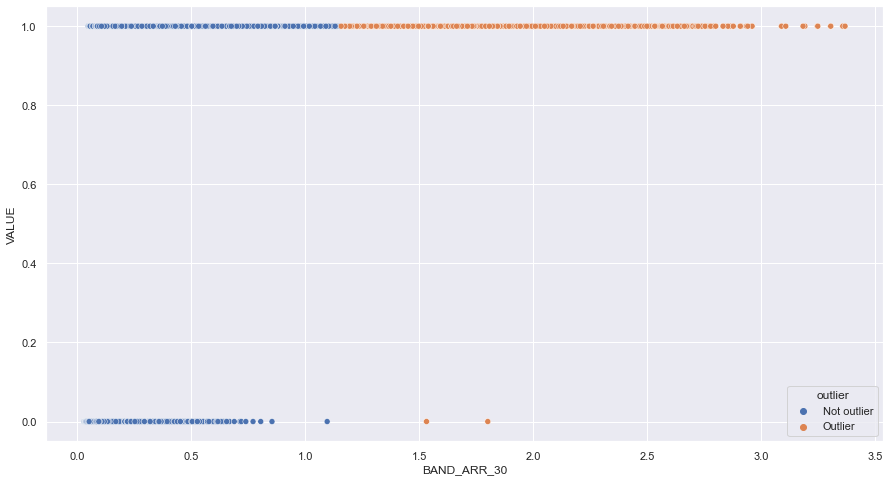

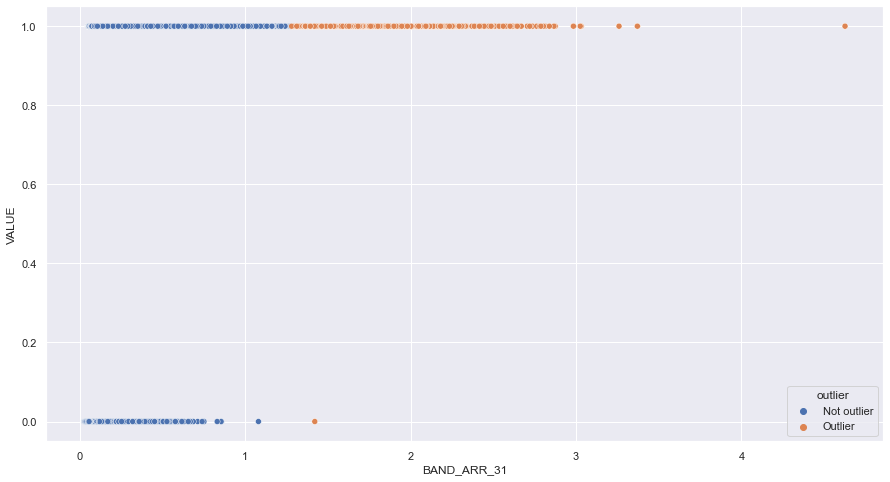

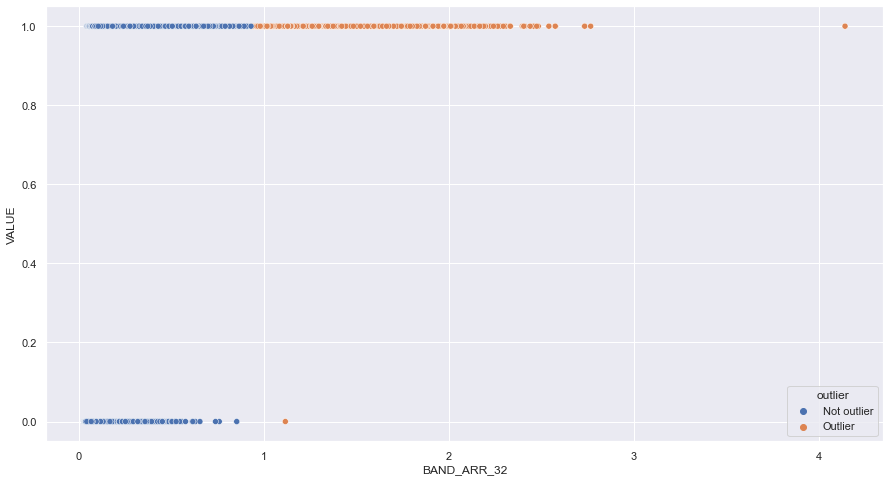

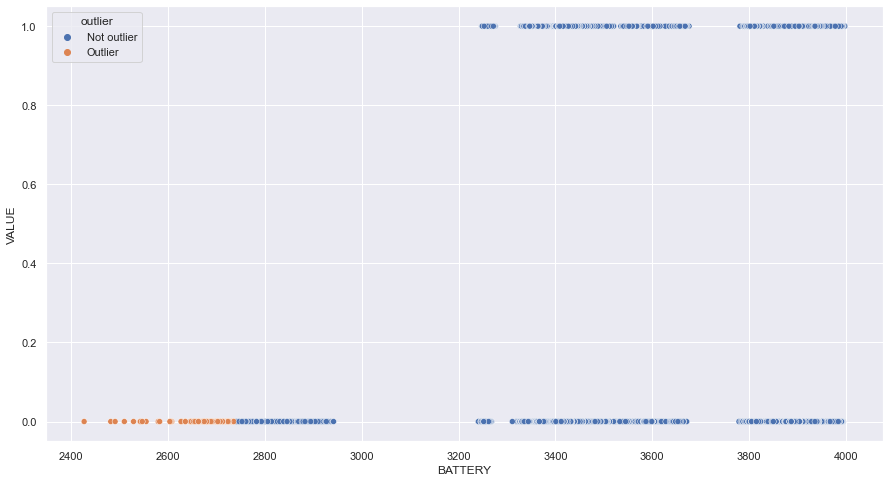

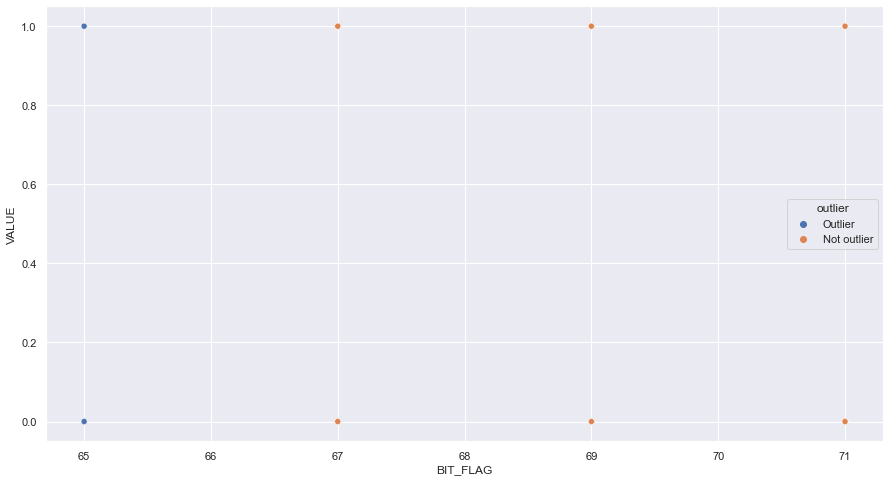

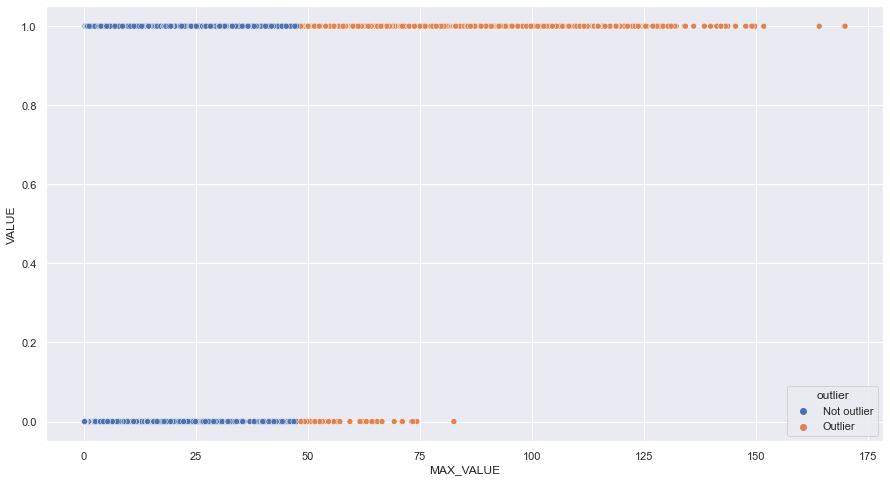

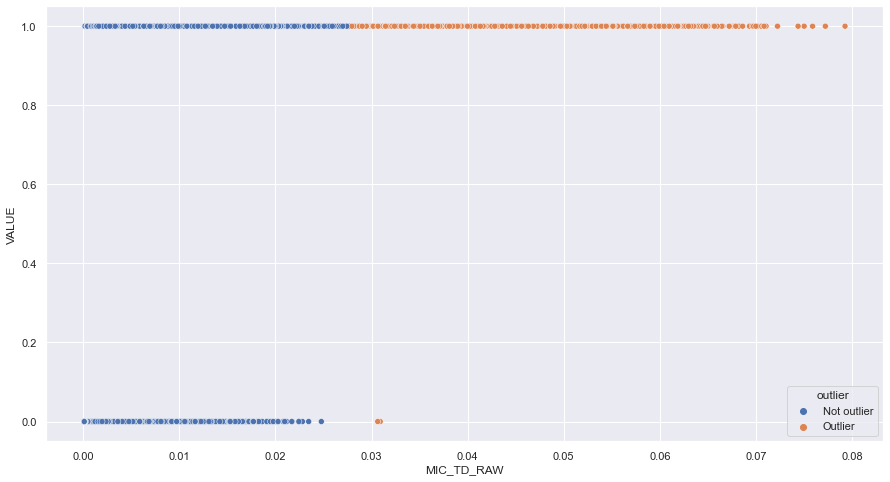

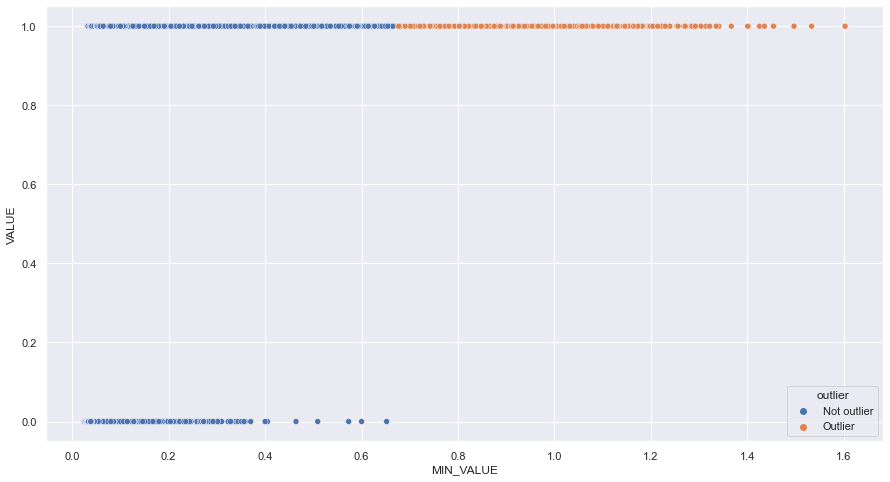

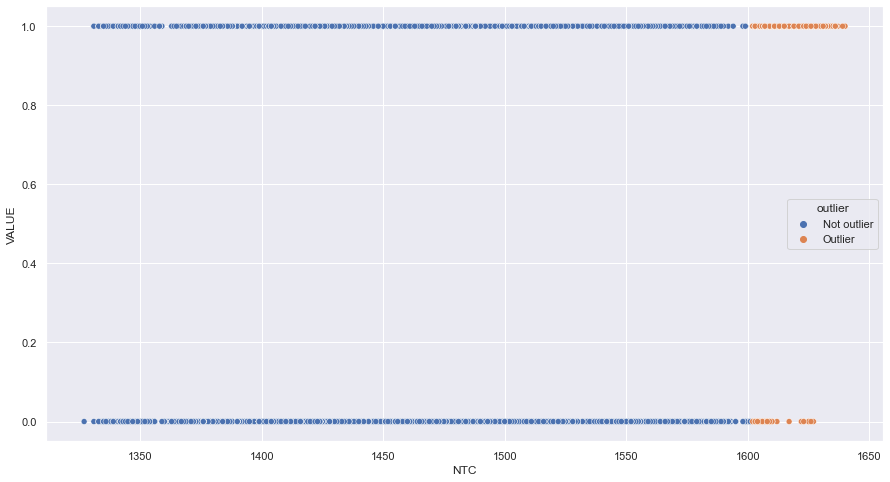

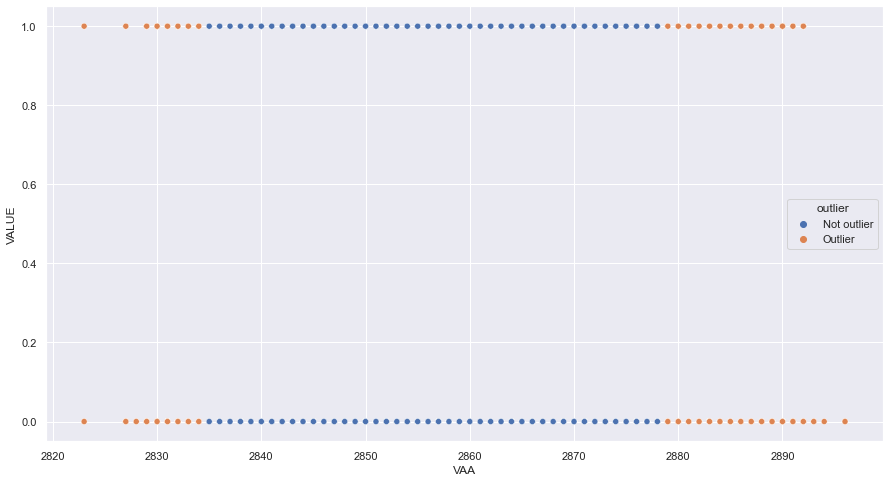

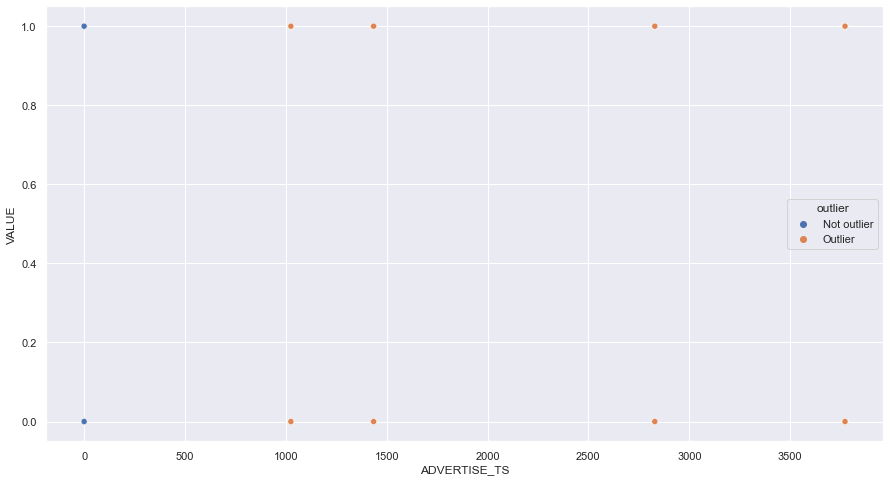

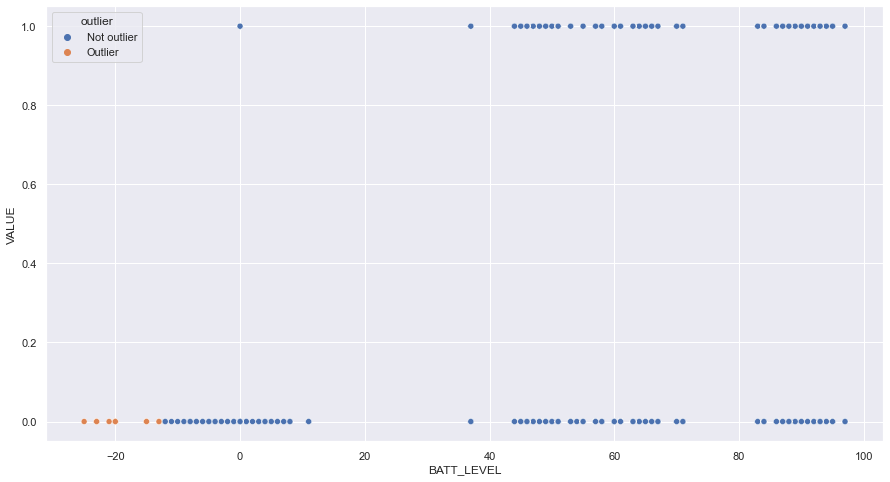

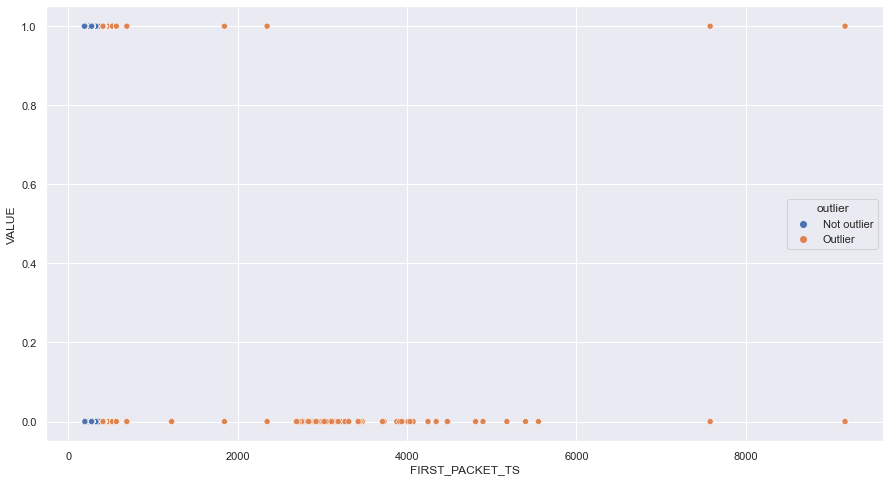

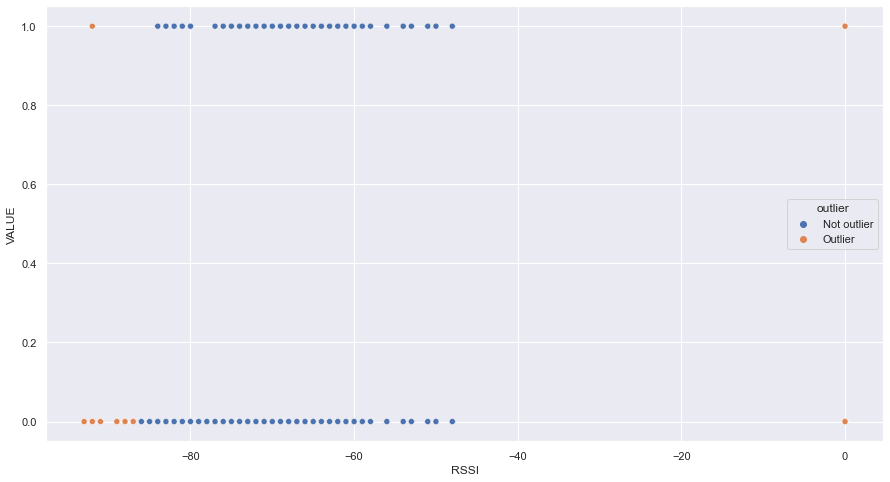

In [59]:
for i in numeric_df:
    if i != 'VALUE':
        fig, axes = plt.subplots(figsize=(15,8))
        Q1 = np.nanpercentile(ff[i], 25)
        Q3 = np.nanpercentile(ff[i], 75)
        IQR = Q3 - Q1
        ff["outlier"] = ff[i].apply(lambda x: "Outlier" if ((x < Q1 - 1.5 * IQR) | (x > Q3 + 1.5 * IQR)) else "Not outlier")
        sns.scatterplot(x = i, y = 'VALUE', hue = 'outlier', ax=axes, data = ff)
        print('\n\n\n')
        plt.show()
ff.drop('outlier', axis=1, inplace=True)

We have seen a complex behavior of outliers: variables in which there are almost no outliers compared to variables with many outliers, variables in which the outliers affect the distribution and variables that do not, variables in which the outliers affect the target variable and variables that do not.

Either way - we have no basis for assuming that the outliers
are a mistake, which are not organic to the data. Because of this, and since a significant part of the task is actually to prepare for extreme situations, the decision is not to delete values, from any of the variables.

# Reloading the data, with less columns, and check it

Given that along the way so far, there have been a number of manipulations on the data, I decided to reload the data. On that occasion I removed from the query irrelevant columns: either their labeling was retrospective, or they include only / mostly missing values, or they have only one unique value. After loading the data I checked it, to make sure that the condition of the missing values was correct.

In [1]:
df = "select Value, labels.SESSION_INFO_ID, labels.INTERVAL_IN_FILE, SN, ACCL_X, ACCL_Y, ACCL_Z, BAND_ARR_1, BAND_ARR_2, BAND_ARR_3, BAND_ARR_4, BAND_ARR_5, BAND_ARR_6, BAND_ARR_7, BAND_ARR_8, BAND_ARR_9, BAND_ARR_10, BAND_ARR_11, BAND_ARR_12, BAND_ARR_13, BAND_ARR_14, BAND_ARR_15, BAND_ARR_16, BAND_ARR_17, BAND_ARR_18, BAND_ARR_19, BAND_ARR_20, BAND_ARR_21, BAND_ARR_22, BAND_ARR_23, BAND_ARR_24, BAND_ARR_25, BAND_ARR_26, BAND_ARR_27, BAND_ARR_28, BAND_ARR_29, BAND_ARR_30, BAND_ARR_31, BAND_ARR_32, BATTERY, BIT_FLAG, MAX_VALUE, MIC_TD_RAW, MIN_VALUE, NTC, VAA, ADVERTISE_TS, BATT_LEVEL, DATE, FIRST_PACKET_TS, GW_MAC, GW_NAME, OPERATION_VALID, RSSI, TOOL_MAC, TOOL_NAME, SESSION_INFO.CREATED_AT as s_i_created_at from labels inner  join SESSION_DATA on labels.SESSION_INFO_ID = SESSION_DATA.SESSION_INFO_ID and labels.INTERVAL_IN_FILE = SESSION_DATA.INTERVAL_IN_FILE inner join SESSION_INFO on labels.SESSION_INFO_ID = SESSION_INFO._ID" 



cs.execute(df)
df = cs.fetch_pandas_all()
df.head()


NameError: name 'cs' is not defined

In [61]:
df.isnull().sum()


VALUE               0
SESSION_INFO_ID     0
INTERVAL_IN_FILE    0
SN                  0
ACCL_X              0
ACCL_Y              0
ACCL_Z              0
BAND_ARR_1          0
BAND_ARR_2          0
BAND_ARR_3          0
BAND_ARR_4          0
BAND_ARR_5          0
BAND_ARR_6          0
BAND_ARR_7          0
BAND_ARR_8          0
BAND_ARR_9          0
BAND_ARR_10         0
BAND_ARR_11         0
BAND_ARR_12         0
BAND_ARR_13         0
BAND_ARR_14         0
BAND_ARR_15         0
BAND_ARR_16         0
BAND_ARR_17         0
BAND_ARR_18         0
BAND_ARR_19         0
BAND_ARR_20         0
BAND_ARR_21         0
BAND_ARR_22         0
BAND_ARR_23         0
BAND_ARR_24         0
BAND_ARR_25         0
BAND_ARR_26         0
BAND_ARR_27         0
BAND_ARR_28         0
BAND_ARR_29         0
BAND_ARR_30         0
BAND_ARR_31         0
BAND_ARR_32         0
BATTERY             0
BIT_FLAG            0
MAX_VALUE           0
MIC_TD_RAW          0
MIN_VALUE           0
NTC                 0
VAA       

In [62]:
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)


Count of zeros in column  VALUE  is :  75289
Count of zeros in column  SESSION_INFO_ID  is :  0
Count of zeros in column  INTERVAL_IN_FILE  is :  281
Count of zeros in column  SN  is :  341
Count of zeros in column  ACCL_X  is :  26
Count of zeros in column  ACCL_Y  is :  20
Count of zeros in column  ACCL_Z  is :  2
Count of zeros in column  BAND_ARR_1  is :  0
Count of zeros in column  BAND_ARR_2  is :  0
Count of zeros in column  BAND_ARR_3  is :  0
Count of zeros in column  BAND_ARR_4  is :  0
Count of zeros in column  BAND_ARR_5  is :  0
Count of zeros in column  BAND_ARR_6  is :  0
Count of zeros in column  BAND_ARR_7  is :  0
Count of zeros in column  BAND_ARR_8  is :  0
Count of zeros in column  BAND_ARR_9  is :  0
Count of zeros in column  BAND_ARR_10  is :  0
Count of zeros in column  BAND_ARR_11  is :  0
Count of zeros in column  BAND_ARR_12  is :  0
Count of zeros in column  BAND_ARR_13  is :  0
Count of zeros in column  BAND_ARR_14  is :  0
Count of zeros in column  BAND_AR

# Checking Feature Importance

Running the "feature importance" method produces an image in which there is seemingly one variable that is particularly important, a few variables that are of little importance, and many variables that are not important at all. This connects to the issue of the multiplicity of high correlations in data. However, this knowledge at the moment will not lead to decisions being made, which will be taken later after further testing.

In [63]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier


In [64]:
X = df.loc[:, df.columns != 'VALUE']
y = df['VALUE']

In [66]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data.loc[:, 'SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
    data.loc[:, 'S_I_CREATED_AT'] = number.fit_transform(data.S_I_CREATED_AT)
    data.loc[:, 'DATE'] = number.fit_transform(data.DATE)
    data.loc[:, 'GW_MAC'] = number.fit_transform(data.GW_MAC)
    data.loc[:, 'GW_NAME'] = number.fit_transform(data.GW_NAME)
    data.loc[:, 'TOOL_MAC'] = number.fit_transform(data.TOOL_MAC)
    data.loc[:, 'TOOL_NAME'] = number.fit_transform(data.TOOL_NAME)       
    return data

X=convert(X)



C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/749175149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/749175149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S_I_CREATED_AT'] = number.fit_transform(data.S_I_CREATED_AT)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/749175149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [67]:
model = DecisionTreeClassifier()
model.fit(X, y)
importance = model.feature_importances_


In [68]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00767
Feature: 2, Score: 0.00115
Feature: 3, Score: 0.00098
Feature: 4, Score: 0.00138
Feature: 5, Score: 0.00019
Feature: 6, Score: 0.00636
Feature: 7, Score: 0.70206
Feature: 8, Score: 0.06212
Feature: 9, Score: 0.00102
Feature: 10, Score: 0.00243
Feature: 11, Score: 0.01844
Feature: 12, Score: 0.03108
Feature: 13, Score: 0.01490
Feature: 14, Score: 0.00052
Feature: 15, Score: 0.00042
Feature: 16, Score: 0.00139
Feature: 17, Score: 0.00119
Feature: 18, Score: 0.00213
Feature: 19, Score: 0.00250
Feature: 20, Score: 0.00758
Feature: 21, Score: 0.00136
Feature: 22, Score: 0.00174
Feature: 23, Score: 0.00233
Feature: 24, Score: 0.00032
Feature: 25, Score: 0.00093
Feature: 26, Score: 0.00048
Feature: 27, Score: 0.00056
Feature: 28, Score: 0.00039
Feature: 29, Score: 0.00029
Feature: 30, Score: 0.00057
Feature: 31, Score: 0.00036
Feature: 32, Score: 0.00039
Feature: 33, Score: 0.00367
Feature: 34, Score: 0.00044
Feature: 35, Score: 0.00137
Fe

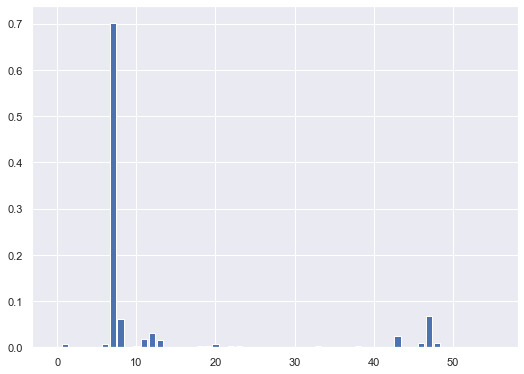

In [69]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

plt.bar([x for x in range(len(importance))], importance)
plt.show()


<AxesSubplot:>

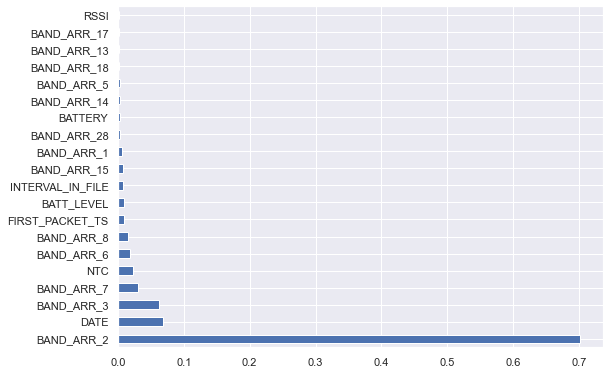

In [70]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')


# Feature Engineering - Adding Features

At this point I created more features to enrich the data. I went in 2 directions: a division of the machine creation date, and the relationships between the variables associated with frequency.

In [71]:
df['session_info_month'] = df['S_I_CREATED_AT'].dt.month
df['session_info_day'] = df['S_I_CREATED_AT'].dt.day
df['session_info_hour'] = df['S_I_CREATED_AT'].dt.hour


In [72]:
df['max min range'] = df['MAX_VALUE'] - df['MIN_VALUE']

In [73]:
df['max min ratio'] = df['MAX_VALUE'] / df['MIN_VALUE']

In [74]:
df['band mean'] = (df['BAND_ARR_1'] + df['BAND_ARR_2'] + df['BAND_ARR_3'] + df['BAND_ARR_4'] +df['BAND_ARR_5'] + df['BAND_ARR_6'] +
                   df['BAND_ARR_7'] + df['BAND_ARR_8'] +df['BAND_ARR_9'] + df['BAND_ARR_10'] +df['BAND_ARR_11'] + df['BAND_ARR_12'] +
                   df['BAND_ARR_13'] + df['BAND_ARR_14'] +df['BAND_ARR_15'] + df['BAND_ARR_16'] +df['BAND_ARR_17'] + df['BAND_ARR_18'] +
                   df['BAND_ARR_19'] + df['BAND_ARR_20'] +df['BAND_ARR_21'] + df['BAND_ARR_22'] +df['BAND_ARR_23'] + df['BAND_ARR_24'] +
                   df['BAND_ARR_25'] + df['BAND_ARR_26'] +df['BAND_ARR_27'] + df['BAND_ARR_28'] +df['BAND_ARR_29'] + df['BAND_ARR_30'] +
                   df['BAND_ARR_31'] + df['BAND_ARR_32'] )/32

In [75]:
df.head()

VALUE                   SESSION_INFO_ID  INTERVAL_IN_FILE  SN  ACCL_X  \
0    0.0  ce9b7631df5846eeb7dbc1bc3271dc6a                 1   4   32767   
1    0.0  ce9b7631df5846eeb7dbc1bc3271dc6a                 9  12   32767   
2    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                27  30   32767   
3    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                53  56   32767   
4    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                62  65   32767   

   ACCL_Y  ACCL_Z  BAND_ARR_1  BAND_ARR_2  BAND_ARR_3  BAND_ARR_4  BAND_ARR_5  \
0   -3380   32767    3.991567    1.312966    1.209943    3.510792    2.308856   
1   -3779   32767    3.244165    1.254104    0.638133    1.269899    1.617370   
2  -10672   32767    8.473649    7.602677    7.167191    7.384933    9.780108   
3   -6305   32767   10.500007    4.848277    6.851422    9.212271   18.798750   
4     234   32767   10.810238    6.514476    6.430245   10.557547   16.453691   

   BAND_ARR_6  BAND_ARR_7  BAND_ARR_8  BAND_ARR_9  BAND_ARR_10  BAND_ARR_11  \
0    5.056139    4.025907    1.072579    1.244284     3.476451     2.343197   
1    4.112843    1.175134    0.559163    1.190928     0.859251     0.969810   
2   28.506021   16.203531    6.840576   11.848669    11.739797     5.207502   
3   17.582554    7.638371   11.215416   18.083342    14.434755     4.776736   
4   12.326389    6.430245   12.663312   22.097143    11.568314     5.166785   

   BAND_ARR_12  BAND_ARR_13  BAND_ARR_14  BAND_ARR_15  BAND_ARR_16  \
0     1.896764     8.936675     1.931105     0.523122     0.317076   
1     0.938222     2.549223     0.527574     0.148515     0.101133   
2     7.058319     7.711548     2.159097     1.505868     2.376841   
3     4.919818     8.997648     3.846705     1.915101     1.843560   
4     6.093322    10.641777     3.482173     1.713329     1.966021   

   BAND_ARR_17  BAND_ARR_18  BAND_ARR_19  BAND_ARR_20  BAND_ARR_21  \
0     0.214053     0.214053     0.214053     0.385758     0.214053   
1     0.085339     0.101133     0.101133     0.132721     0.085339   
2     1.832483     1.396996     1.505868     1.505868     0.961510   
3     1.700478     1.199692     1.128151     1.128151     0.770447   
4     1.376407     1.460637     1.039484     1.207945     0.786792   

   BAND_ARR_22  BAND_ARR_23  BAND_ARR_24  BAND_ARR_25  BAND_ARR_26  \
0     0.179712     0.248394     0.214053     0.488781     0.317076   
1     0.085339     0.101133     0.116927     0.322251     0.180103   
2     1.070382     0.961510     0.961510     0.852638     0.961510   
3     0.770447     0.555824     0.555824     0.627365     0.985069   
4     0.618331     0.702562     0.618331     1.039484     1.039484   

   BAND_ARR_27  BAND_ARR_28  BAND_ARR_29  BAND_ARR_30  BAND_ARR_31  \
0     0.179712     0.179712     0.179712     0.282735     0.317076   
1     0.101133     0.116927     0.116927     0.195898     0.180103   
2     0.743767     0.852638     0.743767     0.743767     0.961510   
3     0.698906     0.555824     0.555824     0.841987     1.128151   
4     0.618331     0.618331     0.618331     0.955253     1.376407   

   BAND_ARR_32  BATTERY  BIT_FLAG  MAX_VALUE  MIC_TD_RAW  MIN_VALUE   NTC  \
0     0.179712     3389        65   8.936675    0.004337   0.145371  1444   
1     0.148515     3391        65   4.112843    0.002212   0.069545  1446   
2     0.852638     3395        67  28.506021    0.015292   0.634895  1446   
3     0.627365     3394        69  18.798750    0.015376   0.484283  1447   
4     0.618331     3408        69  22.097143    0.014505   0.534100  1446   

    VAA  ADVERTISE_TS  BATT_LEVEL                DATE  FIRST_PACKET_TS  \
0  2859             0          49 2022-03-06 17:22:18              239   
1  2864             0          49 2022-03-06 17:22:18              239   
2  2847             0          49 2022-03-06 17:22:18              239   
3  2866             0          49 2022-03-06 17:22:18              239   
4  2860             0          49 2022-03-06 17:22:18              

In [76]:
df.shape

(114271, 63)

# Feature Selection

The feature selection phase is based on running 4 different methods of feature selection and "voting" of those methods so that we know how many "votes" each feature gets.

In [77]:
varSel = pd.DataFrame({'Variable': df.columns[1:63]})
varSel

Variable
0      SESSION_INFO_ID
1     INTERVAL_IN_FILE
2                   SN
3               ACCL_X
4               ACCL_Y
5               ACCL_Z
6           BAND_ARR_1
7           BAND_ARR_2
8           BAND_ARR_3
9           BAND_ARR_4
10          BAND_ARR_5
11          BAND_ARR_6
12          BAND_ARR_7
13          BAND_ARR_8
14          BAND_ARR_9
15         BAND_ARR_10
16         BAND_ARR_11
17         BAND_ARR_12
18         BAND_ARR_13
19         BAND_ARR_14
20         BAND_ARR_15
21         BAND_ARR_16
22         BAND_ARR_17
23         BAND_ARR_18
24         BAND_ARR_19
25         BAND_ARR_20
26         BAND_ARR_21
27         BAND_ARR_22
28         BAND_ARR_23
29         BAND_ARR_24
30         BAND_ARR_25
31         BAND_ARR_26
32         BAND_ARR_27
33         BAND_ARR_28
34         BAND_ARR_29
35         BAND_ARR_30
36         BAND_ARR_31
37         BAND_ARR_32
38             BATTERY
39            BIT_FLAG
40           MAX_VALUE
41          MIC_TD_RAW
42           MIN_VALUE
43                 NTC
44                 VAA
45        ADVERTISE_TS
46          BATT_LEVEL
47                DATE
48     FIRST_PACKET_TS
49              GW_MAC
50             GW_NAME
51     OPERATION_VALID
52                RSSI
53            TOOL_MAC
54           TOOL_NAME
55      S_I_CREATED_AT
56  session_info_month
57    session_info_day
58   session_info_hour
59       max min range
60       max min ratio
61           band mean

In [78]:
X = df.loc[:, df.columns != 'VALUE']
y = df['VALUE']


X=convert(X)



C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/749175149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/749175149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S_I_CREATED_AT'] = number.fit_transform(data.S_I_CREATED_AT)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/749175149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [79]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lassomod = Lasso(alpha=0.01).fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2910.1696876098854, tolerance: 2.5683820024328394
  model = cd_fast.enet_coordinate_descent(


In [80]:
model = SelectFromModel(lassomod, prefit=True)
model.get_support()

array([ True, False,  True, False, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False])

In [81]:
varSel['Lasso'] = model.get_support().astype('int64')
varSel

Variable  Lasso
0      SESSION_INFO_ID      1
1     INTERVAL_IN_FILE      0
2                   SN      1
3               ACCL_X      0
4               ACCL_Y      0
5               ACCL_Z      0
6           BAND_ARR_1      1
7           BAND_ARR_2      1
8           BAND_ARR_3      0
9           BAND_ARR_4      1
10          BAND_ARR_5      0
11          BAND_ARR_6      1
12          BAND_ARR_7      1
13          BAND_ARR_8      1
14          BAND_ARR_9      1
15         BAND_ARR_10      1
16         BAND_ARR_11      1
17         BAND_ARR_12      0
18         BAND_ARR_13      1
19         BAND_ARR_14      0
20         BAND_ARR_15      0
21         BAND_ARR_16      0
22         BAND_ARR_17      0
23         BAND_ARR_18      0
24         BAND_ARR_19      0
25         BAND_ARR_20      0
26         BAND_ARR_21      0
27         BAND_ARR_22      0
28         BAND_ARR_23      0
29         BAND_ARR_24      0
30         BAND_ARR_25      0
31         BAND_ARR_26      0
32         BAND_ARR_27      0
33         BAND_ARR_28      0
34         BAND_ARR_29      0
35         BAND_ARR_30      0
36         BAND_ARR_31      0
37         BAND_ARR_32      0
38             BATTERY      1
39            BIT_FLAG      1
40           MAX_VALUE      1
41          MIC_TD_RAW      0
42           MIN_VALUE      0
43                 NTC      1
44                 VAA      1
45        ADVERTISE_TS      1
46          BATT_LEVEL      1
47                DATE      1
48     FIRST_PACKET_TS      0
49              GW_MAC      0
50             GW_NAME      0
51     OPERATION_VALID      0
52                RSSI      1
53            TOOL_MAC      1
54           TOOL_NAME      0
55      S_I_CREATED_AT      1
56  session_info_month      0
57    session_info_day      1
58   session_info_hour      1
59       max min range      0
60       max min ratio      1
61           band mean      0

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rfmod = RandomForestClassifier().fit(X, y)


In [83]:
model = SelectFromModel(rfmod, prefit=True)
model.get_support()

array([False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True])

In [84]:
varSel['RandomForest'] = model.get_support().astype('int64')
varSel

Variable  Lasso  RandomForest
0      SESSION_INFO_ID      1             0
1     INTERVAL_IN_FILE      0             0
2                   SN      1             0
3               ACCL_X      0             0
4               ACCL_Y      0             0
5               ACCL_Z      0             0
6           BAND_ARR_1      1             0
7           BAND_ARR_2      1             1
8           BAND_ARR_3      0             1
9           BAND_ARR_4      1             0
10          BAND_ARR_5      0             0
11          BAND_ARR_6      1             0
12          BAND_ARR_7      1             0
13          BAND_ARR_8      1             1
14          BAND_ARR_9      1             0
15         BAND_ARR_10      1             0
16         BAND_ARR_11      1             0
17         BAND_ARR_12      0             0
18         BAND_ARR_13      1             0
19         BAND_ARR_14      0             0
20         BAND_ARR_15      0             1
21         BAND_ARR_16      0             1
22         BAND_ARR_17      0             1
23         BAND_ARR_18      0             1
24         BAND_ARR_19      0             1
25         BAND_ARR_20      0             1
26         BAND_ARR_21      0             1
27         BAND_ARR_22      0             0
28         BAND_ARR_23      0             1
29         BAND_ARR_24      0             0
30         BAND_ARR_25      0             0
31         BAND_ARR_26      0             0
32         BAND_ARR_27      0             1
33         BAND_ARR_28      0             1
34         BAND_ARR_29      0             0
35         BAND_ARR_30      0             1
36         BAND_ARR_31      0             0
37         BAND_ARR_32      0             1
38             BATTERY      1             0
39            BIT_FLAG      1             0
40           MAX_VALUE      1             0
41          MIC_TD_RAW      0             0
42           MIN_VALUE      0             0
43                 NTC      1             1
44                 VAA      1             0
45        ADVERTISE_TS      1             0
46          BATT_LEVEL      1             0
47                DATE      1             1
48     FIRST_PACKET_TS      0             0
49              GW_MAC      0             0
50             GW_NAME      0             0
51     OPERATION_VALID      0             0
52                RSSI      1             0
53            TOOL_MAC      1             0
54           TOOL_NAME      0             0
55      S_I_CREATED_AT      1             0
56  session_info_month      0             0
57    session_info_day      1             0
58   session_info_hour      1             0
59       max min range      0             0
60       max min ratio      1             0
61           band mean      0             1

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

gbmod = GradientBoostingClassifier().fit(X, y)


In [86]:
model = SelectFromModel(gbmod, prefit=True)
model.get_support()

array([False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False])

In [87]:
varSel['GradientBoost'] = model.get_support().astype('int64')
varSel

Variable  Lasso  RandomForest  GradientBoost
0      SESSION_INFO_ID      1             0              0
1     INTERVAL_IN_FILE      0             0              0
2                   SN      1             0              0
3               ACCL_X      0             0              0
4               ACCL_Y      0             0              0
5               ACCL_Z      0             0              0
6           BAND_ARR_1      1             0              1
7           BAND_ARR_2      1             1              1
8           BAND_ARR_3      0             1              1
9           BAND_ARR_4      1             0              0
10          BAND_ARR_5      0             0              0
11          BAND_ARR_6      1             0              1
12          BAND_ARR_7      1             0              0
13          BAND_ARR_8      1             1              1
14          BAND_ARR_9      1             0              0
15         BAND_ARR_10      1             0              0
16         BAND_ARR_11      1             0              0
17         BAND_ARR_12      0             0              0
18         BAND_ARR_13      1             0              0
19         BAND_ARR_14      0             0              0
20         BAND_ARR_15      0             1              0
21         BAND_ARR_16      0             1              1
22         BAND_ARR_17      0             1              1
23         BAND_ARR_18      0             1              0
24         BAND_ARR_19      0             1              0
25         BAND_ARR_20      0             1              0
26         BAND_ARR_21      0             1              0
27         BAND_ARR_22      0             0              0
28         BAND_ARR_23      0             1              0
29         BAND_ARR_24      0             0              0
30         BAND_ARR_25      0             0              0
31         BAND_ARR_26      0             0              0
32         BAND_ARR_27      0             1              0
33         BAND_ARR_28      0             1              0
34         BAND_ARR_29      0             0              0
35         BAND_ARR_30      0             1              0
36         BAND_ARR_31      0             0              0
37         BAND_ARR_32      0             1              0
38             BATTERY      1             0              1
39            BIT_FLAG      1             0              0
40           MAX_VALUE      1             0              1
41          MIC_TD_RAW      0             0              0
42           MIN_VALUE      0             0              0
43                 NTC      1             1              1
44                 VAA      1             0              0
45        ADVERTISE_TS      1             0              0
46          BATT_LEVEL      1             0              0
47                DATE      1             1              1
48     FIRST_PACKET_TS      0             0              0
49              GW_MAC      0             0              0
50             GW_NAME      0             0              0
51     OPERATION_VALID      0             0              0
52                RSSI      1             0              0
53            TOOL_MAC      1             0              0
54           TOOL_NAME      0             0              0
55      S_I_CREATED_AT      1             0              1
56  session_info_month      0             0              0
57    session_info_day      1             0              0
58   session_info_hour      1             0              0
59       max min range      0             0              0
60       max min ratio      1             0              0
61           band mean      0             1              0

In [88]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svmmod = LinearSVC(C=0.01, penalty="l1",dual=False).fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [89]:
model = SelectFromModel(svmmod, prefit=True)
model.get_support()

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False])

In [90]:
varSel['SVM'] = model.get_support().astype('int64')
varSel

Variable  Lasso  RandomForest  GradientBoost  SVM
0      SESSION_INFO_ID      1             0              0    1
1     INTERVAL_IN_FILE      0             0              0    0
2                   SN      1             0              0    1
3               ACCL_X      0             0              0    1
4               ACCL_Y      0             0              0    1
5               ACCL_Z      0             0              0    0
6           BAND_ARR_1      1             0              1    1
7           BAND_ARR_2      1             1              1    1
8           BAND_ARR_3      0             1              1    1
9           BAND_ARR_4      1             0              0    1
10          BAND_ARR_5      0             0              0    1
11          BAND_ARR_6      1             0              1    1
12          BAND_ARR_7      1             0              0    1
13          BAND_ARR_8      1             1              1    1
14          BAND_ARR_9      1             0              0    0
15         BAND_ARR_10      1             0              0    0
16         BAND_ARR_11      1             0              0    1
17         BAND_ARR_12      0             0              0    0
18         BAND_ARR_13      1             0              0    1
19         BAND_ARR_14      0             0              0    1
20         BAND_ARR_15      0             1              0    1
21         BAND_ARR_16      0             1              1    1
22         BAND_ARR_17      0             1              1    1
23         BAND_ARR_18      0             1              0    0
24         BAND_ARR_19      0             1              0    0
25         BAND_ARR_20      0             1              0    0
26         BAND_ARR_21      0             1              0    0
27         BAND_ARR_22      0             0              0    0
28         BAND_ARR_23      0             1              0    0
29         BAND_ARR_24      0             0              0    0
30         BAND_ARR_25      0             0              0    0
31         BAND_ARR_26      0             0              0    0
32         BAND_ARR_27      0             1              0    0
33         BAND_ARR_28      0             1              0    0
34         BAND_ARR_29      0             0              0    0
35         BAND_ARR_30      0             1              0    1
36         BAND_ARR_31      0             0              0    0
37         BAND_ARR_32      0             1              0    1
38             BATTERY      1             0              1    1
39            BIT_FLAG      1             0              0    1
40           MAX_VALUE      1             0              1    1
41          MIC_TD_RAW      0             0              0    0
42           MIN_VALUE      0             0              0    0
43                 NTC      1             1              1    1
44                 VAA      1             0              0    1
45        ADVERTISE_TS      1             0              0    1
46          BATT_LEVEL      1             0              0    1
47                DATE      1             1              1    1
48     FIRST_PACKET_TS      0             0              0    0
49              GW_MAC      0             0              0    1
50             GW_NAME      0             0              0    0
51     OPERATION_VALID      0             0              0    1
52                RSSI      1             0              0    1
53            TOOL_MAC      1             0              0    1
54           TOOL_NAME      0             0              0    1
55      S_I_CREATED_AT      1             0              1    1
56  session_info_month      0             0              0    1
57    session_info_day      1             0              0    1
58   session_info_hour      1             0              0    1
59       max min range      0             0              0    1
60       max min ratio      1             0              0    1
61           band mean      0             1   

The following table includes the total scores, and the final score for each variable, and is sorted from the variables with the highest rating to the variables with the lowest rating. Now the question arises: starting from which ranking are the variables chosen for training the models?
In order to answer this question, we will create several data sets, each data set based on a minimum rating to include features. on each data set we will run a baseline model, and the final data set is determined by the one that received the highest results.

In [91]:
varSel['Sum'] =  np.sum(varSel,axis=1)
varSel.sort_values(by = 'Sum', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


Variable  Lasso  RandomForest  GradientBoost  SVM  Sum
13          BAND_ARR_8      1             1              1    1    4
43                 NTC      1             1              1    1    4
7           BAND_ARR_2      1             1              1    1    4
47                DATE      1             1              1    1    4
21         BAND_ARR_16      0             1              1    1    3
38             BATTERY      1             0              1    1    3
22         BAND_ARR_17      0             1              1    1    3
40           MAX_VALUE      1             0              1    1    3
6           BAND_ARR_1      1             0              1    1    3
8           BAND_ARR_3      0             1              1    1    3
55      S_I_CREATED_AT      1             0              1    1    3
11          BAND_ARR_6      1             0              1    1    3
52                RSSI      1             0              0    1    2
0      SESSION_INFO_ID      1             0              0    1    2
46          BATT_LEVEL      1             0              0    1    2
45        ADVERTISE_TS      1             0              0    1    2
20         BAND_ARR_15      0             1              0    1    2
39            BIT_FLAG      1             0              0    1    2
44                 VAA      1             0              0    1    2
37         BAND_ARR_32      0             1              0    1    2
53            TOOL_MAC      1             0              0    1    2
18         BAND_ARR_13      1             0              0    1    2
35         BAND_ARR_30      0             1              0    1    2
16         BAND_ARR_11      1             0              0    1    2
12          BAND_ARR_7      1             0              0    1    2
57    session_info_day      1             0              0    1    2
9           BAND_ARR_4      1             0              0    1    2
58   session_info_hour      1             0              0    1    2
60       max min ratio      1             0              0    1    2
2                   SN      1             0              0    1    2
51     OPERATION_VALID      0             0              0    1    1
49              GW_MAC      0             0              0    1    1
56  session_info_month      0             0              0    1    1
59       max min range      0             0              0    1    1
54           TOOL_NAME      0             0              0    1    1
61           band mean      0             1              0    0    1
25         BAND_ARR_20      0             1              0    0    1
24         BAND_ARR_19      0             1              0    0    1
33         BAND_ARR_28      0             1              0    0    1
32         BAND_ARR_27      0             1              0    0    1
3               ACCL_X      0             0              0    1    1
4               ACCL_Y      0             0              0    1    1
10          BAND_ARR_5      0             0              0    1    1
14          BAND_ARR_9      1             0              0    0    1
28         BAND_ARR_23      0             1              0    0    1
15         BAND_ARR_10      1             0              0    0    1
26         BAND_ARR_21      0             1              0    0    1
19         BAND_ARR_14      0             0              0    1    1
23         BAND_ARR_18      0             1              0    0    1
5               ACCL_Z      0             0              0    0    0
17         BAND_ARR_12      0             0              0    0    0
36         BAND_ARR_31      0             0              0    0    0
50             GW_NAME      0             0              0    0    0
34         BAND_ARR_29      0             0              0    0    0
48     FIRST_PACKET_TS      0             0              0    0    0
27         BAND_ARR_22      0             0              0    0    0
29         BAND_ARR_24      0             0              0    0    0
30         B

In [92]:
selection_methods_sum = varSel.sum()
print(selection_methods_sum)


Variable         SESSION_INFO_IDINTERVAL_IN_FILESNACCL_XACCL_YA...
Lasso                                                           26
RandomForest                                                    18
GradientBoost                                                   12
SVM                                                             39
Sum                                                             95
dtype: object


But what will be the baseline model? After checking the amount of features that each method "chose", I had a thought that SVM
Might be an interesting choice. My thought was that the fact that this is a method that has chosen a lot of features, says that it has the potential to serve as a good model as well.

I eventually decided that this consideration would not prevail, and I won't use this method as a model. This is for 2 reasons:
1. This is a model that takes a lot of time to train, and in any case I have already decided to run the baseline model on 3 different data sets. In the end this is not the final model, so it's a waste of time.
2. I read that SVM Is not a good model in the case of overlapping classes. To the best of my knowledge, the term "overlapping classes" means a multiplicity of features that are close to each other, which indeed characterizes our data.

So what will be the baseline model? I will address soon

# Creating Versions of the Data with Less Columns, According to the Feature Selection

In [93]:
df1 = df.drop(columns=['TOOL_NAME', 'GW_NAME', 'OPERATION_VALID', 'BAND_ARR_5', 'BAND_ARR_1',
                      'ACCL_Z', 'session_info_month', 'SN', 'GW_MAC', 'BAND_ARR_24', 'BAND_ARR_25',
                      'BATT_LEVEL', 'BAND_ARR_9', 'BAND_ARR_10', 'BAND_ARR_12', 'MIC_TD_RAW', 'MAX_VALUE',
                      'BAND_ARR_14', 'band mean', 'BAND_ARR_18', 'BAND_ARR_31', 'BAND_ARR_30', 'BAND_ARR_19', 
                       'BAND_ARR_20', 'BAND_ARR_22', 'BAND_ARR_23'])


In [94]:
df2 = df1.drop(columns=['FIRST_PACKET_TS', 'max min ratio', 'max min range', 'session_info_hour', 'session_info_day',
                        'S_I_CREATED_AT', 'RSSI', 'BIT_FLAG', 'TOOL_MAC', 'NTC', 'VAA', 'ADVERTISE_TS',
                       'DATE', 'BATTERY', 'BAND_ARR_7', 'ACCL_X', 'ACCL_Y', 'BAND_ARR_11',
                       'BAND_ARR_6', 'BAND_ARR_13', 'BAND_ARR_4'])


In [95]:
df1.shape

(114271, 37)

In [96]:
df2.shape

(114271, 16)

In [97]:
df1.head()

VALUE                   SESSION_INFO_ID  INTERVAL_IN_FILE  ACCL_X  ACCL_Y  \
0    0.0  ce9b7631df5846eeb7dbc1bc3271dc6a                 1   32767   -3380   
1    0.0  ce9b7631df5846eeb7dbc1bc3271dc6a                 9   32767   -3779   
2    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                27   32767  -10672   
3    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                53   32767   -6305   
4    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                62   32767     234   

   BAND_ARR_2  BAND_ARR_3  BAND_ARR_4  BAND_ARR_6  BAND_ARR_7  BAND_ARR_8  \
0    1.312966    1.209943    3.510792    5.056139    4.025907    1.072579   
1    1.254104    0.638133    1.269899    4.112843    1.175134    0.559163   
2    7.602677    7.167191    7.384933   28.506021   16.203531    6.840576   
3    4.848277    6.851422    9.212271   17.582554    7.638371   11.215416   
4    6.514476    6.430245   10.557547   12.326389    6.430245   12.663312   

   BAND_ARR_11  BAND_ARR_13  BAND_ARR_15  BAND_ARR_16  BAND_ARR_17  \
0     2.343197     8.936675     0.523122     0.317076     0.214053   
1     0.969810     2.549223     0.148515     0.101133     0.085339   
2     5.207502     7.711548     1.505868     2.376841     1.832483   
3     4.776736     8.997648     1.915101     1.843560     1.700478   
4     5.166785    10.641777     1.713329     1.966021     1.376407   

   BAND_ARR_21  BAND_ARR_26  BAND_ARR_27  BAND_ARR_28  BAND_ARR_29  \
0     0.214053     0.317076     0.179712     0.179712     0.179712   
1     0.085339     0.180103     0.101133     0.116927     0.116927   
2     0.961510     0.961510     0.743767     0.852638     0.743767   
3     0.770447     0.985069     0.698906     0.555824     0.555824   
4     0.786792     1.039484     0.618331     0.618331     0.618331   

   BAND_ARR_32  BATTERY  BIT_FLAG  MIN_VALUE   NTC   VAA  ADVERTISE_TS  \
0     0.179712     3389        65   0.145371  1444  2859             0   
1     0.148515     3391        65   0.069545  1446  2864             0   
2     0.852638     3395        67   0.634895  1446  2847             0   
3     0.627365     3394        69   0.484283  1447  2866             0   
4     0.618331     3408        69   0.534100  1446  2860             0   

                 DATE  FIRST_PACKET_TS  RSSI      TOOL_MAC  \
0 2022-03-06 17:22:18              239   -73  C70BA91FEA15   
1 2022-03-06 17:22:18              239   -73  C70BA91FEA15   
2 2022-03-06 17:22:18              239   -73  C70BA91FEA15   
3 2022-03-06 17:22:18              239   -73  C70BA91FEA15   
4 2022-03-06 17:22:18              239   -73  C70BA91FEA15   

              S_I_CREATED_AT  session_info_day  session_info_hour  \
0 2022-03-06 17:22:40.100659                 6                 17   
1 2022-03-06 17:22:40.100659                 6                 17   
2 2022-03-06 17:22:40.100659                 6                 17   
3 2022-03-06 17:22:40.100659                 6                 17   
4 2022-03-06 17:22:40.100659                 6                 17   

   max min range  max min ratio  
0       8.791304      61.475010  
1       4.043298      59.139716  
2      27.871126      44.898782  
3      18.314467      38.817693  
4      21.563043      41.372647

In [98]:
df2.head()

VALUE                   SESSION_INFO_ID  INTERVAL_IN_FILE  BAND_ARR_2  \
0    0.0  ce9b7631df5846eeb7dbc1bc3271dc6a                 1    1.312966   
1    0.0  ce9b7631df5846eeb7dbc1bc3271dc6a                 9    1.254104   
2    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                27    7.602677   
3    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                53    4.848277   
4    1.0  ce9b7631df5846eeb7dbc1bc3271dc6a                62    6.514476   

   BAND_ARR_3  BAND_ARR_8  BAND_ARR_15  BAND_ARR_16  BAND_ARR_17  BAND_ARR_21  \
0    1.209943    1.072579     0.523122     0.317076     0.214053     0.214053   
1    0.638133    0.559163     0.148515     0.101133     0.085339     0.085339   
2    7.167191    6.840576     1.505868     2.376841     1.832483     0.961510   
3    6.851422   11.215416     1.915101     1.843560     1.700478     0.770447   
4    6.430245   12.663312     1.713329     1.966021     1.376407     0.786792   

   BAND_ARR_26  BAND_ARR_27  BAND_ARR_28  BAND_ARR_29  BAND_ARR_32  MIN_VALUE  
0     0.317076     0.179712     0.179712     0.179712     0.179712   0.145371  
1     0.180103     0.101133     0.116927     0.116927     0.148515   0.069545  
2     0.961510     0.743767     0.852638     0.743767     0.852638   0.634895  
3     0.985069     0.698906     0.555824     0.555824     0.627365   0.484283  
4     1.039484     0.618331     0.618331     0.618331     0.618331   0.534100

# Training and Evaluating Baseline Model for 3 Versions of the Data

At this point, we use a fairly wide range of validation metrics for models. This is to get as broad a picture as possible. For example, if it seems that for one matrix one model gets significantly better results than others, and for another matrix the opposite - this will prompt us to check it out.

Either way, it is customary to pre-select the main matrix , and in our case we have chosen F1 Score.

This is because for us it does not matter whether  mistake is False Positive or False Negative.
In general there is nothing unusual in our goals that requires us to deviate from this accepted matrix.

In [99]:
df_for_model_tab = pd.DataFrame(columns = ['validation metric', 'df', 'df1', 'df2'])
df_for_model_tab['validation metric'] = ('F1', 'Accuracy', 'Precision', 'Recall')


In [100]:
from sklearn.model_selection import train_test_split


In [101]:
X = df.loc[:, df.columns != 'VALUE']
y = df['VALUE']


def convert(data):
    number = preprocessing.LabelEncoder()
    data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
    data['S_I_CREATED_AT'] = number.fit_transform(data.S_I_CREATED_AT)
    data['DATE'] = number.fit_transform(data.DATE)
    data['GW_MAC'] = number.fit_transform(data.GW_MAC)
    data['GW_NAME'] = number.fit_transform(data.GW_NAME)
    data['TOOL_MAC'] = number.fit_transform(data.TOOL_MAC)
    data['TOOL_NAME'] = number.fit_transform(data.TOOL_NAME)       
    return data

X=convert(X)


C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/3315151592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/3315151592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S_I_CREATED_AT'] = number.fit_transform(data.S_I_CREATED_AT)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/3315151592.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 


The baseline model chosen is Random Forest.
This is for 2 main reasons:
1. It is very fast for training, and we have a number of trainings ahead of us
2. It is considered as a "generic" model. In the absence of significant consideration in favor of another model, at this point it provides

In [104]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [105]:
y_pred = clf.predict(X_test)


In [106]:
from sklearn import metrics


In [107]:
df_for_model_tab['df'] = (metrics.f1_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred))
df_for_model_tab

validation metric        df  df1  df2
0                F1  0.873548  NaN  NaN
1          Accuracy  0.922204  NaN  NaN
2         Precision  0.976468  NaN  NaN
3            Recall  0.790255  NaN  NaN

In [108]:
X = df1.loc[:, df1.columns != 'VALUE']
y = df1['VALUE']


def convert(data):
    number = preprocessing.LabelEncoder()
    data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
    data['S_I_CREATED_AT'] = number.fit_transform(data.S_I_CREATED_AT)
    data['DATE'] = number.fit_transform(data.DATE)
    data['TOOL_MAC'] = number.fit_transform(data.TOOL_MAC)
    return data

X=convert(X)





C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/3359570528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/3359570528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S_I_CREATED_AT'] = number.fit_transform(data.S_I_CREATED_AT)
C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/3359570528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 


In [110]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [111]:
y_pred = clf.predict(X_test)


In [112]:
df_for_model_tab['df1'] = (metrics.f1_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred))
df_for_model_tab

validation metric        df       df1  df2
0                F1  0.873548  0.879287  NaN
1          Accuracy  0.922204  0.925763  NaN
2         Precision  0.976468  0.981054  NaN
3            Recall  0.790255  0.796648  NaN

In [113]:
X = df2.loc[:, df2.columns != 'VALUE']
y = df2['VALUE']


def convert(data):
    number = preprocessing.LabelEncoder()
    data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)
    return data

X=convert(X)





C:\Users\Arie\AppData\Local\Temp/ipykernel_7312/1813527063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SESSION_INFO_ID'] = number.fit_transform(data.SESSION_INFO_ID)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 


In [115]:
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [116]:
y_pred = clf.predict(X_test)


In [117]:
df_for_model_tab['df2'] = (metrics.f1_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred))
df_for_model_tab

validation metric        df       df1       df2
0                F1  0.873548  0.879287  0.879540
1          Accuracy  0.922204  0.925763  0.925413
2         Precision  0.976468  0.981054  0.975444
3            Recall  0.790255  0.796648  0.800806

We tested 4  matrices for each of the data sets.
The differences are relatively small, when in any case the data set without the selection does not win any index, and the other 2 data sets each win 2 indices. At this point there is a dilemma, but in any case it was a stopping stage in the project, at the end I received new instructions, which required me to start the data preparation stage again, and reshaped the dilemma.